File: /Users/minjiali/Desktop/CIC Corpus/Pre-processing3/AllSentences_MT2.xlsx

Generated from: /Users/minjiali/Desktop/CIC Corpus/Pre-processing3/AllSentences_Batched_Output.xlsx

Created: 09/11/2024

In [41]:
!pip install shap


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [42]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2
Note: you may need to restart the kernel to use updated packages.


# I. EDA

## 1.1 Overview

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('/Users/minjiali/Desktop/CIC Corpus/Pre-processing3/AllSentences_MT2.xlsx')

# Display the first few rows
print(df.head())

# Summary statistics
print(df.describe())

# Data types
print(df.dtypes)

   Sentence_Length  SS_Error  SC_Error  S_Variety  {JLfw}  {JLgt}  {JLqs}  \
0               15         1         0          0       0       0       0   
1               29         2         0          0       0       0       0   
2               29         1         0          0       0       0       0   
3               31         1         0          0       0       0       0   
4               17         1         0          0       0       0       0   

   {JLshf}  {JSba}  {JSbd}  ...  MSP  PP  QP  UCP  VCP  VNV  VPT  VRD  VSB  \
0        0       0       0  ...    0   0   1    0    0    0    0    0    0   
1        0       0       0  ...    0   1   2    0    0    0    0    0    0   
2        0       0       0  ...    0   1   2    0    0    0    0    0    0   
3        0       0       0  ...    0   0   2    0    0    0    0    0    0   
4        0       0       0  ...    0   1   0    0    0    0    0    0    0   

      Level  
0  Advanced  
1  Advanced  
2  Advanced  
3  Advanced 

## 1.2 Missing Value Detect

Missing Values:
 Sentence_Length         0
SS_Error                0
SC_Error                0
S_Variety               0
{JLfw}                  0
{JLgt}                  0
{JLqs}                  0
{JLshf}                 0
{JSba}                  0
{JSbd}                  0
{JSbi}                  0
{JSbj}                  0
{JSbz}                  0
{JSchd}                 0
{JScx}                  0
{JSgd}                  0
{JSjs}                  0
{JSjy}                  0
{JSld}                  0
{JSlz}                  0
{JSsd1}                 0
{JSsd2}                 0
{JSshb}                 0
{JSshd}                 0
{JSs}                   0
{JSy}                   0
{JXfzw}                 0
{JXmw}                  0
{JXxw}                  0
{JXzww}                 0
E_Variety               0
S_VarietyW              0
P_Variety               0
clauses_per_sentence    0
NP                      0
VP                      0
ADJP                    0
ADVP                 

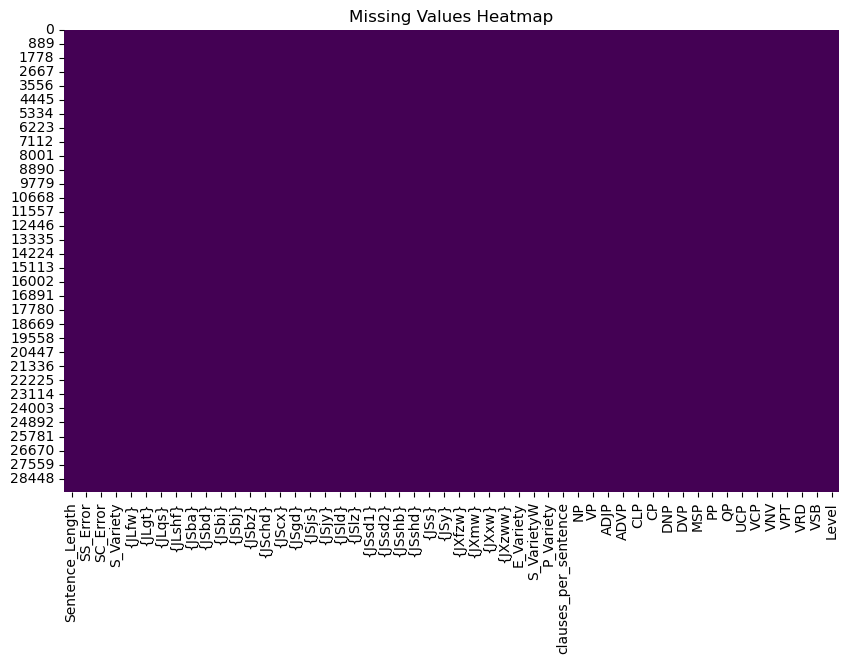

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

## 1.3 Class Distribution

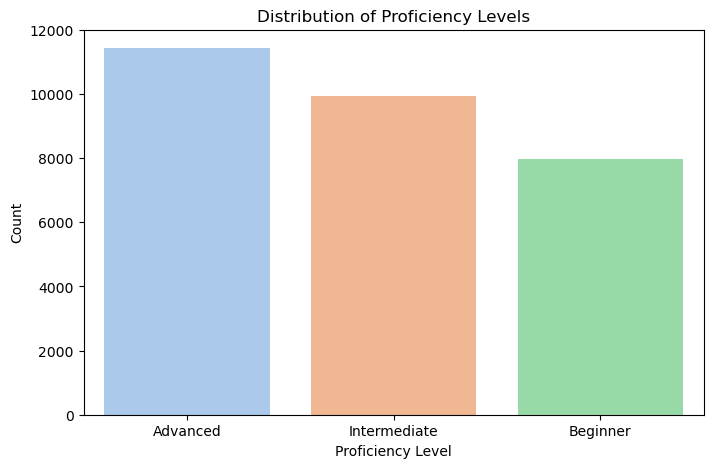

In [123]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Level', data=df, palette='pastel')
plt.title("Distribution of Proficiency Levels")
plt.xlabel("Proficiency Level")
plt.ylabel("Count")

plt.savefig("proficiency_level_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

In [36]:
# Count as numerical number
class_distribution = y.value_counts()

# Print the class distribution
print("Class Distribution:")
print(class_distribution)

# Display the distribution as a percentage:
class_distribution_percentage = y.value_counts(normalize=True) * 100
print("\nClass Distribution as a Percentage:")
print(class_distribution_percentage)


Class Distribution:
Advanced        11431
Intermediate     9930
Beginner         7960
Name: Level, dtype: int64

Class Distribution as a Percentage:
Advanced        38.985710
Intermediate    33.866512
Beginner        27.147778
Name: Level, dtype: float64


## 1.4 Feature Analysis

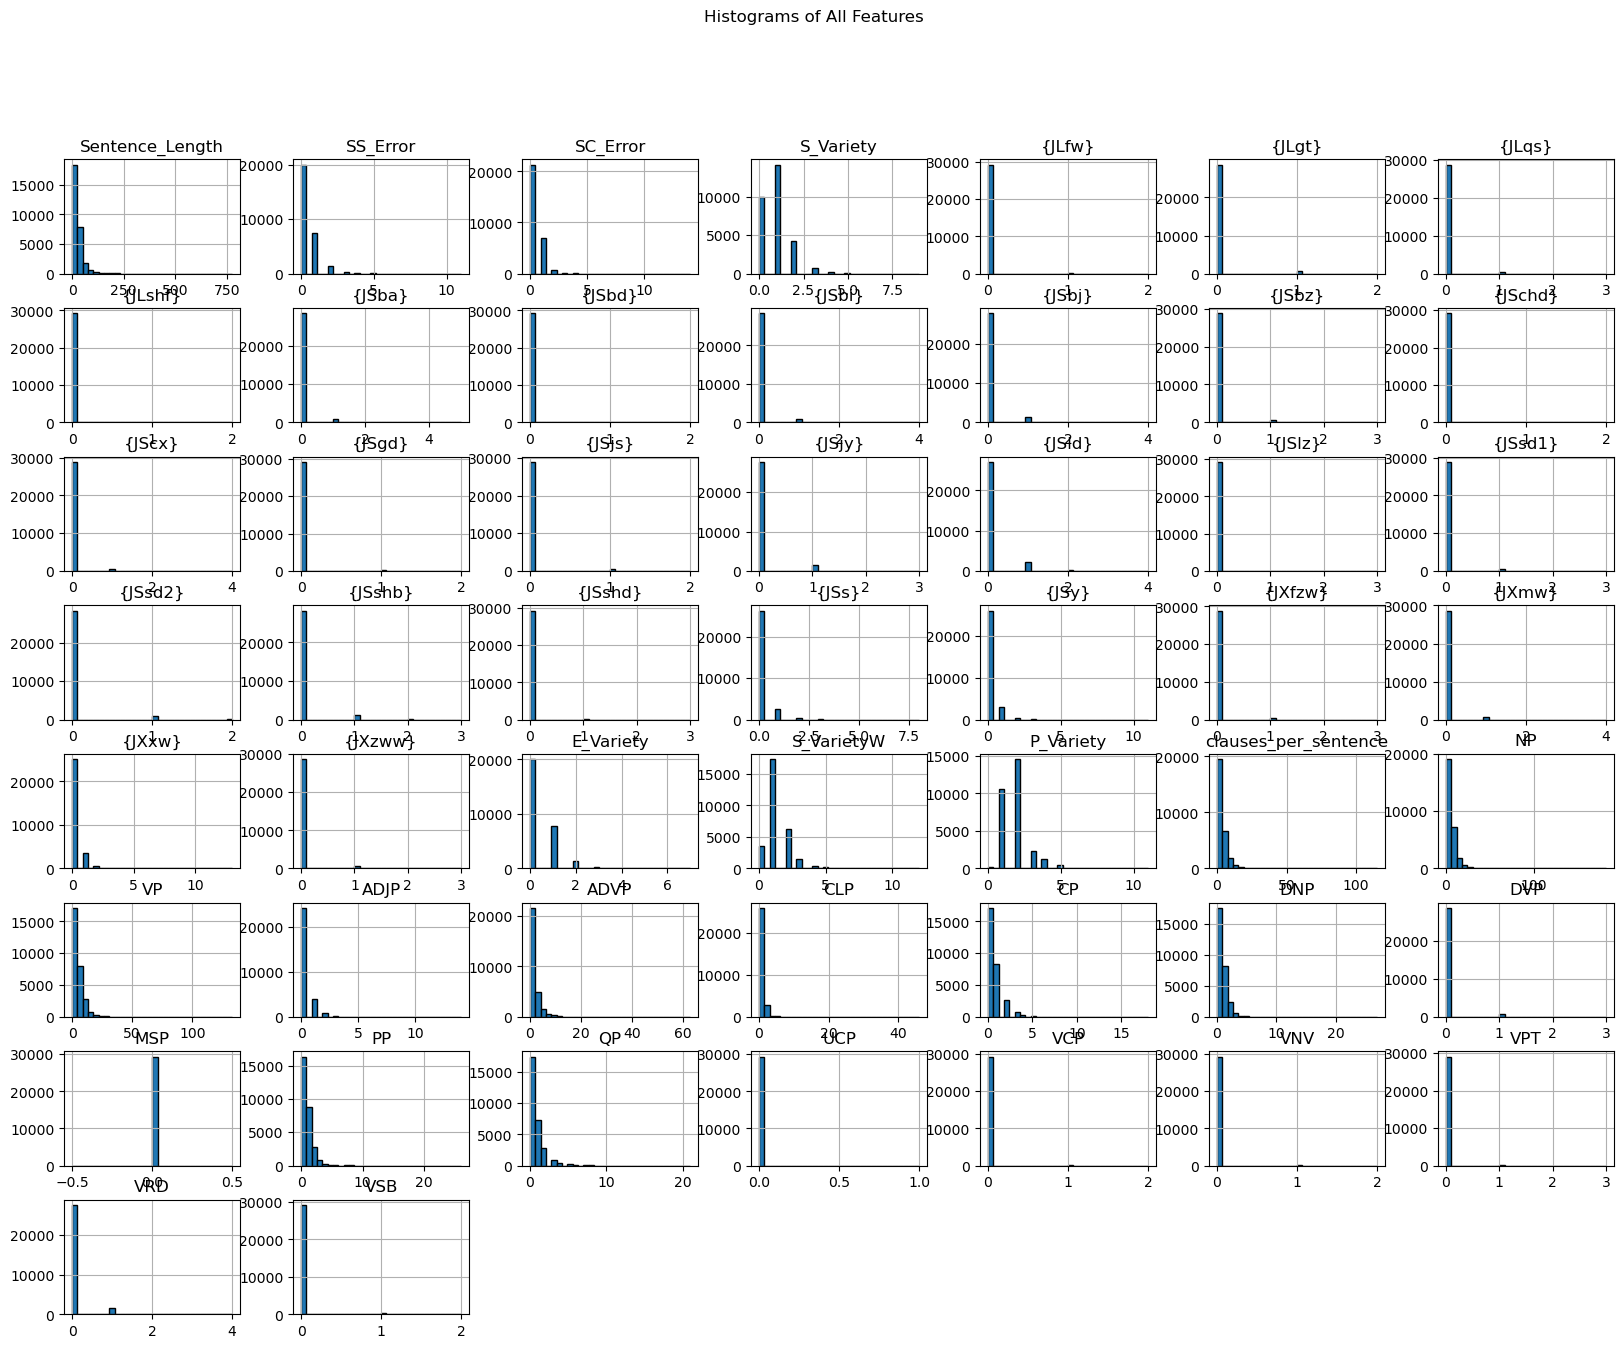

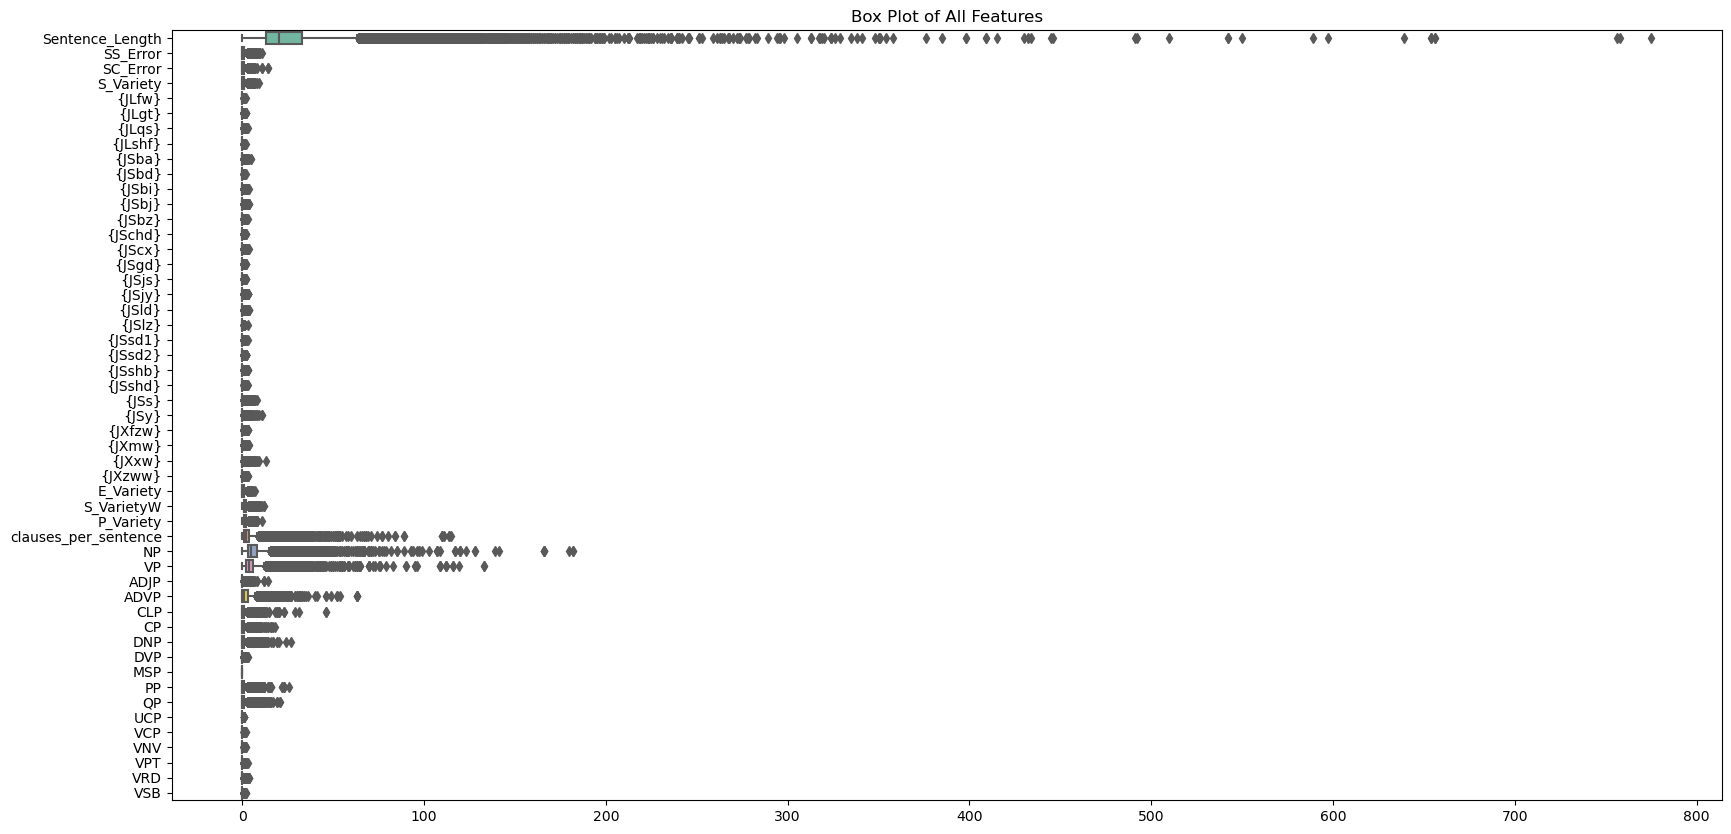

In [4]:
# Histograms for all numerical features
df.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle("Histograms of All Features")
plt.show()

# Box plots to detect outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, orient='h', palette='Set2')
plt.title("Box Plot of All Features")
plt.show()

Average Sentence Length by Proficiency Level:
Level
Advanced        34.372933
Beginner        20.432538
Intermediate    26.653978
Name: Sentence_Length, dtype: float64


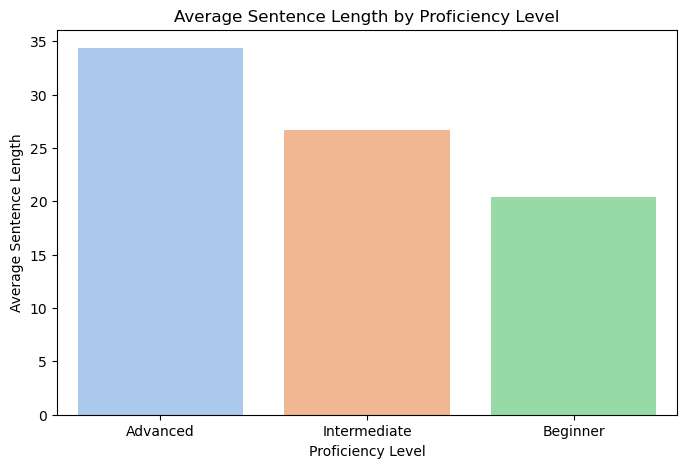

In [134]:

# Calculate the average sentence length for each proficiency level
avg_sentence_length = df.groupby('Level')['Sentence_Length'].mean()

# Print the exact average sentence lengths for each level
print("Average Sentence Length by Proficiency Level:")
print(avg_sentence_length)

# Reset index to convert the result into a DataFrame for plotting
avg_sentence_length = avg_sentence_length.reset_index()
avg_sentence_length.columns = ['Level', 'Average_Sentence_Length']

level_order = ['Advanced', 'Intermediate', 'Beginner']

# Plot the average sentence length for each proficiency level
plt.figure(figsize=(8, 5))
sns.barplot(x='Level', y='Average_Sentence_Length', data=avg_sentence_length, palette='pastel', order = level_order)
plt.title('Average Sentence Length by Proficiency Level')
plt.xlabel('Proficiency Level')
plt.ylabel('Average Sentence Length')

# Save the plot to a file
plt.savefig('average_sentence_length_by_level.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


## 1.5 Correlation Analysis

/var/folders/qq/3db4ccyx3rd3lzg40vypyr3m0000gn/T/ipykernel_30794/1010450980.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


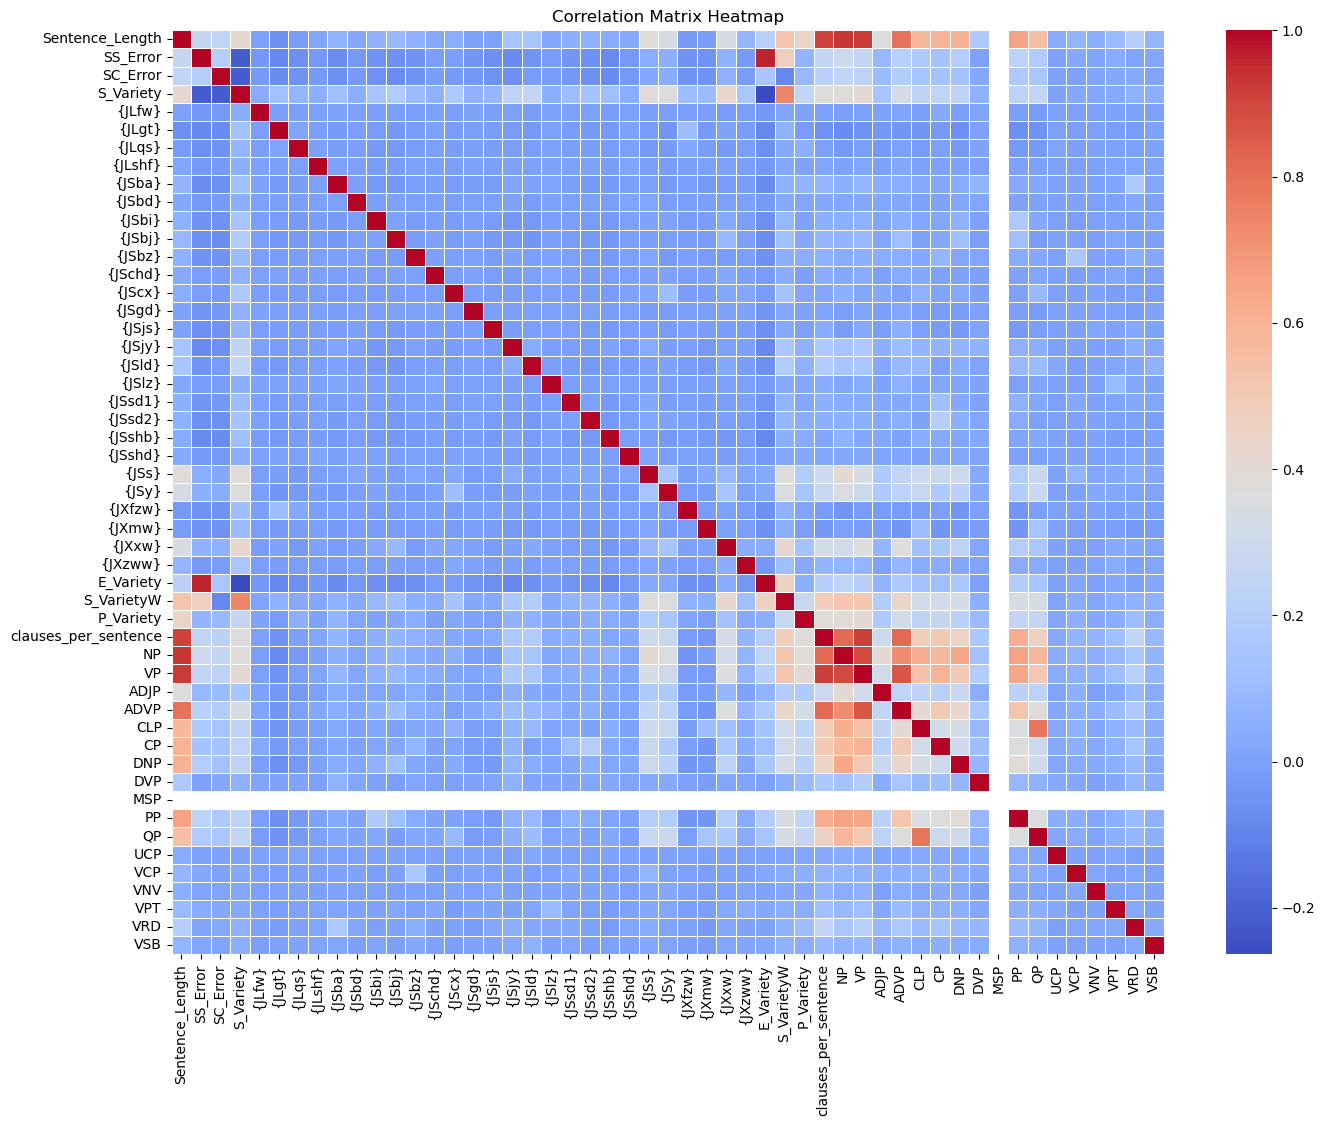

In [5]:
# Correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

## 1.6 Pairwise Plots

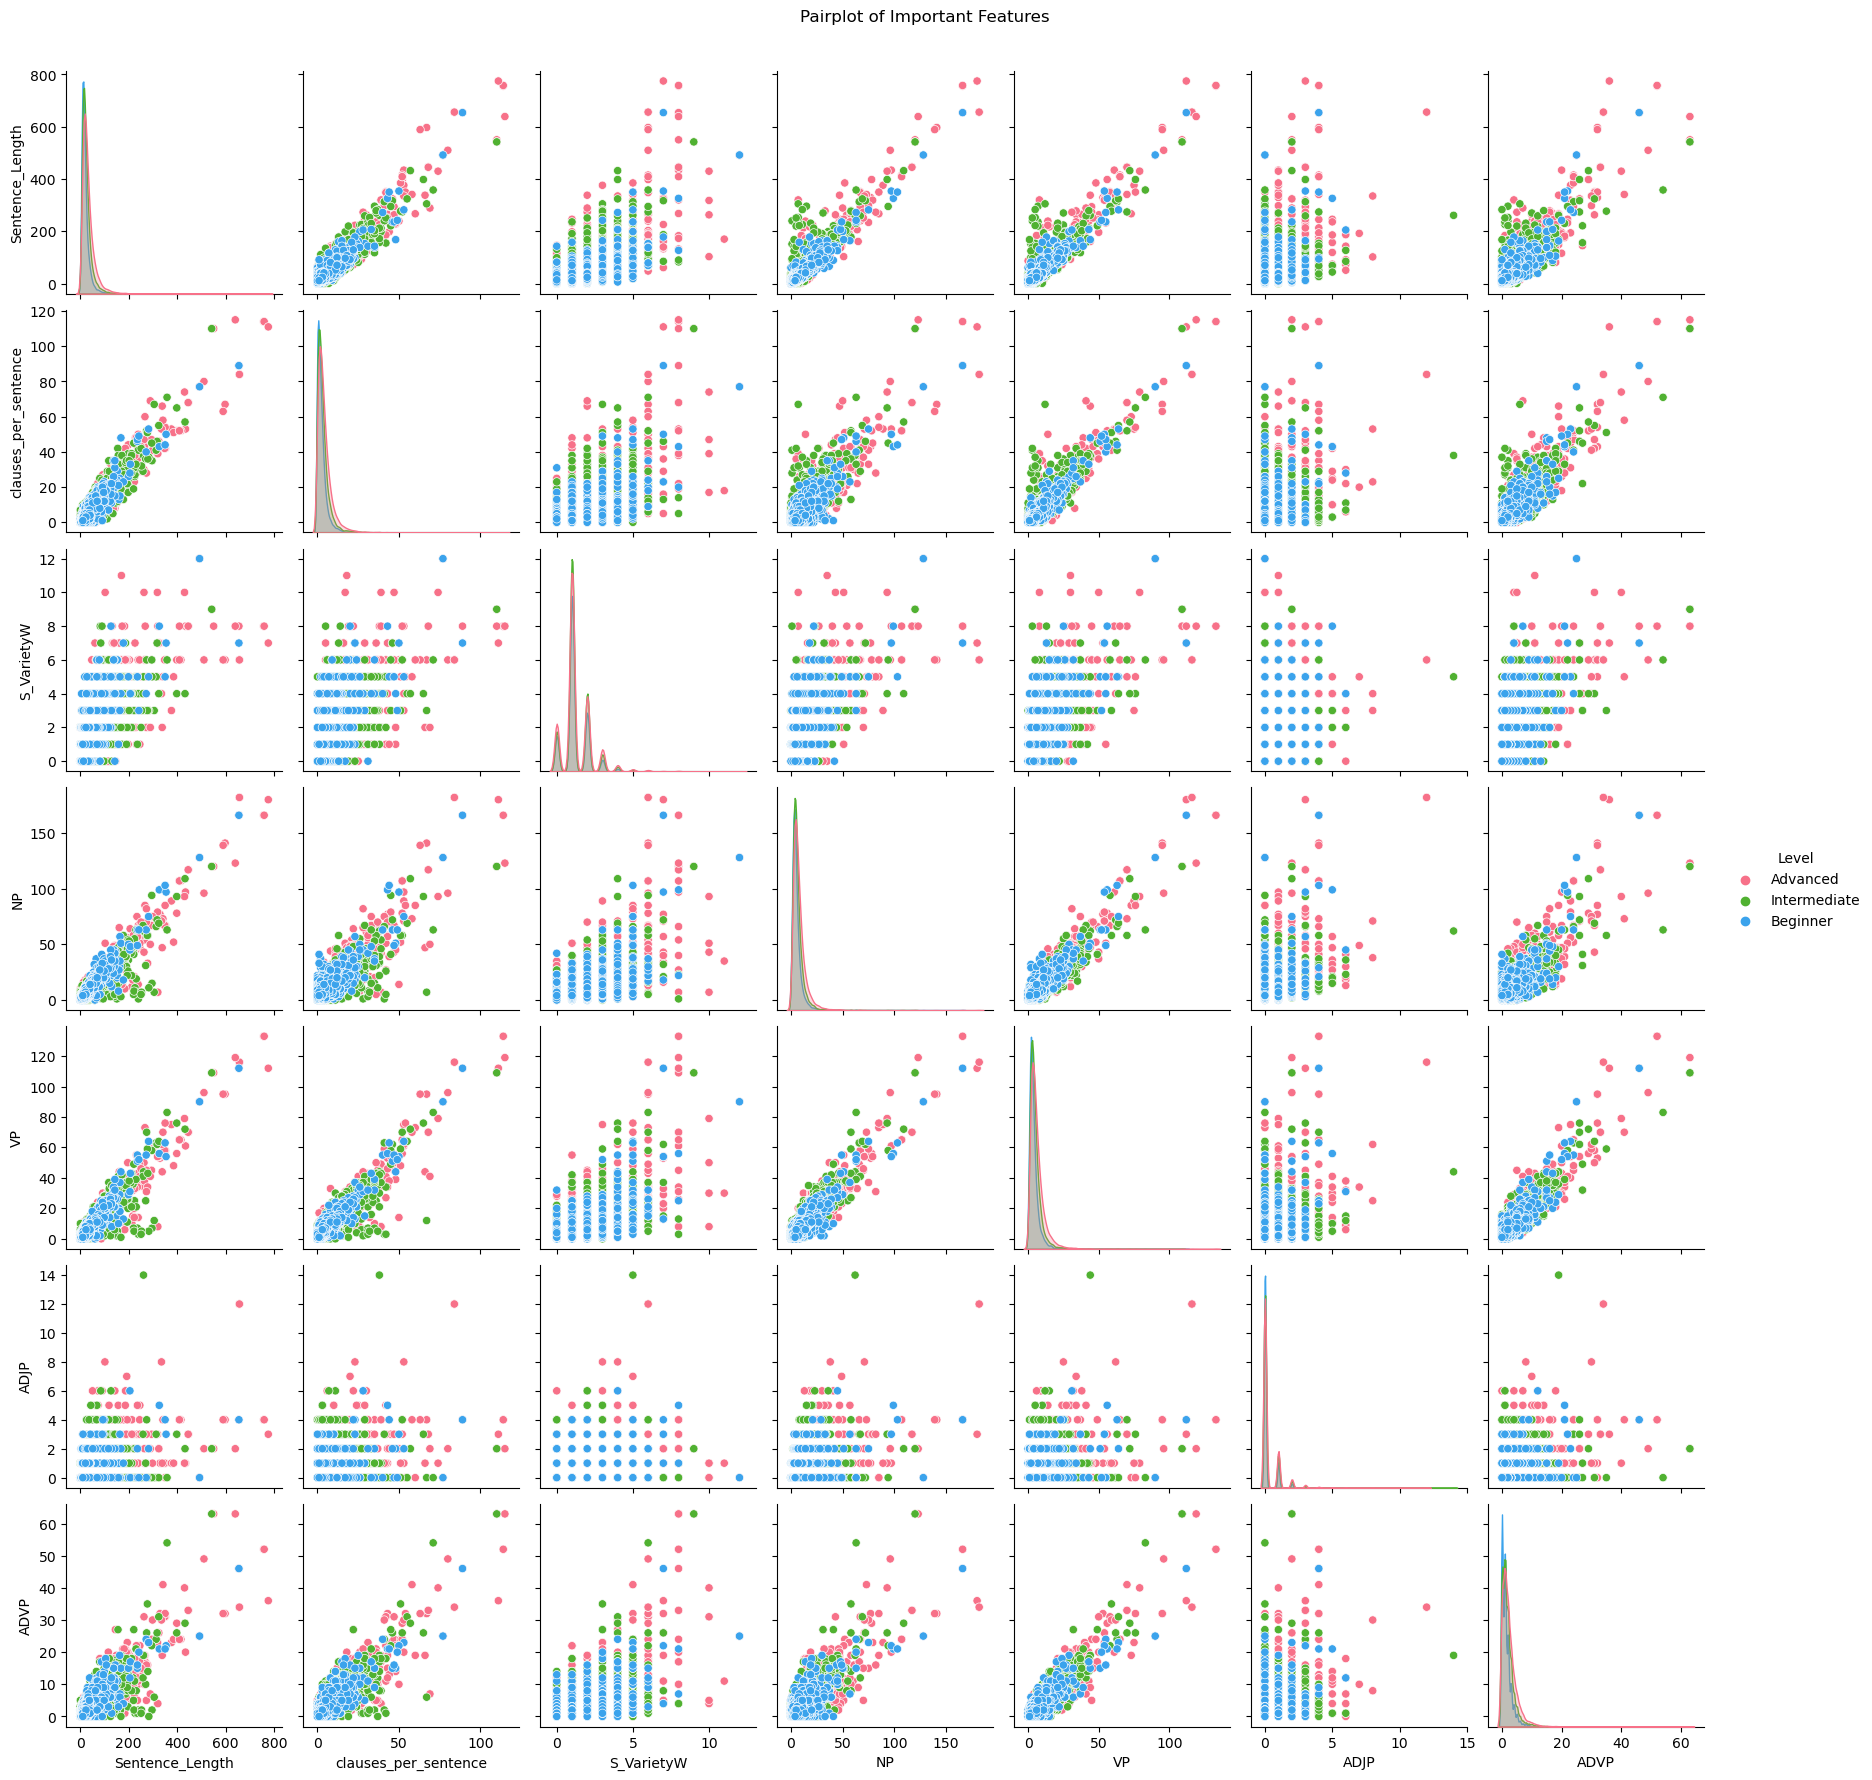

In [332]:
# Pairplot for important features (you can select relevant ones)
important_features = ['Sentence_Length', 'clauses_per_sentence','S_VarietyW', 'NP', 'VP','ADJP', 'ADVP', 'Level']
sns.pairplot(df[important_features], hue='Level', palette='husl')
plt.suptitle("Pairplot of Important Features", y=1.02)

plt.savefig('Pairwise Plots for Selected Features.png', dpi = 300)
plt.show()


## 1.7 Feature Importance (Initial Analysis)

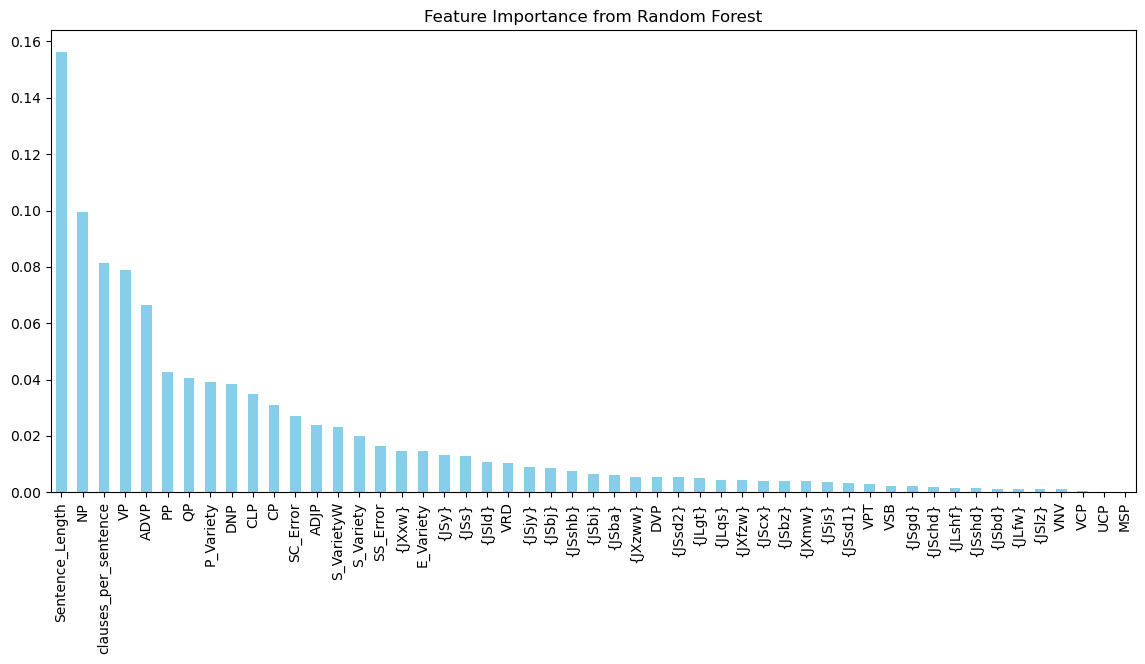

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Prepare data (ensure no target leakage)
X = df.drop(columns=['Level'])
y = df['Level']

# Train a simple RandomForestClassifier for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Plot feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(14, 6), color='skyblue')
plt.title("Feature Importance from Random Forest")
plt.show()

## 1.8 Outlier Detection

## 1.9 Unique Domain Analysis (Syntactic Features)

### 1.9.1 Sentence Length

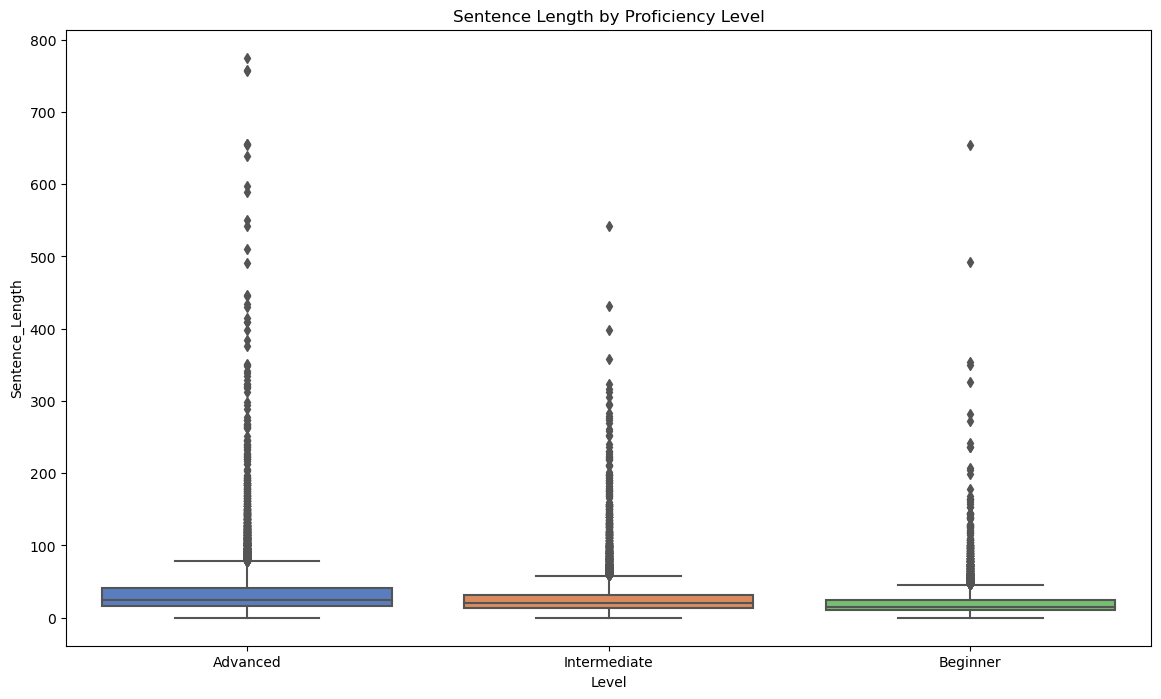

In [8]:
# Analyze how specific syntactic features vary by proficiency level
plt.figure(figsize=(14, 8))
sns.boxplot(x='Level', y='Sentence_Length', data=df, palette='muted')
plt.title("Sentence Length by Proficiency Level")
plt.show()


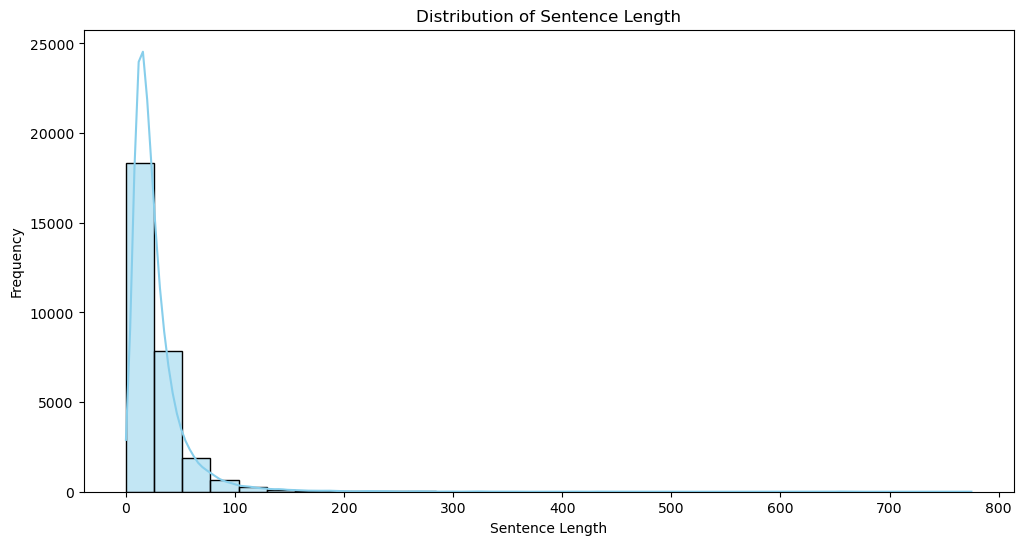

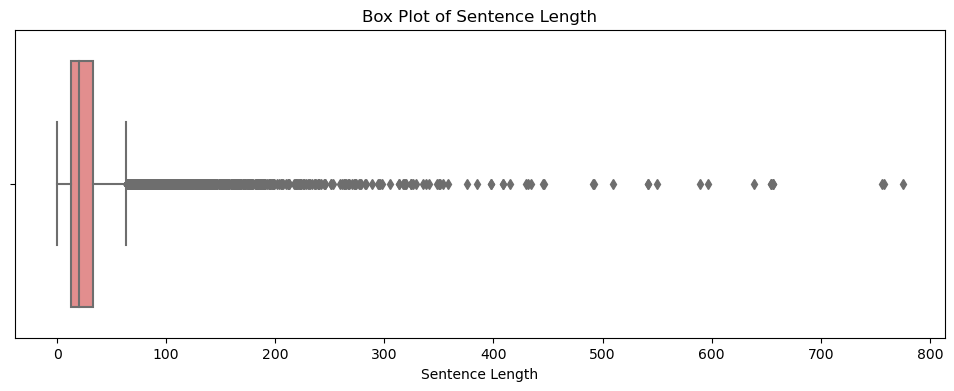

Number of outliers in 'Sentence_Length': 1000
Outlier data points:
       Sentence_Length  SS_Error  SC_Error  S_Variety  {JLfw}  {JLgt}  {JLqs}  \
18                 329         4         0          4       0       0       0   
19                 239         3         3          3       0       0       0   
110                268         2         0          6       0       0       0   
111                157         1         2          3       0       0       0   
112                263         6         2          3       0       0       0   
...                ...       ...       ...        ...     ...     ...     ...   
28537               86         0         0          3       0       0       0   
28540               92         0         0          2       0       0       0   
28753               97         0         0          1       0       0       0   
28821               99         0         0          3       0       0       0   
29021               91         0         0

In [9]:
import numpy as np

# Visualize the distribution of 'Sentence_Length' with a detailed histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['Sentence_Length'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Sentence Length')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

# Visualize with a box plot to see outliers clearly
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['Sentence_Length'], color='lightcoral')
plt.title('Box Plot of Sentence Length')
plt.xlabel('Sentence Length')
plt.show()

# Calculate the IQR for 'Sentence_Length'
Q1 = df['Sentence_Length'].quantile(0.25)
Q3 = df['Sentence_Length'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR

# Identify outliers
outliers = df[(df['Sentence_Length'] < lower_bound) | (df['Sentence_Length'] > upper_bound)]
print(f"Number of outliers in 'Sentence_Length': {len(outliers)}")

# Display the outlier rows
print("Outlier data points:")
print(outliers)

### 1.9.2 Noun Phrase

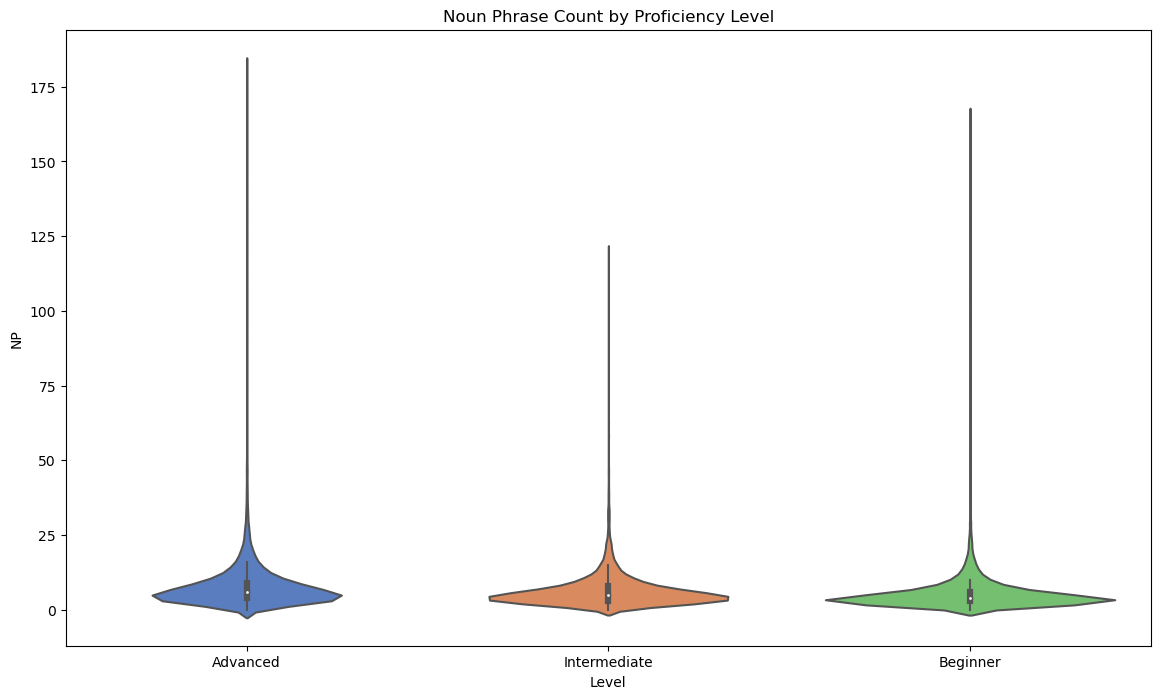

In [10]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Level', y='NP', data=df, palette='muted')
plt.title("Noun Phrase Count by Proficiency Level")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

# II. Experiment (1st round)

## 2.1 Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = df.drop(columns=['Level'])  # Replace 'Level' with the name of your target column if different
y = df['Level']

# Split the dataset into training and test sets (80% train, 20% test), with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display the shape of the resulting datasets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Check distribution of target variable in training and test sets
print("\nTarget distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nTarget distribution in test set:")
print(y_test.value_counts(normalize=True))

Training set size: 23456 samples
Test set size: 5865 samples

Target distribution in training set:
Advanced        0.389836
Intermediate    0.338677
Beginner        0.271487
Name: Level, dtype: float64

Target distribution in test set:
Advanced        0.389940
Intermediate    0.338619
Beginner        0.271441
Name: Level, dtype: float64


## 2.2 Libraries Prep

In [12]:
# Basic imports for model training and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# For evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## 2.3 Logistic Regression

Logistic Regression Performance:
Accuracy: 0.4679
F1-score (macro): 0.4529

Classification Report:
              precision    recall  f1-score   support

    Advanced       0.49      0.61      0.54      2287
    Beginner       0.46      0.49      0.47      1592
Intermediate       0.44      0.28      0.34      1986

    accuracy                           0.47      5865
   macro avg       0.46      0.46      0.45      5865
weighted avg       0.46      0.47      0.46      5865



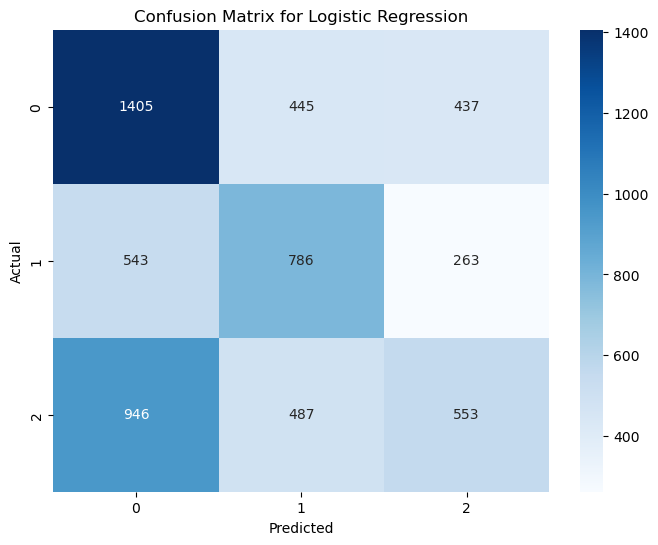

In [330]:
# Instantiate and train the model
log_reg = LogisticRegression(max_iter=2000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Calculate F1-score (macro-averaged for multi-class problems)
f1_macro = f1_score(y_test, y_pred_log_reg, average='macro')

# Evaluate the model
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"F1-score (macro): {f1_macro:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.savefig("Confusion Matrix for Logistic Regression.png", dpi=300)
plt.show()

Logistic Regression Performance with 5-Fold Cross-Validation:
Mean Accuracy: 0.4636 ± 0.0080
Mean F1-score (macro): 0.4497 ± 0.0075

Classification Report (Aggregated from CV Predictions):
              precision    recall  f1-score   support

    Advanced       0.49      0.60      0.54      9144
    Beginner       0.44      0.47      0.46      6368
Intermediate       0.44      0.29      0.35      7944

    accuracy                           0.46     23456
   macro avg       0.46      0.46      0.45     23456
weighted avg       0.46      0.46      0.45     23456



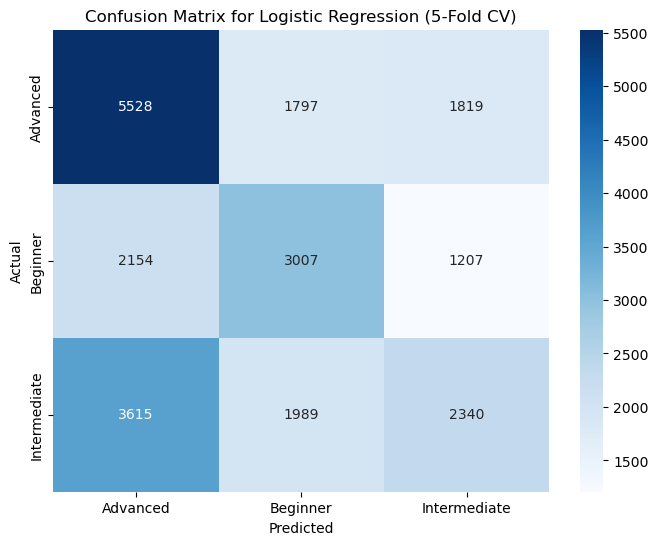

In [275]:
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Instantiate the model
log_reg = LogisticRegression(max_iter=2000, random_state=42)

# Define 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for accuracy
accuracy_scores = cross_val_score(log_reg, X_train, y_train, cv=kf, scoring='accuracy')

# Perform cross-validation for F1-score
f1_scores = cross_val_score(log_reg, X_train, y_train, cv=kf, scoring='f1_macro')

# Train and predict on each fold to compute confusion matrix
y_pred_cv = cross_val_predict(log_reg, X_train, y_train, cv=kf)
conf_matrix = confusion_matrix(y_train, y_pred_cv)

# Print results
print("Logistic Regression Performance with 5-Fold Cross-Validation:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"Mean F1-score (macro): {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

# Detailed classification report
print("\nClassification Report (Aggregated from CV Predictions):")
print(classification_report(y_train, y_pred_cv))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title("Confusion Matrix for Logistic Regression (5-Fold CV)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [277]:

# Define the model
log_reg = LogisticRegression(max_iter=2000, random_state=42)

# Define 5-fold cross validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 初始化列表存储每个fold的结果
accuracy_scores = []
f1_scores = []

# 遍历每个fold
for fold_idx, (train_index, test_index) in enumerate(kf.split(X_train, y_train), 1):
    # 获取训练集和验证集
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # 训练模型
    log_reg.fit(X_train_fold, y_train_fold)

    # 预测
    y_pred_fold = log_reg.predict(X_test_fold)

    # 计算accuracy和F1-score
    acc = accuracy_score(y_test_fold, y_pred_fold)
    f1 = f1_score(y_test_fold, y_pred_fold, average='macro')

    # 保存结果
    accuracy_scores.append(acc)
    f1_scores.append(f1)

    # 打印当前fold的结果
    print(f"Fold {fold_idx}: Accuracy = {acc:.4f}, F1-Score (macro) = {f1:.4f}")

# 打印平均值和标准差
print("\nMean Performance Across Folds:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"Mean F1-Score (macro): {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")


Fold 1: Accuracy = 0.4512, F1-Score (macro) = 0.4384
Fold 2: Accuracy = 0.4669, F1-Score (macro) = 0.4503
Fold 3: Accuracy = 0.4577, F1-Score (macro) = 0.4447
Fold 4: Accuracy = 0.4698, F1-Score (macro) = 0.4584
Fold 5: Accuracy = 0.4726, F1-Score (macro) = 0.4569

Mean Performance Across Folds:
Mean Accuracy: 0.4636 ± 0.0080
Mean F1-Score (macro): 0.4497 ± 0.0075


## 2.4 Support Vector Machine

Support Vector Machine Performance:
Accuracy: 0.4525
F1-score (macro): 0.4323

Classification Report:
              precision    recall  f1-score   support

    Advanced       0.49      0.64      0.55      2287
    Beginner       0.45      0.41      0.43      1592
Intermediate       0.38      0.27      0.32      1986

    accuracy                           0.45      5865
   macro avg       0.44      0.44      0.43      5865
weighted avg       0.44      0.45      0.44      5865



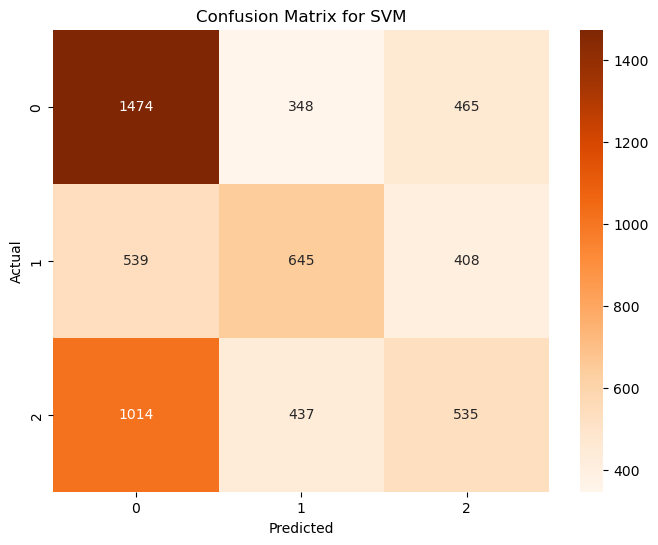

In [14]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Train the SVM model
svm_model = SVC(kernel='rbf', C=1, random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svm)

# Calculate F1-score (macro-averaged for multi-class problems)
f1_macro = f1_score(y_test, y_pred_svm, average='macro')

# Print the results
print("Support Vector Machine Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score (macro): {f1_macro:.4f}")

# Print full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 2.4.1 Hyperparameter Tuning

The most important parameters to tune in an SVM model include:

1. C (Regularization Parameter): Controls the trade-off between achieving a low training error and a low testing error. A small C value makes the decision surface smoother, while a large C value aims for classifying all training examples correctly (but may risk overfitting).

2. kernel: Specifies the kernel type to be used in the algorithm. Common choices include:
    'linear': Linear kernel.
    'poly': Polynomial kernel, controlled by the degree parameter.
    'rbf' (default): Radial basis function kernel, useful for non-linear problems.
    'sigmoid': Sigmoid kernel, similar to a neural network activation function.

3. gamma: Defines how far the influence of a single training example reaches. Low values mean 'far' and high values mean 'close'. This is particularly important for the rbf, poly, and sigmoid kernels.



#### 2.4.1.1 Manual Tuning

Start with a smaller, manual approach by adjusting key parameters one at a time and observing how they affect the model’s performance.

In [27]:
# Try different values of C and gamma manually
for C in [0.1, 1, 10]:
    for gamma in ['scale', 0.1, 0.01]:
        svm_model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
        svm_model.fit(X_train, y_train)
        y_pred_svm = svm_model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred_svm)
        f1_macro = f1_score(y_test, y_pred_svm, average='macro')
        
        print(f"C: {C}, gamma: {gamma}")
        print(f"Accuracy: {accuracy:.4f}, F1-score (macro): {f1_macro:.4f}")
        print("-" * 40)


C: 0.1, gamma: scale
Accuracy: 0.4370, F1-score (macro): 0.4097
----------------------------------------
C: 0.1, gamma: 0.1
Accuracy: 0.4467, F1-score (macro): 0.4081
----------------------------------------
C: 0.1, gamma: 0.01
Accuracy: 0.4459, F1-score (macro): 0.4233
----------------------------------------
C: 1, gamma: scale
Accuracy: 0.4525, F1-score (macro): 0.4323
----------------------------------------
C: 1, gamma: 0.1
Accuracy: 0.4605, F1-score (macro): 0.4473
----------------------------------------
C: 1, gamma: 0.01
Accuracy: 0.4733, F1-score (macro): 0.4536
----------------------------------------
C: 10, gamma: scale
Accuracy: 0.4702, F1-score (macro): 0.4496
----------------------------------------
C: 10, gamma: 0.1
Accuracy: 0.4431, F1-score (macro): 0.4343
----------------------------------------
C: 10, gamma: 0.01
Accuracy: 0.4731, F1-score (macro): 0.4613
----------------------------------------


Support Vector Machine Performance:
Accuracy: 0.4733
F1-score (macro): 0.4536

Classification Report:
              precision    recall  f1-score   support

    Advanced       0.49      0.66      0.56      2287
    Beginner       0.47      0.48      0.47      1592
Intermediate       0.43      0.26      0.32      1986

    accuracy                           0.47      5865
   macro avg       0.46      0.46      0.45      5865
weighted avg       0.47      0.47      0.46      5865



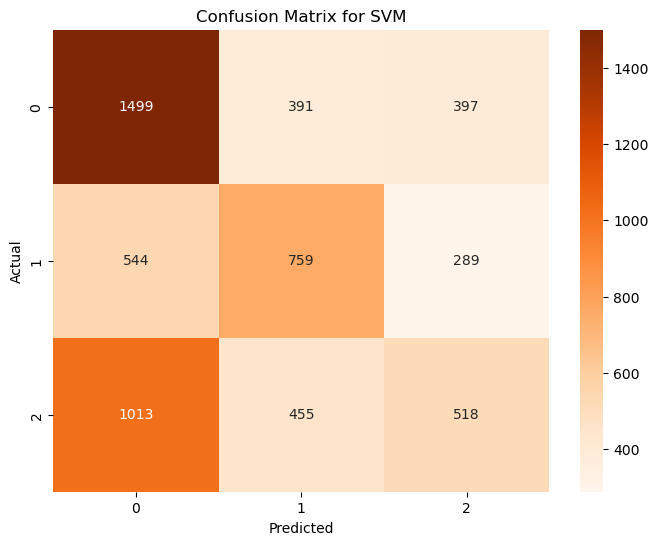

In [331]:
svm_model = SVC(kernel='rbf', C=1, gamma=0.01, random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svm)

# Calculate F1-score (macro-averaged for multi-class problems)
f1_macro = f1_score(y_test, y_pred_svm, average='macro')

# Print the results
print("Support Vector Machine Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score (macro): {f1_macro:.4f}")

# Print full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.savefig("Confusion Matrix for SVM.png", dpi=300)
plt.show()

Accuracy and F1-Score for each fold:
Fold 1: Accuracy = 0.4676, F1-Score (macro) = 0.4482
Fold 2: Accuracy = 0.4673, F1-Score (macro) = 0.4496
Fold 3: Accuracy = 0.4622, F1-Score (macro) = 0.4455
Fold 4: Accuracy = 0.4645, F1-Score (macro) = 0.4464
Fold 5: Accuracy = 0.4786, F1-Score (macro) = 0.4556

Mean Performance Across Folds:
Mean Accuracy: 0.4680 ± 0.0056
Mean F1-Score (macro): 0.4491 ± 0.0036


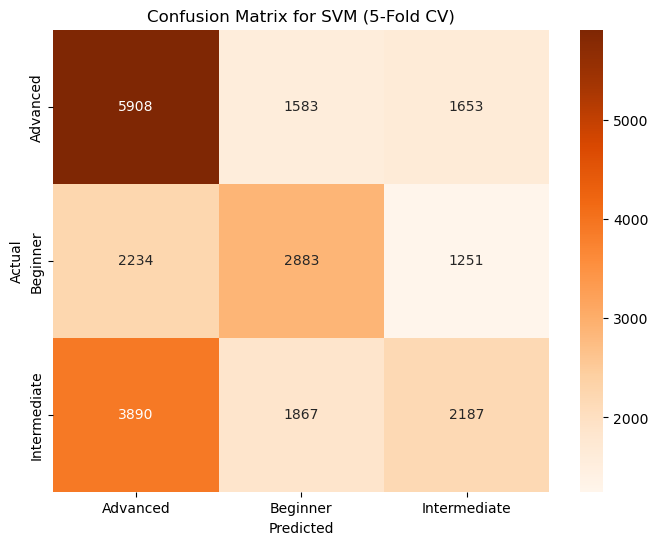


Classification Report (Aggregated from CV Predictions):
              precision    recall  f1-score   support

    Advanced       0.49      0.65      0.56      9144
    Beginner       0.46      0.45      0.45      6368
Intermediate       0.43      0.28      0.34      7944

    accuracy                           0.47     23456
   macro avg       0.46      0.46      0.45     23456
weighted avg       0.46      0.47      0.45     23456



In [278]:

# Define the SVM model with the provided parameters
svm_model = SVC(kernel='rbf', C=1, gamma=0.01, random_state=42)

# Define 5-fold cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute metrics for each fold
cv_results = cross_validate(
    svm_model,
    X_train,
    y_train,
    cv=cv_strategy,
    scoring=['accuracy', 'f1_macro'],  # Compute both accuracy and macro F1-score
    return_train_score=False
)

# Print accuracy and F1-score for each fold
print("Accuracy and F1-Score for each fold:")
for fold_idx, (acc, f1) in enumerate(zip(cv_results['test_accuracy'], cv_results['test_f1_macro']), 1):
    print(f"Fold {fold_idx}: Accuracy = {acc:.4f}, F1-Score (macro) = {f1:.4f}")

# Print the mean and standard deviation of accuracy and F1-score
print("\nMean Performance Across Folds:")
print(f"Mean Accuracy: {np.mean(cv_results['test_accuracy']):.4f} ± {np.std(cv_results['test_accuracy']):.4f}")
print(f"Mean F1-Score (macro): {np.mean(cv_results['test_f1_macro']):.4f} ± {np.std(cv_results['test_f1_macro']):.4f}")

# Generate predictions for each fold using cross_val_predict
# This allows us to aggregate predictions across all folds
y_pred_cv = cross_val_predict(svm_model, X_train, y_train, cv=cv_strategy)

# Create a confusion matrix from the aggregated predictions
conf_matrix = confusion_matrix(y_train, y_pred_cv)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title("Confusion Matrix for SVM (5-Fold CV)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print a detailed classification report from the aggregated predictions
print("\nClassification Report (Aggregated from CV Predictions):")
print(classification_report(y_train, y_pred_cv))


#### 2.4.1.2 Randomized Search (Not completed)

In [26]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_grid,
    n_iter=50,  # Reduce this for a quicker search
    scoring='accuracy',
    cv=3,  # Use 3-fold instead of 5-fold to save time
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


KeyboardInterrupt: 

#### 2.4.1.3 Grid Search (Not completed)

In [25]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],            # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'], # Different kernel types
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001], # Kernel coefficient for 'rbf', 'poly', 'sigmoid'
    'degree': [2, 3, 4]                # Degree of the polynomial kernel function
}

# Instantiate the SVM model
svm_model = SVC(random_state=42)

# Set up GridSearchCV
grid_search_svm = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='accuracy',   # Use 'accuracy' or 'f1_macro' for imbalanced data
    cv=5,                 # 5-fold cross-validation
    verbose=2,            # Adjust for more or less output during search
    n_jobs=-1             # Use all available cores
)

# Fit the GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train)

# Print the best parameters from the grid search
print("Best Parameters from Grid Search for SVM:")
print(grid_search_svm.best_params_)

# Use the best estimator for predictions
best_svm_model = grid_search_svm.best_estimator_
y_pred_svm_tuned = best_svm_model.predict(X_test)

# Evaluate the tuned SVM model
print("\nTuned SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_tuned):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm_tuned))

# Plot confusion matrix for the tuned SVM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm_tuned), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Tuned SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 180 candidates, totalling 900 fits


KeyboardInterrupt: 

Explanation of Key Parameters:

1. C (Regularization Parameter): A higher C value can lead to overfitting, while a lower C makes the decision boundary smoother.

2. kernel: The choice of kernel affects the shape of the decision boundary:
    'linear': Good for linearly separable data.
    'rbf': Useful for most real-world, non-linear problems.
    'poly': Use for polynomial relationships (controlled by degree).

3. gamma:
    'scale' (default): 1 / (n_features * X.var()), adjusts based on input data.
    'auto': 1 / n_features, can be too simplistic for complex problems.
    Custom Values: Lower values for smoother decision boundaries, higher for more complex boundaries.

4. degree: Only relevant when kernel='poly'.



Tips for Tuning:

1. Initial Exploration: Start with broader ranges for C and gamma to get a sense of what values work best.

2. Narrow Down: Once you have a rough idea, refine the grid search with a smaller range around the best values.

3. Use Cross-Validation: Ensures that the results are robust and not due to a particular train-test split.

4. Change Scoring Metric: If you have imbalanced data, consider using 'f1_macro' or 'balanced_accuracy' as the scoring metric.

5. Consider SVM with PCA: If your dataset has many features, applying Principal Component Analysis (PCA) to reduce dimensionality before SVM might improve results.



### 2.4.2 K-fold Cross-validation

In [52]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score

# Number of folds for cross-validation
k = 5

# Use the best model from grid search (example for SVM)
svm_model_tuned = SVC(kernel='rbf', C=10, gamma=0.01, random_state=42)  # With best parameters found

# Perform k-fold cross-validation on the entire training set with both accuracy and macro F1-score
scoring = {'accuracy': 'accuracy', 'f1_macro': 'f1_macro'}  # Define the scoring metrics

# Run cross-validation
cv_results = cross_validate(svm_model_tuned, X_train, y_train, cv=k, scoring=scoring)

# Print the cross-validation results
print(f"{k}-Fold Cross-Validation Results for SVM:")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Accuracy Standard Deviation: {cv_results['test_accuracy'].std():.4f}")
print(f"Mean Macro F1-Score: {cv_results['test_f1_macro'].mean():.4f}")
print(f"Macro F1-Score Standard Deviation: {cv_results['test_f1_macro'].std():.4f}")


5-Fold Cross-Validation Results for SVM:
Mean Accuracy: 0.4692
Accuracy Standard Deviation: 0.0078
Mean Macro F1-Score: 0.4578
Macro F1-Score Standard Deviation: 0.0078


## 2.5 Random Forest

Random Forest Performance:
Accuracy: 0.4633
Macro F1-Score: 0.4496

Classification Report:
              precision    recall  f1-score   support

    Advanced       0.48      0.62      0.54      2287
    Beginner       0.49      0.39      0.43      1592
Intermediate       0.41      0.34      0.37      1986

    accuracy                           0.46      5865
   macro avg       0.46      0.45      0.45      5865
weighted avg       0.46      0.46      0.46      5865



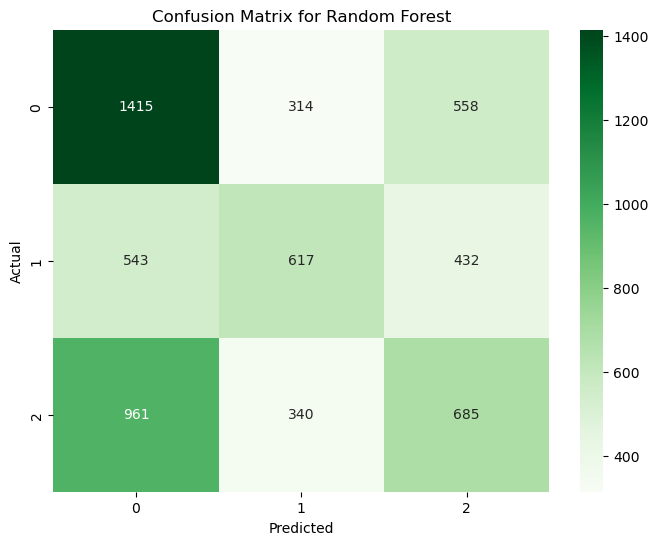

In [53]:
# Instantiate and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# Calculate and print Macro F1-Score
macro_f1 = f1_score(y_test, y_pred_rf, average='macro')
print(f"Macro F1-Score: {macro_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 2.5.1 Grid Search for Best Parameter

In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


#### 2.5.1.2 Randomized Search (Based on previous grid search)

In [38]:
from sklearn.model_selection import RandomizedSearchCV

random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=1, 
    n_jobs=-1
)
random_search_rf.fit(X_train_reduced, y_train)


print("Best Parameters from Randomized Search:")
print(random_search_rf.best_params_)
print(f"Best Cross-Validated Score: {random_search_rf.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/minjiali/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters from Randomized Search:
{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15, 'bootstrap': False}
Best Cross-Validated Score: 0.4759


### 2.5.2 Tuned Random Forest Model

#### 2.5.2.1 Tuned 1

Tuned Random Forest Performance:
Accuracy: 0.4777
Macro F1-Score: 0.4642

Classification Report:
              precision    recall  f1-score   support

    Advanced       0.50      0.64      0.56      2287
    Beginner       0.50      0.44      0.47      1592
Intermediate       0.42      0.32      0.36      1986

    accuracy                           0.48      5865
   macro avg       0.47      0.47      0.46      5865
weighted avg       0.47      0.48      0.47      5865



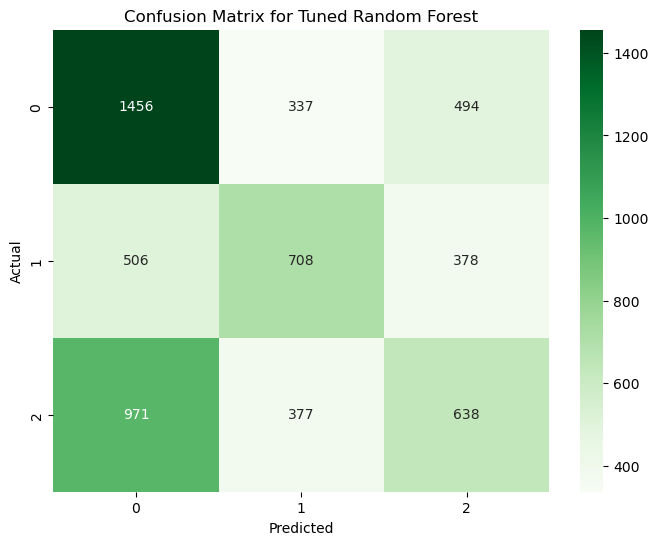

In [60]:
# Instantiate the Random Forest model with the best parameters
rf_model_tuned = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)

# Train the model on the training set
rf_model_tuned.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_tuned = rf_model_tuned.predict(X_test)

# Evaluate the model
print("Tuned Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_tuned):.4f}")

# Calculate and print Macro F1-Score
macro_f1 = f1_score(y_test, y_pred_rf_tuned, average='macro')
print(f"Macro F1-Score: {macro_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_tuned))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_tuned), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix for Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 2.5.2.2 Tuned 2

Tuned Random Forest Performance:
Accuracy: 0.4808
Macro F1-Score: 0.4657

Classification Report:
              precision    recall  f1-score   support

    Advanced       0.49      0.65      0.56      2287
    Beginner       0.49      0.47      0.48      1592
Intermediate       0.44      0.30      0.36      1986

    accuracy                           0.48      5865
   macro avg       0.47      0.47      0.47      5865
weighted avg       0.47      0.48      0.47      5865



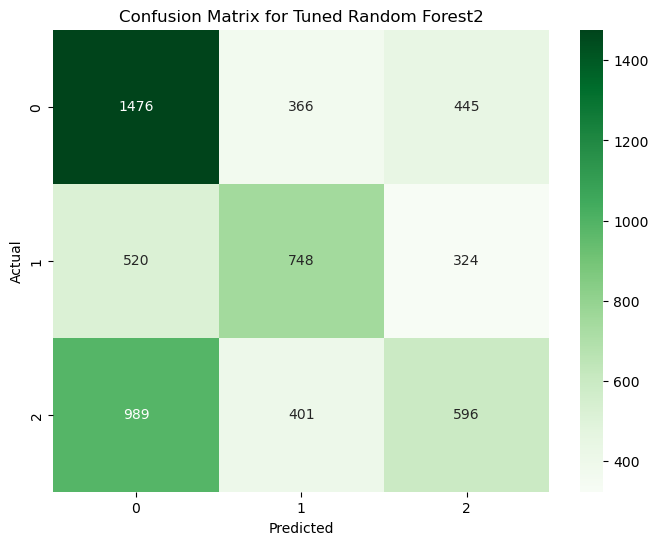

In [282]:
# Instantiate the Random Forest model with the best parameters
rf_model_tuned2 = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features = 'log2',
    bootstrap = False,
    random_state=42
)

# Train the model on the training set
rf_model_tuned2.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_tuned2 = rf_model_tuned2.predict(X_test)

# Evaluate the model
print("Tuned Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_tuned2):.4f}")

# Calculate and print Macro F1-Score
macro_f1 = f1_score(y_test, y_pred_rf_tuned2, average='macro')
print(f"Macro F1-Score: {macro_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_tuned2))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_tuned2), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix for Tuned Random Forest2")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 2.5.3 Feature Importance (Drop Feature)

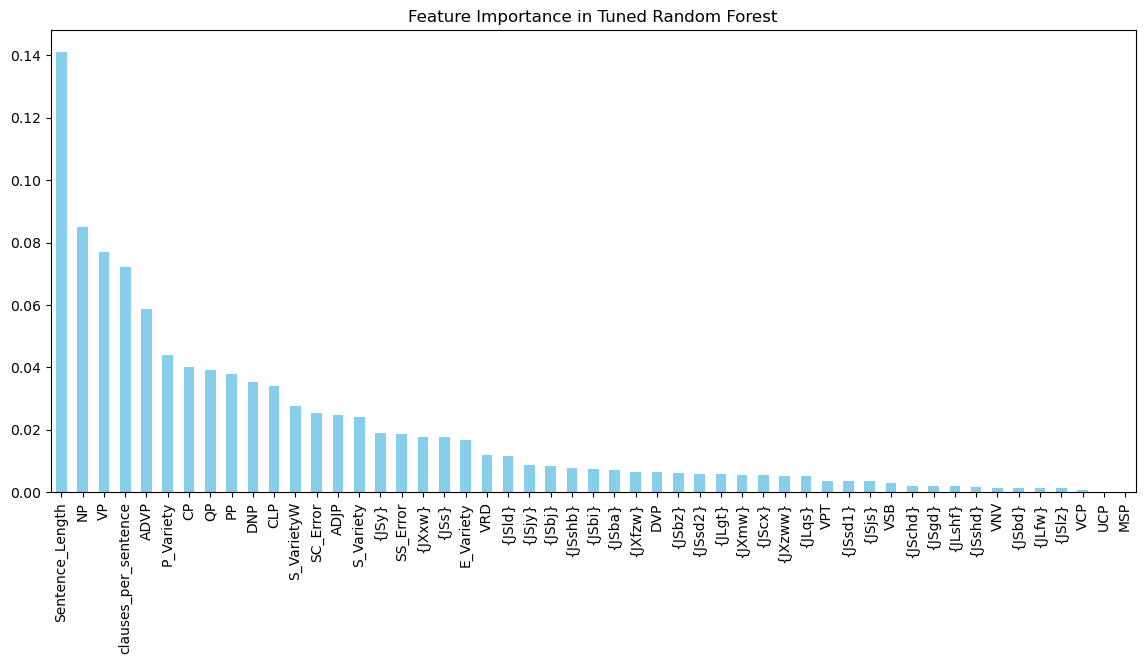

In [237]:
importances = pd.Series(rf_model_tuned.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(14, 6), color='skyblue')
plt.title("Feature Importance in Tuned Random Forest")
plt.show()


Step-by-Step Process for Feature Selection and Model Improvement:

1. Set a Threshold for Feature Importance:Decide on a threshold to drop features that have importance values below a certain level. This helps reduce noise in the data and can improve the model's generalizability and performance.

2. Remove Unimportant Features:Drop features with importance values below the chosen threshold from your training and test sets. 

3. Train and Evaluate the Model Again:Retrain the model using the reduced feature set and compare its performance to the original model to see if there's any improvement.

Features to drop (importance < 0.005): ['{JLfw}', '{JLshf}', '{JSbd}', '{JSchd}', '{JSgd}', '{JSjs}', '{JSlz}', '{JSsd1}', '{JSshd}', 'MSP', 'UCP', 'VCP', 'VNV', 'VPT', 'VSB']
Tuned Random Forest with Reduced Features Performance:
Accuracy: 0.4798
Macro F1-Score: 0.4666

Classification Report:
              precision    recall  f1-score   support

    Advanced       0.50      0.63      0.56      2287
    Beginner       0.49      0.44      0.47      1592
Intermediate       0.43      0.33      0.38      1986

    accuracy                           0.48      5865
   macro avg       0.47      0.47      0.47      5865
weighted avg       0.47      0.48      0.47      5865



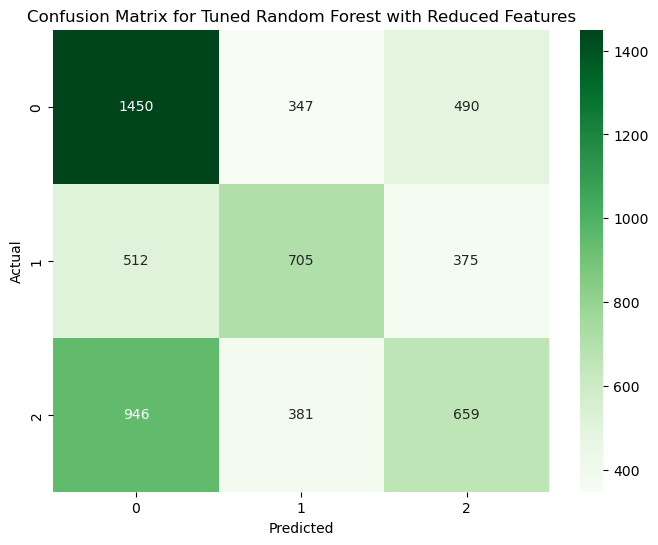

In [238]:
# Set a threshold for feature importance
# I have tried 0.01, but the model performance decreased. Therefore, I put threshold = 0.005 instead
threshold = 0.005

# Identify unimportant features
unimportant_features = importances[importances < threshold].index.tolist()
print(f"Features to drop (importance < {threshold}): {unimportant_features}")

# Drop unimportant features from the training and test sets
X_train_reduced = X_train.drop(columns=unimportant_features)
X_test_reduced = X_test.drop(columns=unimportant_features)

# Train the model again with the reduced feature set
rf_model_tuned_reduced = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)
rf_model_tuned_reduced.fit(X_train_reduced, y_train)

# Predict on the test set with the reduced feature set
y_pred_rf_tuned_reduced = rf_model_tuned_reduced.predict(X_test_reduced)

# Evaluate the reduced model
print("Tuned Random Forest with Reduced Features Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_tuned_reduced):.4f}")

# Calculate and print Macro F1-Score
macro_f1 = f1_score(y_test, y_pred_rf_tuned_reduced, average='macro')
print(f"Macro F1-Score: {macro_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_tuned_reduced))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_tuned_reduced), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix for Tuned Random Forest with Reduced Features")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 2.5.4 Recursive Feature Elimination (RFE)

In [56]:
from sklearn.feature_selection import RFE

# Instantiate the model for feature elimination
rf_rfe = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)

# Perform RFE
rfe = RFE(estimator=rf_rfe, n_features_to_select=20)  # Adjust the number of features to select
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print(f"Selected Features by RFE: {selected_features}")

# Create new training and test sets with only the selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

# Train the model again with the selected features
rf_model_tuned_rfe = rf_rfe.fit(X_train_rfe, y_train)

# Predict on the test set
y_pred_rf_rfe = rf_model_tuned_rfe.predict(X_test_rfe)

# Evaluate the model
print("Tuned Random Forest with RFE Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_rfe):.4f}")

# Calculate and print Macro F1-Score
macro_f1 = f1_score(y_test, y_pred_rf, average='macro')
print(f"Macro F1-Score: {macro_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_rfe))


Selected Features by RFE: Index(['Sentence_Length', 'SS_Error', 'SC_Error', 'S_Variety', '{JSs}',
       '{JSy}', '{JXxw}', 'E_Variety', 'S_VarietyW', 'P_Variety',
       'clauses_per_sentence', 'NP', 'VP', 'ADJP', 'ADVP', 'CLP', 'CP', 'DNP',
       'PP', 'QP'],
      dtype='object')
Tuned Random Forest with RFE Performance:
Accuracy: 0.4670
Macro F1-Score: 0.4496

Classification Report:
              precision    recall  f1-score   support

    Advanced       0.49      0.62      0.55      2287
    Beginner       0.49      0.41      0.45      1592
Intermediate       0.41      0.33      0.37      1986

    accuracy                           0.47      5865
   macro avg       0.46      0.46      0.45      5865
weighted avg       0.46      0.47      0.46      5865



### 2.5.5 K-fold Cross-validation (After feature selection)

In [62]:
# Number of folds for k-fold cross-validation
k = 5  

# Perform k-fold cross-validation on the reduced training set
rf_model_tuned_reduced = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)

# Run k-fold cross-validation and evaluate using the accuracy score
cv_scores = cross_val_score(
    rf_model_tuned_reduced,
    X_train_reduced,
    y_train,
    cv=k,
    scoring='accuracy',  
    n_jobs=-1  # Use all available cores for faster processing
)

# Print the cross-validation results
print(f"{k}-Fold Cross-Validation Results for Tuned Random Forest with Reduced Features:")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

# Print all scores for each fold
print("\nCross-Validation Scores for Each Fold:")
print(cv_scores)


5-Fold Cross-Validation Results for Tuned Random Forest with Reduced Features:
Mean Accuracy: 0.4721
Standard Deviation: 0.0091

Cross-Validation Scores for Each Fold:
[0.47506394 0.47409934 0.47601791 0.45448732 0.48092091]


## 2.6 XGBoost

Label Mapping:
Advanced -> 0
Beginner -> 1
Intermediate -> 2
XGBoost Performance:
Accuracy: 0.4861
Macro F1-Score: 0.4777

Classification Report:
              precision    recall  f1-score   support

    Advanced       0.51      0.60      0.55      2287
    Beginner       0.48      0.49      0.49      1592
Intermediate       0.46      0.35      0.40      1986

    accuracy                           0.49      5865
   macro avg       0.48      0.48      0.48      5865
weighted avg       0.48      0.49      0.48      5865



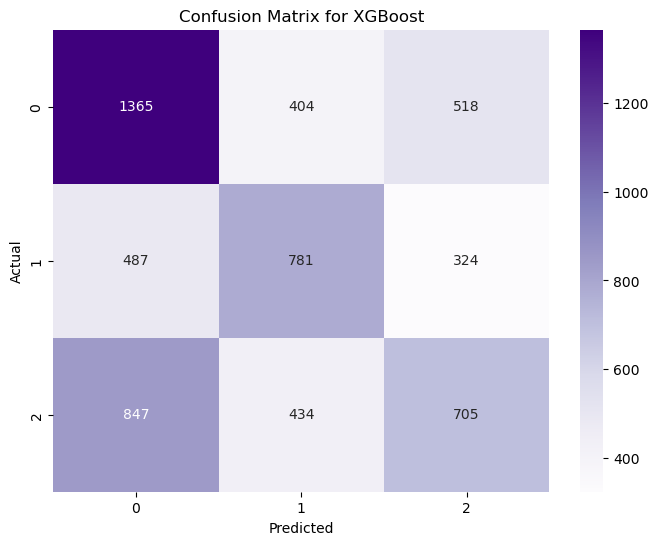

In [63]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Check the mapping of labels
print("Label Mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")

# Train the XGBoost model with the encoded labels
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train_encoded)
# The eval_metric parameter specifies the evaluation metric used for validation during training. 
# mlogloss stands for multi-class logarithmic loss (also known as cross-entropy loss).


# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Decode the predictions back to original labels for reporting
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)

# Evaluate the model
print("XGBoost Performance:")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_xgb):.4f}")

macro_f1 = f1_score(y_test_encoded, y_pred_xgb, average='macro')
print(f"Macro F1-Score: {macro_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_decoded))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_decoded), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix for XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 2.6.1 Hyperparameter Tuning

Step 1: Key Hyperparameters to Tune

1. n_estimators: The number of boosting rounds or trees.

2. learning_rate: Controls the contribution of each tree; lower values make the model more robust but require more trees.

3. max_depth: Maximum depth of each tree; deeper trees can model more complex relationships but are more prone to overfitting.

4. min_child_weight: Minimum sum of instance weight (hessian) needed in a child node; used to control overfitting.

5. subsample: Fraction of samples used for training each tree; prevents overfitting by making the model more robust.

6. colsample_bytree: Fraction of features used for each tree; helps with overfitting.

7. gamma: Minimum loss reduction required to make a further partition on a leaf node; controls the complexity of the tree.

8. reg_alpha and reg_lambda: L1 and L2 regularization terms; help prevent overfitting.

Step 2: Create a Hyperparameter Grid

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters from Randomized Search:
{'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alpha': 0.01, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 1.0}

XGBoost Performance After Hyperparameter Tuning:
Accuracy: 0.4834
Macro F1-Score: 0.4742

Classification Report:
              precision    recall  f1-score   support

    Advanced       0.51      0.60      0.55      2287
    Beginner       0.48      0.49      0.48      1592
Intermediate       0.44      0.34      0.39      1986

    accuracy                           0.48      5865
   macro avg       0.48      0.48      0.47      5865
weighted avg       0.48      0.48      0.48      5865



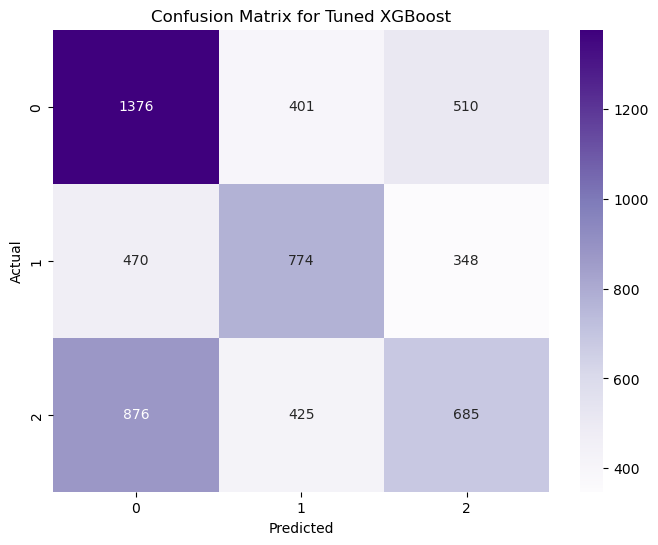

In [65]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# Instantiate the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the random search model
random_search.fit(X_train, y_train_encoded)

# Print the best parameters
print("Best Parameters from Randomized Search:")
print(random_search.best_params_)

# Use the best estimator for predictions
best_xgb_model = random_search.best_estimator_
y_pred_xgb_tuned = best_xgb_model.predict(X_test)
y_pred_xgb_tuned_decoded = label_encoder.inverse_transform(y_pred_xgb_tuned)

# Evaluate the tuned model
print("\nXGBoost Performance After Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_xgb_tuned):.4f}")

# Calculate and print Macro F1-Score
macro_f1 = f1_score(y_test_encoded, y_pred_xgb_tuned, average='macro')
print(f"Macro F1-Score: {macro_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_tuned_decoded))

# Plot the confusion matrix for the tuned model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_tuned_decoded), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix for Tuned XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV

# Define a narrower parameter grid based on RandomizedSearchCV results
param_grid_refined = {
    'learning_rate': [0.05, 0.075, 0.1],
    'max_depth': [5, 6, 7],
    'min_child_weight': [1, 2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'n_estimators': [300, 400, 500]
}

# Run GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_refined,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search model
grid_search.fit(X_train, y_train_encoded)

# Print the best parameters found by GridSearchCV
print("Best Parameters from Grid Search:")
print(grid_search.best_params_)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters from Grid Search:
{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 400, 'subsample': 0.8}


XGBoost Performance with Tuned Parameters:
Accuracy: 0.4864
Macro F1-Score: 0.4761

Classification Report:
              precision    recall  f1-score   support

    Advanced       0.51      0.61      0.55      2287
    Beginner       0.49      0.49      0.49      1592
Intermediate       0.45      0.34      0.38      1986

    accuracy                           0.49      5865
   macro avg       0.48      0.48      0.48      5865
weighted avg       0.48      0.49      0.48      5865



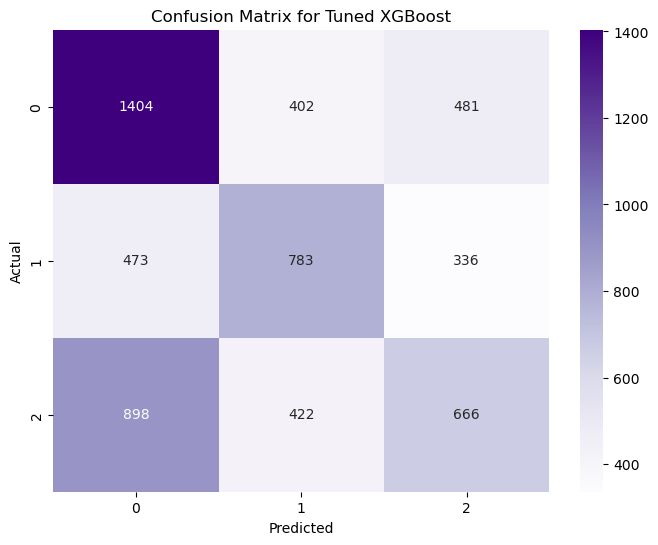

In [66]:
# Instantiate the XGBoost model with the best parameters
xgb_model_tuned = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=1,
    n_estimators=400,
    subsample=0.8,
    use_label_encoder=False,  # To prevent the deprecation warning
    eval_metric='mlogloss',   # To specify the evaluation metric
    random_state=42           # Ensures reproducibility
)

# Train the model with the training set
xgb_model_tuned.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred_xgb_tuned = xgb_model_tuned.predict(X_test)

# Decode the predictions back to original labels for reporting
y_pred_xgb_tuned_decoded = label_encoder.inverse_transform(y_pred_xgb_tuned)

# Evaluate the tuned model
print("XGBoost Performance with Tuned Parameters:")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_xgb_tuned):.4f}")

# Calculate and print Macro F1-Score
macro_f1 = f1_score(y_test_encoded, y_pred_xgb_tuned, average='macro')
print(f"Macro F1-Score: {macro_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_tuned_decoded))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_tuned_decoded), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix for Tuned XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### 2.6.1.1 Unimportant Features Dropped

XGBoost Performance with Tuned Parameters and Reduced Features:
Accuracy: 0.4822
Macro F1-Score: 0.4718

Classification Report:
              precision    recall  f1-score   support

    Advanced       0.51      0.61      0.55      2287
    Beginner       0.49      0.48      0.49      1592
Intermediate       0.43      0.33      0.38      1986

    accuracy                           0.48      5865
   macro avg       0.48      0.48      0.47      5865
weighted avg       0.48      0.48      0.48      5865



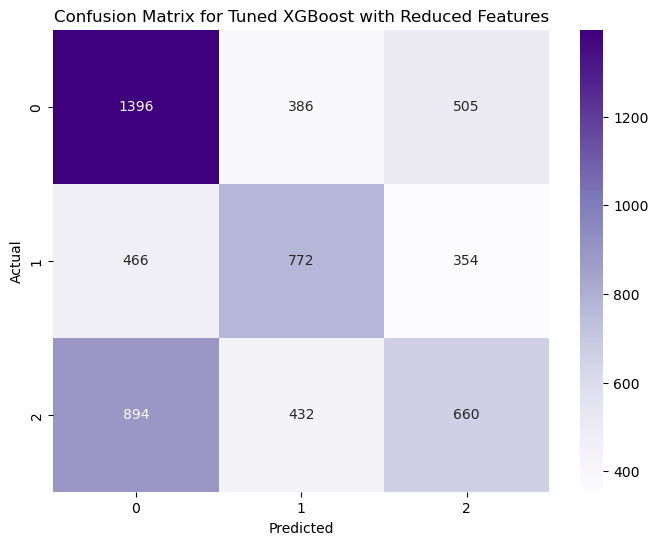

In [67]:
# Instantiate the XGBoost model with the best parameters
xgb_model_tuned = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=1,
    n_estimators=400,
    subsample=0.8,
    use_label_encoder=False,  # To prevent the deprecation warning
    eval_metric='mlogloss',   # To specify the evaluation metric
    random_state=42           # Ensures reproducibility
)

# Train the XGBoost model with the reduced feature set
xgb_model_tuned.fit(X_train_reduced, y_train_encoded)

# Predict on the test set with the reduced feature set
y_pred_xgb_tuned_reduced = xgb_model_tuned.predict(X_test_reduced)

# Decode the predictions back to original labels for reporting
y_pred_xgb_tuned_reduced_decoded = label_encoder.inverse_transform(y_pred_xgb_tuned_reduced)

# Evaluate the tuned model with the reduced feature set
print("XGBoost Performance with Tuned Parameters and Reduced Features:")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_xgb_tuned_reduced):.4f}")

# Calculate and print Macro F1-Score
macro_f1 = f1_score(y_test_encoded, y_pred_xgb_tuned_reduced, average='macro')
print(f"Macro F1-Score: {macro_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_tuned_reduced_decoded))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_tuned_reduced_decoded), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix for Tuned XGBoost with Reduced Features")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 2.6.2 K-fold Cross-validation

In [110]:
# Perform k-fold cross-validation
scoring = {'accuracy': 'accuracy', 'macro_f1': 'f1_macro'}  # Metrics for evaluation
k = 5  # Number of folds

cv_results_xgb = cross_validate(
    xgb_model_tuned,        # Model to cross-validate
    X_train,   # Final selected features for training
    y_train_encoded,     # Encoded target variable
    cv=k,                # Number of cross-validation folds
    scoring=scoring,     # Metrics to evaluate
    n_jobs=-1, # Use all available processors
)

# Print cross-validation results
print(f"{k}-Fold Cross-Validation Results for XGBoost Model with All Features:")
print(f"Mean Accuracy: {cv_results_xgb['test_accuracy'].mean():.4f} ± {cv_results_xgb['test_accuracy'].std():.4f}")
print(f"Mean Macro F1-Score: {cv_results_xgb['test_macro_f1'].mean():.4f} ± {cv_results_xgb['test_macro_f1'].std():.4f}")



5-Fold Cross-Validation Results for XGBoost Model with All Features:
Mean Accuracy: 0.4797 ± 0.0073
Mean Macro F1-Score: 0.4686 ± 0.0078


In [35]:
# Number of folds for k-fold cross-validation
k = 5  # You can choose 5 or 10 based on your preference

# Perform k-fold cross-validation on the reduced training set with the tuned XGBoost model
cv_scores_xgb_reduced = cross_val_score(
    xgb_model_tuned,       # The tuned XGBoost model
    X_train_reduced,       # Reduced feature training set
    y_train_encoded,       # Encoded target variable
    cv=k,                  # Number of folds for cross-validation
    scoring='accuracy',    # You can use 'f1_macro' or another metric if preferred
    n_jobs=-1              # Use all available CPU cores for faster processing
)

# Print the cross-validation results
print(f"{k}-Fold Cross-Validation Results for Tuned XGBoost with Reduced Features:")
print(f"Mean Accuracy: {cv_scores_xgb_reduced.mean():.4f}")
print(f"Standard Deviation: {cv_scores_xgb_reduced.std():.4f}")

# Optionally, print all scores for each fold
print("\nCross-Validation Scores for Each Fold:")
print(cv_scores_xgb_reduced)


5-Fold Cross-Validation Results for Tuned XGBoost with Reduced Features:
Mean Accuracy: 0.4767
Standard Deviation: 0.0094

Cross-Validation Scores for Each Fold:
[0.47932651 0.4719676  0.48049456 0.46173524 0.48987423]


-----------------------------------------------------------------------------------------------------------------------------

# III. RQ1:Experiment (2nd round with Feature Selection)

## 3.1 Random Forest

In [283]:
# Extract feature importance
feature_importances = pd.Series(rf_model_tuned2.feature_importances_, index=X_train.columns)

# Display feature importance
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))


Feature Importances:
Sentence_Length         0.153527
VP                      0.088008
NP                      0.081006
clauses_per_sentence    0.071855
CP                      0.057973
ADVP                    0.056412
P_Variety               0.048037
PP                      0.034165
QP                      0.033272
DNP                     0.030353
CLP                     0.029146
S_VarietyW              0.028025
{JSy}                   0.025939
S_Variety               0.025270
{JSs}                   0.023833
ADJP                    0.021889
SC_Error                0.019513
{JXxw}                  0.017931
SS_Error                0.016479
E_Variety               0.015332
{JSld}                  0.010077
VRD                     0.009596
{JSbz}                  0.009317
{JXfzw}                 0.008348
{JSba}                  0.006568
{JSbi}                  0.006558
{JSjy}                  0.006540
{JXmw}                  0.005964
{JSbj}                  0.005832
{JSsd2}               

#### 3.1.1 Threshold for Top15

In [284]:
# Select the top 15 features
top_15_features = feature_importances.nlargest(15).index
print("Top 15 Features:")
print(top_15_features.tolist())


Top 15 Features:
['Sentence_Length', 'VP', 'NP', 'clauses_per_sentence', 'CP', 'ADVP', 'P_Variety', 'PP', 'QP', 'DNP', 'CLP', 'S_VarietyW', '{JSy}', 'S_Variety', '{JSs}']


In [285]:
# Reduce the training and testing datasets to the top 15 features
X_train_reduced_rf2 = X_train[top_15_features]
X_test_reduced_rf2 = X_test[top_15_features]

print("Reduced Training Dataset Shape:", X_train_reduced_rf2.shape)
print("Reduced Testing Dataset Shape:", X_test_reduced_rf2.shape)


Reduced Training Dataset Shape: (23456, 15)
Reduced Testing Dataset Shape: (5865, 15)


Retrained Random Forest with Top 15 Features Performance:
Accuracy: 0.4665
Macro F1-Score: 0.4539

Classification Report:
              precision    recall  f1-score   support

    Advanced       0.49      0.61      0.54      2287
    Beginner       0.48      0.44      0.46      1592
Intermediate       0.41      0.32      0.36      1986

    accuracy                           0.47      5865
   macro avg       0.46      0.46      0.45      5865
weighted avg       0.46      0.47      0.46      5865



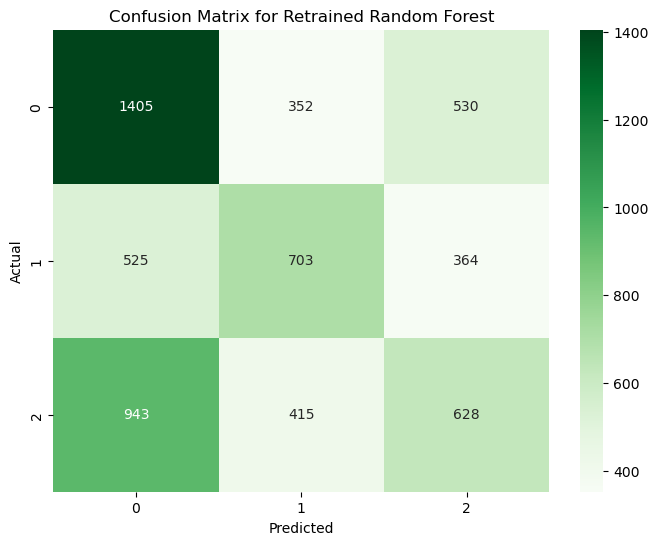

In [286]:
# Instantiate the Random Forest model with the same best parameters
rf_model_retrained = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    bootstrap=False,
    random_state=42
)

# Train the model on the reduced feature set
rf_model_retrained.fit(X_train_reduced_rf2, y_train)

# Predict on the test set
y_pred_rf_retrained = rf_model_retrained.predict(X_test_reduced_rf2)

# Evaluate the model
print("Retrained Random Forest with Top 15 Features Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_retrained):.4f}")

# Calculate and print Macro F1-Score
macro_f1_retrained = f1_score(y_test, y_pred_rf_retrained, average='macro')
print(f"Macro F1-Score: {macro_f1_retrained:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_retrained))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_retrained), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix for Retrained Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### 3.1.2 Incremental Feature Selection

In [287]:
# Sort features by importance in descending order
sorted_features = feature_importances.sort_values(ascending=False).index.tolist()
print(sorted_features)


['Sentence_Length', 'VP', 'NP', 'clauses_per_sentence', 'CP', 'ADVP', 'P_Variety', 'PP', 'QP', 'DNP', 'CLP', 'S_VarietyW', '{JSy}', 'S_Variety', '{JSs}', 'ADJP', 'SC_Error', '{JXxw}', 'SS_Error', 'E_Variety', '{JSld}', 'VRD', '{JSbz}', '{JXfzw}', '{JSba}', '{JSbi}', '{JSjy}', '{JXmw}', '{JSbj}', '{JSsd2}', 'DVP', '{JSshb}', '{JScx}', '{JLgt}', '{JLqs}', '{JXzww}', '{JSjs}', 'VPT', '{JSsd1}', '{JSchd}', 'VSB', '{JLshf}', '{JLfw}', '{JSlz}', '{JSgd}', '{JSshd}', 'VNV', 'VCP', '{JSbd}', 'UCP', 'MSP']


In [288]:

# Initialize an empty list to store results
performance_results = []

# Iterate over the features one by one (or in small batches)
for i in range(1, len(sorted_features) + 1):  # Start with 1 feature, then 2, 3, ..., all
    # Select the top `i` features
    selected_features = sorted_features[:i]
    
    # Reduce the dataset to the selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    
    # Retrain the model with the selected features
    rf_model_tuned2 = RandomForestClassifier(
        n_estimators=500,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='log2',
        bootstrap=False,
        random_state=42
    )
    rf_model_tuned2.fit(X_train_selected, y_train)
    
    # Evaluate the model
    y_pred = rf_model_tuned2.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    
    # Store the results
    performance_results.append({'num_features': i, 'accuracy': accuracy, 'macro_f1': macro_f1})

# Convert the results to a DataFrame for analysis
performance_df = pd.DataFrame(performance_results)


In [289]:
print(performance_df)

    num_features  accuracy  macro_f1
0              1  0.433760  0.410220
1              2  0.427621  0.417053
2              3  0.425575  0.415411
3              4  0.427451  0.413537
4              5  0.434953  0.423534
5              6  0.436147  0.423410
6              7  0.448593  0.435604
7              8  0.455413  0.443412
8              9  0.450639  0.437808
9             10  0.454220  0.439481
10            11  0.457118  0.443569
11            12  0.455243  0.441748
12            13  0.459335  0.445900
13            14  0.457460  0.444076
14            15  0.466496  0.453930
15            16  0.465985  0.454974
16            17  0.462745  0.449813
17            18  0.467178  0.453664
18            19  0.465814  0.452503
19            20  0.465303  0.451141
20            21  0.464791  0.451086
21            22  0.470247  0.457026
22            23  0.468201  0.454773
23            24  0.470077  0.456113
24            25  0.473316  0.459500
25            26  0.475021  0.461672
2

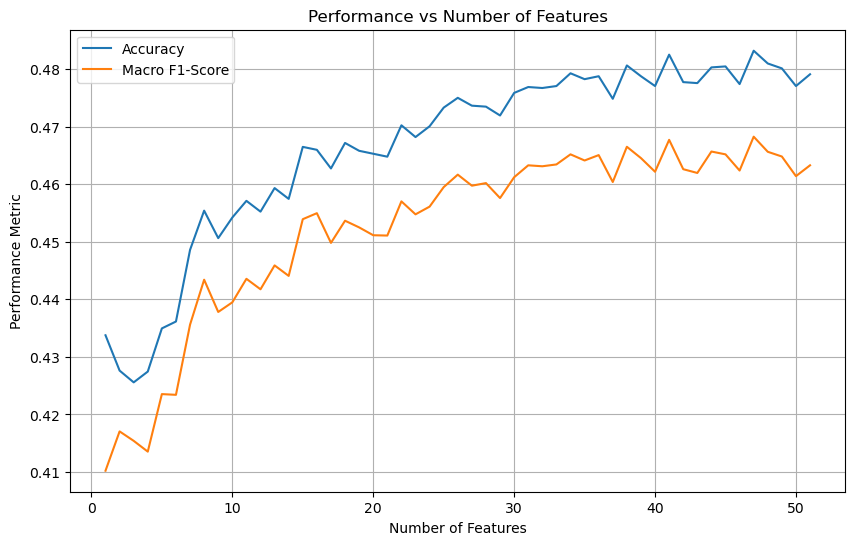

In [290]:
import matplotlib.pyplot as plt

# Plot accuracy and macro F1-score against the number of features
plt.figure(figsize=(10, 6))
plt.plot(performance_df['num_features'], performance_df['accuracy'], label='Accuracy')
plt.plot(performance_df['num_features'], performance_df['macro_f1'], label='Macro F1-Score')
plt.xlabel("Number of Features")
plt.ylabel("Performance Metric")
plt.title("Performance vs Number of Features")
plt.legend()
plt.grid()
plt.show()


#### 3.1.3 Feature Drop (Final Optimal)

Features to drop: ['SS_Error', 'SC_Error', '{JSshb}', 'CLP', 'CP', 'DVP', 'MSP', 'UCP', 'VPT']
Reduced Training Dataset Shape: (23456, 42)
Reduced Testing Dataset Shape: (5865, 42)
Retrained Random Forest Performance (After Dropping Features):
Accuracy: 0.4820
Macro F1-Score: 0.4659

Classification Report:
              precision    recall  f1-score   support

    Advanced       0.50      0.61      0.55      2287
    Beginner       0.47      0.49      0.48      1592
Intermediate       0.44      0.31      0.36      1986

    accuracy                           0.48      5865
   macro avg       0.47      0.47      0.46      5865
weighted avg       0.47      0.48      0.47      5865



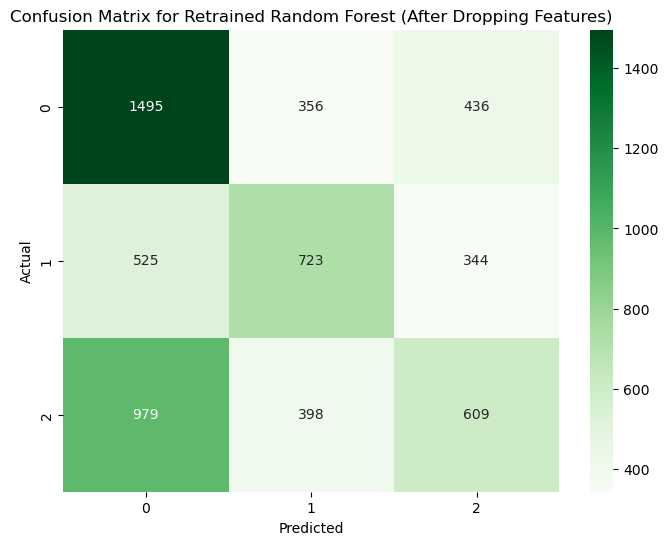

In [291]:
# Step 1: Identify feature names corresponding to indices 1, 2, 22, 38, 39, 41, 42, 45, and 48
features_to_drop_indices = [1, 2, 22, 38, 39, 41, 42, 45, 48]
features_to_drop = [X_train.columns[i] for i in features_to_drop_indices]

print("Features to drop:", features_to_drop)

# Step 2: Drop the specified features from the training and testing datasets
X_train_reduced_rf_final = X_train.drop(columns=features_to_drop)
X_test_reduced_rf_final = X_test.drop(columns=features_to_drop)

print("Reduced Training Dataset Shape:", X_train_reduced_rf_final.shape)
print("Reduced Testing Dataset Shape:", X_test_reduced_rf_final.shape)

# Step 3: Retrain the model with the reduced dataset
rf_model_tuned2 = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    bootstrap=False,
    random_state=42
)
rf_model_tuned2.fit(X_train_reduced_rf_final, y_train)

# Step 4: Predict on the test set and evaluate the model
y_pred_tuned2 = rf_model_tuned2.predict(X_test_reduced_rf_final)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred_tuned2)
macro_f1 = f1_score(y_test, y_pred_tuned2, average='macro')

print(f"Retrained Random Forest Performance (After Dropping Features):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro F1-Score: {macro_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_retrained))

# Step 5: Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned2), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix for Retrained Random Forest (After Dropping Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Features to drop: ['SS_Error', 'SC_Error', '{JSshb}', 'CLP', 'CP', 'DVP', 'MSP', 'UCP', 'VPT']
Reduced Training Dataset Shape: (23456, 42)
Reduced Testing Dataset Shape: (5865, 42)
Retrained Random Forest Performance (After Dropping Features):
Accuracy: 0.4820
Macro F1-Score: 0.4659

Classification Report:
              precision    recall  f1-score   support

    Advanced       0.50      0.61      0.55      2287
    Beginner       0.47      0.49      0.48      1592
Intermediate       0.44      0.31      0.36      1986

    accuracy                           0.48      5865
   macro avg       0.47      0.47      0.46      5865
weighted avg       0.47      0.48      0.47      5865



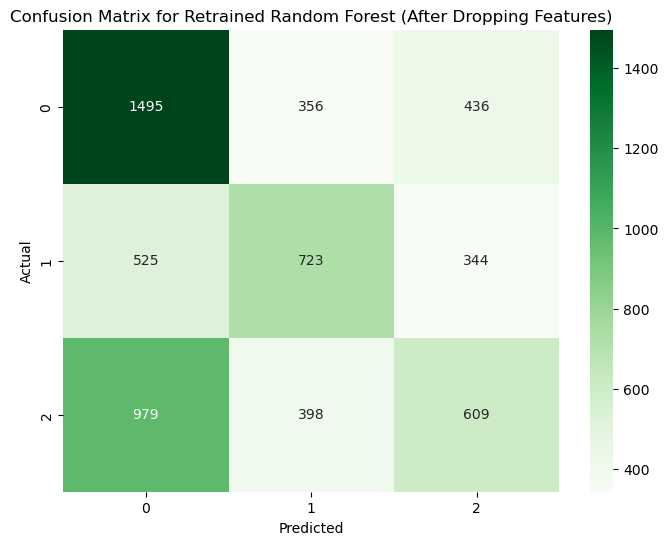

In [334]:
# Step 1: Identify feature names corresponding to indices 1, 2, 22, 38, 39, 41, 42, 45, and 48
features_to_drop_indices = [1, 2, 22, 38, 39, 41, 42, 45, 48]
features_to_drop = [X_train.columns[i] for i in features_to_drop_indices]

print("Features to drop:", features_to_drop)

# Step 2: Drop the specified features from the training and testing datasets
X_train_reduced_rf_final = X_train.drop(columns=features_to_drop)
X_test_reduced_rf_final = X_test.drop(columns=features_to_drop)

print("Reduced Training Dataset Shape:", X_train_reduced_rf_final.shape)
print("Reduced Testing Dataset Shape:", X_test_reduced_rf_final.shape)

# Step 3: Retrain the model with the reduced dataset
rf_model_tuned2 = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    bootstrap=False,
    random_state=42
)
rf_model_tuned2.fit(X_train_reduced_rf_final, y_train)

# Step 4: Predict on the test set and evaluate the model
y_pred_tuned2 = rf_model_tuned2.predict(X_test_reduced_rf_final)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred_tuned2)
macro_f1 = f1_score(y_test, y_pred_tuned2, average='macro')

print(f"Retrained Random Forest Performance (After Dropping Features):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro F1-Score: {macro_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_retrained))

# Step 5: Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned2), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix for Retrained Random Forest (After Dropping Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.savefig("Confusion Matrix for RF (After Feature Selection).png", dpi=300)
plt.show()


Accuracy and F1-Score for each fold:
Fold 1: Accuracy = 0.4657, F1-Score (macro) = 0.4503
Fold 2: Accuracy = 0.4666, F1-Score (macro) = 0.4473
Fold 3: Accuracy = 0.4617, F1-Score (macro) = 0.4461
Fold 4: Accuracy = 0.4739, F1-Score (macro) = 0.4593
Fold 5: Accuracy = 0.4747, F1-Score (macro) = 0.4522

Mean Performance Across Folds:
Mean Accuracy: 0.4685 ± 0.0050
Mean F1-Score (macro): 0.4511 ± 0.0047


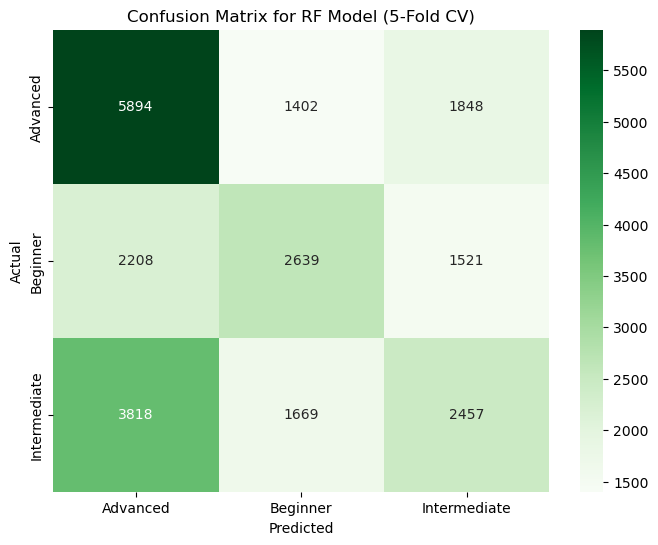


Classification Report (Aggregated from CV Predictions):
              precision    recall  f1-score   support

    Advanced       0.49      0.64      0.56      9144
    Beginner       0.46      0.41      0.44      6368
Intermediate       0.42      0.31      0.36      7944

    accuracy                           0.47     23456
   macro avg       0.46      0.46      0.45     23456
weighted avg       0.46      0.47      0.46     23456



In [292]:

# Define the Random Forest model with the specified hyperparameters
rf_model_tuned2 = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    bootstrap=False,
    random_state=42
)

# Define 5-fold cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute metrics for each fold
cv_results = cross_validate(
    rf_model_tuned2,
    X_train_reduced_rf_final,
    y_train,
    cv=cv_strategy,
    scoring=['accuracy', 'f1_macro'],  # Compute both accuracy and macro F1-score
    return_train_score=False
)

# Print accuracy and F1-score for each fold
print("Accuracy and F1-Score for each fold:")
for fold_idx, (acc, f1) in enumerate(zip(cv_results['test_accuracy'], cv_results['test_f1_macro']), 1):
    print(f"Fold {fold_idx}: Accuracy = {acc:.4f}, F1-Score (macro) = {f1:.4f}")

# Print the mean and standard deviation of accuracy and F1-score
print("\nMean Performance Across Folds:")
print(f"Mean Accuracy: {np.mean(cv_results['test_accuracy']):.4f} ± {np.std(cv_results['test_accuracy']):.4f}")
print(f"Mean F1-Score (macro): {np.mean(cv_results['test_f1_macro']):.4f} ± {np.std(cv_results['test_f1_macro']):.4f}")

# Generate predictions for each fold using cross_val_predict
# This allows us to aggregate predictions across all folds
y_pred_cv = cross_val_predict(rf_model_tuned2, X_train_reduced_rf_final, y_train, cv=cv_strategy)

# Create a confusion matrix from the aggregated predictions
conf_matrix = confusion_matrix(y_train, y_pred_cv)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title("Confusion Matrix for RF Model (5-Fold CV)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print a detailed classification report from the aggregated predictions
print("\nClassification Report (Aggregated from CV Predictions):")
print(classification_report(y_train, y_pred_cv))


#### 3.1.4 K-fold Cross-validation

In [248]:
from sklearn.model_selection import cross_validate

# Set the number of folds for cross-validation
k = 5

# Reinitialize the Random Forest model with the same hyperparameters
rf_model_cv = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    bootstrap=False,
    random_state=42
)

# Perform k-fold cross-validation
scoring = {'accuracy': 'accuracy', 'macro_f1': 'f1_macro'}
cv_results = cross_validate(rf_model_cv, X_train_reduced_rf_final, y_train, cv=k, scoring=scoring, n_jobs=-1)

# Print cross-validation results
print(f"{k}-Fold Cross-Validation Results:")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"Mean Macro F1-Score: {cv_results['test_macro_f1'].mean():.4f} ± {cv_results['test_macro_f1'].std():.4f}")


5-Fold Cross-Validation Results:
Mean Accuracy: 0.4703 ± 0.0073
Mean Macro F1-Score: 0.4525 ± 0.0074


Conclude: After dropping the above features, the mofel performs a little bit better on test set, but performs a little bit worse on k-fold cross-validation. Therefore, I will add the features back one by one to explore its affect on the k-fold cross-validation.

In [82]:
from sklearn.model_selection import cross_validate

# Set the number of folds for cross-validation
k = 5  # You can also try 10 for more robust validation

# Use the full training dataset (without dropping any features)
X_train_full = X_train  # Original dataset with all features

# Reinitialize the Random Forest model with the same hyperparameters
rf_model_full = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    bootstrap=False,
    random_state=42
)

# Perform k-fold cross-validation on the full dataset
scoring = {'accuracy': 'accuracy', 'macro_f1': 'f1_macro'}
cv_results_full = cross_validate(rf_model_full, X_train_full, y_train, cv=k, scoring=scoring, n_jobs=-1)

# Print cross-validation results
print(f"{k}-Fold Cross-Validation Results (All Features):")
print(f"Mean Accuracy: {cv_results_full['test_accuracy'].mean():.4f} ± {cv_results_full['test_accuracy'].std():.4f}")
print(f"Mean Macro F1-Score: {cv_results_full['test_macro_f1'].mean():.4f} ± {cv_results_full['test_macro_f1'].std():.4f}")


5-Fold Cross-Validation Results (All Features):
Mean Accuracy: 0.4746 ± 0.0077
Mean Macro F1-Score: 0.4573 ± 0.0078


#### 3.1.5 Add features back for K-fold Cross-validation

In [298]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, f1_score

def evaluate_model_with_features(X_train, X_test, y_train, y_test, features):
    """
    Train and evaluate the Random Forest model with specified features.
    """
    # Subset the datasets with the selected features
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    # Initialize the Random Forest model
    rf_model_tuned2 = RandomForestClassifier(
        n_estimators=500,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='log2',
        bootstrap=False,
        random_state=42
    )

    # Perform k-fold cross-validation
    scoring = {'accuracy': 'accuracy', 'macro_f1': 'f1_macro'}
    cv_results = cross_validate(rf_model_tuned2, X_train_subset, y_train, cv=5, scoring=scoring, n_jobs=-1)
    cv_mean_accuracy = cv_results['test_accuracy'].mean()
    cv_mean_f1 = cv_results['test_macro_f1'].mean()

    # Train and evaluate on the test set
    rf_model_tuned2.fit(X_train_subset, y_train)
    y_pred = rf_model_tuned2.predict(X_test_subset)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_macro_f1 = f1_score(y_test, y_pred, average='macro')

    return cv_mean_accuracy, cv_mean_f1, test_accuracy, test_macro_f1


In [299]:
results = []

# Start with the reduced feature set
current_features = X_train_reduced_rf_final.columns.tolist()

for feature in features_to_drop:
    # Add one dropped feature back
    current_features_with_added = current_features + [feature]

    print(f"Evaluating with feature added back: {feature}")
    cv_mean_accuracy, cv_mean_f1, test_accuracy, test_macro_f1 = evaluate_model_with_features(
        X_train, X_test, y_train_encoded, y_test_encoded, current_features_with_added
    )

    # Store results
    results.append({
        'added_feature': feature,
        'cv_mean_accuracy': cv_mean_accuracy,
        'cv_mean_f1': cv_mean_f1,
        'test_accuracy': test_accuracy,
        'test_macro_f1': test_macro_f1
    })

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)


Evaluating with feature added back: SS_Error
Evaluating with feature added back: SC_Error
Evaluating with feature added back: {JSshb}
Evaluating with feature added back: CLP
Evaluating with feature added back: CP
Evaluating with feature added back: DVP
Evaluating with feature added back: MSP
Evaluating with feature added back: UCP
Evaluating with feature added back: VPT
  added_feature  cv_mean_accuracy  cv_mean_f1  test_accuracy  test_macro_f1
0      SS_Error          0.468878    0.450970       0.479625       0.463682
1      SC_Error          0.469901    0.452328       0.479284       0.463382
2       {JSshb}          0.470157    0.452039       0.479454       0.463213
3           CLP          0.471308    0.453423       0.480648       0.464268
4            CP          0.476125    0.459724       0.479625       0.464739
5           DVP          0.469773    0.451662       0.482182       0.465663
6           MSP          0.468792    0.451156       0.482523       0.465868
7           UCP    

After adding each feature back, compare the cross-validation and test performance metrics.



Features that improved performance:
  added_feature  cv_mean_accuracy  cv_mean_f1  test_accuracy  test_macro_f1
4            CP          0.476125    0.459724       0.479625       0.464739
3           CLP          0.471308    0.453423       0.480648       0.464268
1      SC_Error          0.469901    0.452328       0.479284       0.463382
2       {JSshb}          0.470157    0.452039       0.479454       0.463213
5           DVP          0.469773    0.451662       0.482182       0.465663


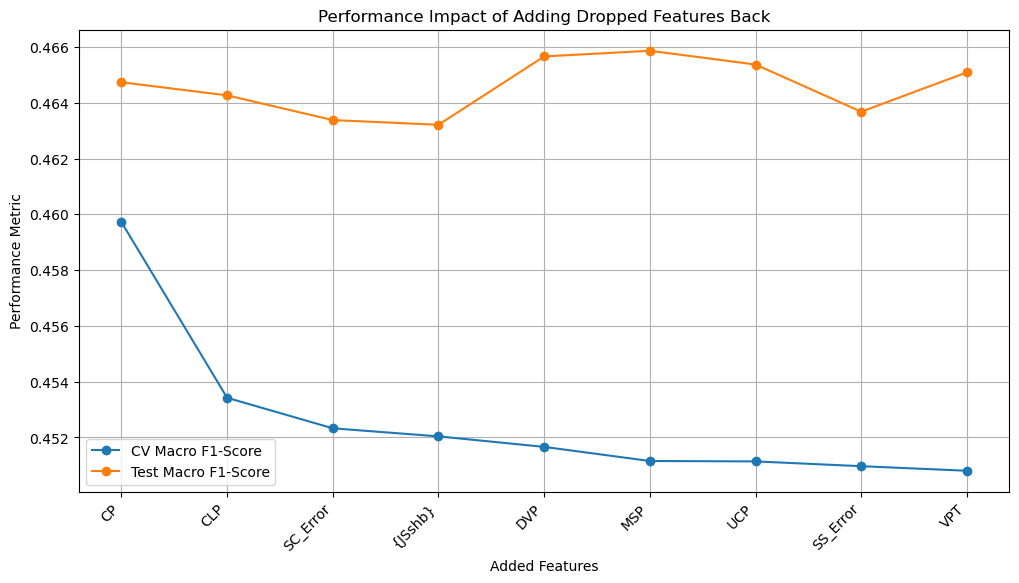

In [300]:
# Sort by performance improvements
results_df.sort_values(by=['cv_mean_f1', 'test_macro_f1'], ascending=False, inplace=True)

# Print the features that improved performance the most
print("Features that improved performance:")
print(results_df.head())

# Plot performance changes for better visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results_df['added_feature'], results_df['cv_mean_f1'], label='CV Macro F1-Score', marker='o')
plt.plot(results_df['added_feature'], results_df['test_macro_f1'], label='Test Macro F1-Score', marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Added Features")
plt.ylabel("Performance Metric")
plt.title("Performance Impact of Adding Dropped Features Back")
plt.legend()
plt.grid()
plt.show()


In [301]:
# Select features that improved CV or test F1-score significantly
features_to_keep = results_df.loc[
    (results_df['cv_mean_f1'] > 0.4525) | 
    (results_df['test_macro_f1'] > 0.4659),
    'added_feature'
].tolist()

print(f"Features to keep: {features_to_keep}")

Features to keep: ['CP', 'CLP']


In [87]:
# Select features that improved CV or test F1-score significantly
features_to_keep = results_df.loc[
    (results_df['cv_mean_f1'] > 0.4525) | 
    (results_df['test_macro_f1'] > 0.4659),
    'added_feature'
].tolist()

print(f"Features to keep: {features_to_keep}")


Features to keep: ['CP', 'CLP']


#### 3.1.6 Retrain the Tuned 2 Model (Optimal for k-fold cross-validation performance)

In [302]:
# Add back only the selected features
final_features = X_train_reduced_rf_final.columns.tolist() + features_to_keep

# Subset the datasets with the final features
X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

# Retrain the model
rf_model_tuned2 = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    bootstrap=False,
    random_state=42
)
rf_model_tuned2.fit(X_train_final, y_train)

# Evaluate final model on the test set
y_pred_final = rf_model_tuned2.predict(X_test_final)
final_test_accuracy = accuracy_score(y_test, y_pred_final)
final_test_macro_f1 = f1_score(y_test, y_pred_final, average='macro')

print(f"Final Model Performance:")
print(f"Test Accuracy: {final_test_accuracy:.4f}")
print(f"Test Macro F1-Score: {final_test_macro_f1:.4f}")


Final Model Performance:
Test Accuracy: 0.4800
Test Macro F1-Score: 0.4653


In [303]:
# Print the shape of the final feature set
print(f"Final Selected Features: {len(final_features)}")
print(f"Shape of Training Dataset: {X_train_final.shape}")
print(f"Shape of Testing Dataset: {X_test_final.shape}")

Final Selected Features: 44
Shape of Training Dataset: (23456, 44)
Shape of Testing Dataset: (5865, 44)


Accuracy and F1-Score for each fold:
Fold 1: Accuracy = 0.4653, F1-Score (macro) = 0.4510
Fold 2: Accuracy = 0.4758, F1-Score (macro) = 0.4594
Fold 3: Accuracy = 0.4709, F1-Score (macro) = 0.4558
Fold 4: Accuracy = 0.4822, F1-Score (macro) = 0.4682
Fold 5: Accuracy = 0.4811, F1-Score (macro) = 0.4608

Mean Performance Across Folds:
Mean Accuracy: 0.4751 ± 0.0064
Mean F1-Score (macro): 0.4591 ± 0.0057


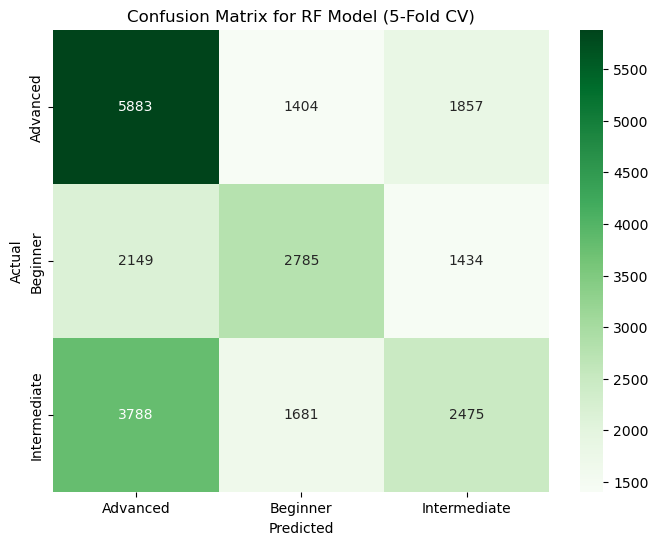


Classification Report (Aggregated from CV Predictions):
              precision    recall  f1-score   support

    Advanced       0.50      0.64      0.56      9144
    Beginner       0.47      0.44      0.46      6368
Intermediate       0.43      0.31      0.36      7944

    accuracy                           0.48     23456
   macro avg       0.47      0.46      0.46     23456
weighted avg       0.47      0.48      0.46     23456



In [304]:

# Define the Random Forest model with the specified hyperparameters
rf_model_tuned2 = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    bootstrap=False,
    random_state=42
)

# Define 5-fold cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute metrics for each fold
cv_results = cross_validate(
    rf_model_tuned2,
    X_train_final,
    y_train,
    cv=cv_strategy,
    scoring=['accuracy', 'f1_macro'],  # Compute both accuracy and macro F1-score
    return_train_score=False
)

# Print accuracy and F1-score for each fold
print("Accuracy and F1-Score for each fold:")
for fold_idx, (acc, f1) in enumerate(zip(cv_results['test_accuracy'], cv_results['test_f1_macro']), 1):
    print(f"Fold {fold_idx}: Accuracy = {acc:.4f}, F1-Score (macro) = {f1:.4f}")

# Print the mean and standard deviation of accuracy and F1-score
print("\nMean Performance Across Folds:")
print(f"Mean Accuracy: {np.mean(cv_results['test_accuracy']):.4f} ± {np.std(cv_results['test_accuracy']):.4f}")
print(f"Mean F1-Score (macro): {np.mean(cv_results['test_f1_macro']):.4f} ± {np.std(cv_results['test_f1_macro']):.4f}")

# Generate predictions for each fold using cross_val_predict
# This allows us to aggregate predictions across all folds
y_pred_cv = cross_val_predict(rf_model_tuned2, X_train_final, y_train, cv=cv_strategy)

# Create a confusion matrix from the aggregated predictions
conf_matrix = confusion_matrix(y_train, y_pred_cv)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title("Confusion Matrix for RF Model (5-Fold CV)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print a detailed classification report from the aggregated predictions
print("\nClassification Report (Aggregated from CV Predictions):")
print(classification_report(y_train, y_pred_cv))


In [90]:
# Perform k-fold cross-validation on the final model with the selected features
scoring = {'accuracy': 'accuracy', 'macro_f1': 'f1_macro'}  # Define the metrics
k = 5  # Number of folds

cv_results_final = cross_validate(
    rf_model_tuned2,  # Use the trained Random Forest model
    X_train_final,   # Final reduced training dataset
    y_train,         # Target labels
    cv=k,            # Number of folds
    scoring=scoring, # Scoring metrics
    n_jobs=-1        # Use all available cores for faster computation
)

# Print cross-validation results
print(f"{k}-Fold Cross-Validation Results for Final Model:")
print(f"Mean Accuracy: {cv_results_final['test_accuracy'].mean():.4f} ± {cv_results_final['test_accuracy'].std():.4f}")
print(f"Mean Macro F1-Score: {cv_results_final['test_macro_f1'].mean():.4f} ± {cv_results_final['test_macro_f1'].std():.4f}")


5-Fold Cross-Validation Results for Final Model:
Mean Accuracy: 0.4758 ± 0.0072
Mean Macro F1-Score: 0.4593 ± 0.0076


-----------------------------------------------------------------------------------------------------------------------------

## 3.2 XGBoost

Start by using the same final features selecting upon Random Forest model. The rationale can be refered in my Notion File.

#### 3.2.1 Retrain the Model using Final Features from RF Model

In [305]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the training and testing target variables
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Check the label mapping for reference
print("Label Mapping:")
for class_name, encoded_label in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{class_name} -> {encoded_label}")

Label Mapping:
Advanced -> 0
Beginner -> 1
Intermediate -> 2


In [307]:
xgb_model_tuned = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=1,
    n_estimators=400,
    subsample=0.8,
    use_label_encoder=False,  # To prevent the deprecation warning
    eval_metric='mlogloss',   # To specify the evaluation metric
    random_state=42           # Ensures reproducibility
)

xgb_model_tuned.fit(X_train_final, y_train_encoded)

# Predict on the test set
y_pred_xgb_encoded = xgb_model_tuned.predict(X_test_final)

# Decode predictions back to the original labels
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
macro_f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')

print(f"XGBoost Performance with Final Features:")
print(f"Test Accuracy: {accuracy_xgb:.4f}")
print(f"Test Macro F1-Score: {macro_f1_xgb:.4f}")


XGBoost Performance with Final Features:
Test Accuracy: 0.4832
Test Macro F1-Score: 0.4729


In [306]:
xgb_model_tuned.fit(X_train_final, y_train_encoded)

# Predict on the test set
y_pred_xgb_encoded = xgb_model_tuned.predict(X_test_final)

# Decode predictions back to the original labels
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
macro_f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')

print(f"XGBoost Performance with Final Features:")
print(f"Test Accuracy: {accuracy_xgb:.4f}")
print(f"Test Macro F1-Score: {macro_f1_xgb:.4f}")

XGBoost Performance with Final Features:
Test Accuracy: 0.4832
Test Macro F1-Score: 0.4729


In [216]:
xgb_model_tuned.fit(X_train_final, y_train_encoded)

# Predict on the test set
y_pred_xgb_encoded = xgb_model_tuned.predict(X_test_final)

# Decode predictions back to the original labels
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
macro_f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')

print(f"XGBoost Performance with Final Features:")
print(f"Test Accuracy: {accuracy_xgb:.4f}")
print(f"Test Macro F1-Score: {macro_f1_xgb:.4f}")

XGBoost Performance with Final Features:
Test Accuracy: 0.4882
Test Macro F1-Score: 0.4782


#### 3.2.2 Conduct K-fold Cross-Validation

In [217]:
# Perform k-fold cross-validation
scoring = {'accuracy': 'accuracy', 'macro_f1': 'f1_macro'}  # Define scoring metrics
k = 5  # Number of folds

cv_results_xgb = cross_validate(
    xgb_model_tuned,        # Model to cross-validate
    X_train_final,       # Final selected features for training
    y_train_encoded,     # Encoded target variable
    cv=k,                # Number of cross-validation folds
    scoring=scoring,     # Metrics to evaluate
    n_jobs=-1            # Use all available processors for faster computation
)

# Print cross-validation results
print(f"{k}-Fold Cross-Validation Results for XGBoost Model:")
print(f"Mean Accuracy: {cv_results_xgb['test_accuracy'].mean():.4f} ± {cv_results_xgb['test_accuracy'].std():.4f}")
print(f"Mean Macro F1-Score: {cv_results_xgb['test_macro_f1'].mean():.4f} ± {cv_results_xgb['test_macro_f1'].std():.4f}")

5-Fold Cross-Validation Results for XGBoost Model:
Mean Accuracy: 0.4786 ± 0.0069
Mean Macro F1-Score: 0.4674 ± 0.0070


#### 3.2.3 Incremental Feature Selection upon XGBoost

In [308]:
# Train an initial XGBoost model on all features
xgb_model_tuned.fit(X_train, y_train_encoded)

# Get feature importances
xgb_importance = xgb_model_tuned.get_booster().get_score(importance_type='weight')

# Sort features by importance in descending order
sorted_features = sorted(xgb_importance.items(), key=lambda x: x[1], reverse=True)
sorted_features = [feature[0] for feature in sorted_features]

print("Features sorted by importance (XGBoost):")
print(sorted_features)


Features sorted by importance (XGBoost):
['Sentence_Length', 'NP', 'clauses_per_sentence', 'VP', 'ADVP', 'P_Variety', 'CP', 'QP', 'DNP', 'CLP', 'PP', 'S_VarietyW', 'ADJP', '{JXxw}', 'S_Variety', 'SC_Error', '{JSy}', '{JSs}', 'SS_Error', '{JSld}', 'VRD', '{JSba}', 'E_Variety', '{JSjy}', '{JSbz}', '{JSbi}', '{JSbj}', '{JScx}', '{JXfzw}', '{JSsd2}', 'DVP', '{JSshb}', '{JXmw}', '{JLgt}', '{JLqs}', 'VPT', '{JSjs}', '{JXzww}', '{JLfw}', '{JSchd}', '{JSsd1}', '{JSgd}', 'VSB', '{JLshf}', 'VCP', '{JSlz}', '{JSbd}', '{JSshd}', 'VNV']


In [309]:
# Initialize lists to store results
performance_results_xgb = []

# Incrementally add features and evaluate performance
for i in range(1, len(sorted_features) + 1):
    # Select the top `i` features
    selected_features = sorted_features[:i]
    
    # Reduce the training and test datasets
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    
    # Perform k-fold cross-validation
    scoring = {'accuracy': 'accuracy', 'macro_f1': 'f1_macro'}
    cv_results = cross_validate(xgb_model_tuned, X_train_selected, y_train_encoded, cv=5, scoring=scoring, n_jobs=-1)
    
    # Store results
    performance_results_xgb.append({
        'num_features': i,
        'cv_mean_accuracy': cv_results['test_accuracy'].mean(),
        'cv_mean_f1': cv_results['test_macro_f1'].mean()
    })

# Convert results to a DataFrame for analysis
performance_df_xgb = pd.DataFrame(performance_results_xgb)


In [310]:
print(performance_df_xgb)

    num_features  cv_mean_accuracy  cv_mean_f1
0              1          0.438097    0.411683
1              2          0.436477    0.410212
2              3          0.435880    0.414273
3              4          0.437543    0.416928
4              5          0.441124    0.421233
5              6          0.443810    0.424017
6              7          0.451185    0.434871
7              8          0.453956    0.438483
8              9          0.454510    0.439338
9             10          0.453104    0.437872
10            11          0.454297    0.439042
11            12          0.454383    0.440077
12            13          0.455577    0.441449
13            14          0.458604    0.444984
14            15          0.461503    0.448300
15            16          0.459925    0.446907
16            17          0.462909    0.450700
17            18          0.464060    0.451793
18            19          0.464103    0.452341
19            20          0.468196    0.456825
20           

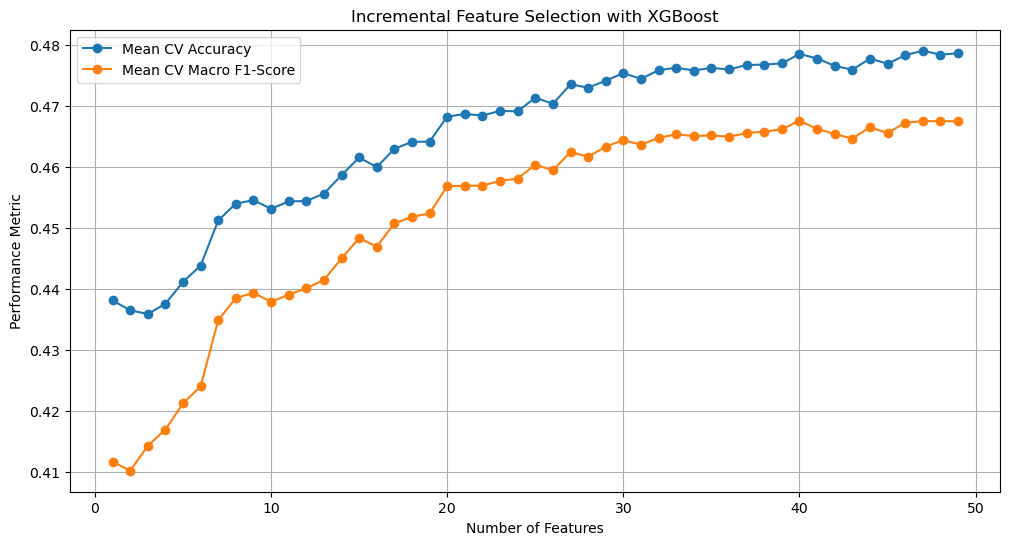

In [311]:
import matplotlib.pyplot as plt

# Plot accuracy and macro F1-score against the number of features
plt.figure(figsize=(12, 6))
plt.plot(performance_df_xgb['num_features'], performance_df_xgb['cv_mean_accuracy'], label='Mean CV Accuracy', marker='o')
plt.plot(performance_df_xgb['num_features'], performance_df_xgb['cv_mean_f1'], label='Mean CV Macro F1-Score', marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Performance Metric')
plt.title('Incremental Feature Selection with XGBoost')
plt.legend()
plt.grid()
plt.show()


In [312]:
# Find the row with the best performance (e.g., highest macro F1-score)
best_row = performance_df_xgb.loc[performance_df_xgb['cv_mean_f1'].idxmax()]
optimal_num_features = best_row['num_features']

print(f"Optimal Number of Features: {int(optimal_num_features)}")

# Select the top features
final_features_xgb = sorted_features[:int(optimal_num_features)]
print(f"Selected Features for XGBoost: {final_features_xgb}")


Optimal Number of Features: 40
Selected Features for XGBoost: ['Sentence_Length', 'NP', 'clauses_per_sentence', 'VP', 'ADVP', 'P_Variety', 'CP', 'QP', 'DNP', 'CLP', 'PP', 'S_VarietyW', 'ADJP', '{JXxw}', 'S_Variety', 'SC_Error', '{JSy}', '{JSs}', 'SS_Error', '{JSld}', 'VRD', '{JSba}', 'E_Variety', '{JSjy}', '{JSbz}', '{JSbi}', '{JSbj}', '{JScx}', '{JXfzw}', '{JSsd2}', 'DVP', '{JSshb}', '{JXmw}', '{JLgt}', '{JLqs}', 'VPT', '{JSjs}', '{JXzww}', '{JLfw}', '{JSchd}']


In [313]:
# Subset the dataset with selected features
X_train_final_xgb = X_train[final_features_xgb]
X_test_final_xgb = X_test[final_features_xgb]

xgb_model_tuned = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=1,
    n_estimators=400,
    subsample=0.8,
    use_label_encoder=False,  # To prevent the deprecation warning
    eval_metric='mlogloss',   # To specify the evaluation metric
    random_state=42           # Ensures reproducibility
)

# Retrain XGBoost model with the selected features
xgb_model_tuned.fit(X_train_final_xgb, y_train_encoded)

# Predict on the test set
y_pred_final_xgb = xgb_model_tuned.predict(X_test_final_xgb)

# Decode predictions back to original labels
y_pred_final_labels = label_encoder.inverse_transform(y_pred_final_xgb)

# Evaluate on the test set
test_accuracy_xgb = accuracy_score(y_test, y_pred_final_labels)
test_macro_f1_xgb = f1_score(y_test, y_pred_final_labels, average='macro')

print(f"Final XGBoost Model Performance with Selected Features:")
print(f"Test Accuracy: {test_accuracy_xgb:.4f}")
print(f"Test Macro F1-Score: {test_macro_f1_xgb:.4f}")


Final XGBoost Model Performance with Selected Features:
Test Accuracy: 0.4844
Test Macro F1-Score: 0.4742


#### 3.2.4 Conduct K-fold Cross-Validation

In [314]:
# Perform k-fold cross-validation
scoring = {'accuracy': 'accuracy', 'macro_f1': 'f1_macro'}  # Metrics for evaluation
k = 5  # Number of folds

cv_results_xgb = cross_validate(
    xgb_model_tuned,        # Model to cross-validate
    X_train_final_xgb,   # Final selected features for training
    y_train_encoded,     # Encoded target variable
    cv=k,                # Number of cross-validation folds
    scoring=scoring,     # Metrics to evaluate
    n_jobs=-1            # Use all available processors
)

# Print cross-validation results
print(f"{k}-Fold Cross-Validation Results for XGBoost Model with Selected Features:")
print(f"Mean Accuracy: {cv_results_xgb['test_accuracy'].mean():.4f} ± {cv_results_xgb['test_accuracy'].std():.4f}")
print(f"Mean Macro F1-Score: {cv_results_xgb['test_macro_f1'].mean():.4f} ± {cv_results_xgb['test_macro_f1'].std():.4f}")

5-Fold Cross-Validation Results for XGBoost Model with Selected Features:
Mean Accuracy: 0.4785 ± 0.0091
Mean Macro F1-Score: 0.4675 ± 0.0094


#### 3.2.5 Incremental feature selection (2nd round)

In [315]:
# Step 1: Identify feature names corresponding to indices 1, 2, 22, 38, 39, 41, 42, 45, and 48
features_to_drop_indices = [9, 15, 25, 27, 30, 35, 40, 41, 42, 44]
features_to_drop = [X_train.columns[i] for i in features_to_drop_indices]

print("Features to drop:", features_to_drop)

# Step 2: Drop the specified features from the training and testing datasets
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

print("Reduced Training Dataset Shape:", X_train_reduced.shape)
print("Reduced Testing Dataset Shape:", X_test_reduced.shape)

Features to drop: ['{JSbd}', '{JSgd}', '{JSy}', '{JXmw}', 'E_Variety', 'VP', 'DNP', 'DVP', 'MSP', 'QP']
Reduced Training Dataset Shape: (23456, 41)
Reduced Testing Dataset Shape: (5865, 41)


Retrained XGBoost Performance (After Dropping Features):
Accuracy: 0.4760
Macro F1-Score: 0.4643

Classification Report:
              precision    recall  f1-score   support

    Advanced       0.50      0.61      0.55      2287
    Beginner       0.47      0.49      0.48      1592
Intermediate       0.44      0.31      0.36      1986

    accuracy                           0.48      5865
   macro avg       0.47      0.47      0.46      5865
weighted avg       0.47      0.48      0.47      5865



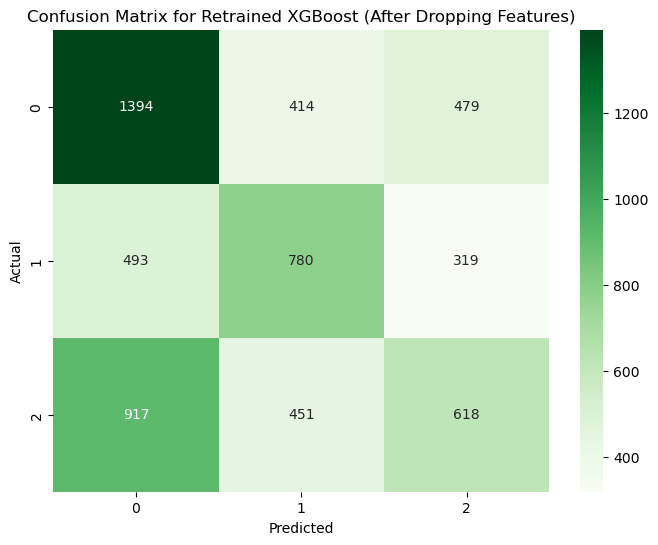

In [316]:
# Step 1: Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode training labels
y_test_encoded = label_encoder.transform(y_test)        # Encode test labels

# Step 2: Retrain the model with the reduced dataset
xgb_model_tuned.fit(X_train_reduced, y_train_encoded)  # Use the encoded labels

# Step 3: Predict on the test set and evaluate the model
y_pred_retrained_encoded = xgb_model_tuned.predict(X_test_reduced)

# Decode the predictions back to the original labels (optional, for readability)
y_pred_retrained = label_encoder.inverse_transform(y_pred_retrained_encoded)

# Evaluate the performance using encoded labels
accuracy = accuracy_score(y_test_encoded, y_pred_retrained_encoded)
macro_f1 = f1_score(y_test_encoded, y_pred_retrained_encoded, average='macro')

print(f"Retrained XGBoost Performance (After Dropping Features):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro F1-Score: {macro_f1:.4f}")

# Classification Report (decoded for readability)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_retrained))

# Step 4: Plot confusion matrix (decoded for readability)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_retrained), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix for Retrained XGBoost (After Dropping Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [317]:
def evaluate_model_with_features(X_train, X_test, y_train_encoded, y_test_encoded, features):
    """
    Train and evaluate the Random Forest model with specified features.
    """
    # Subset the datasets with the selected features
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    # Perform k-fold cross-validation
    scoring = {'accuracy': 'accuracy', 'macro_f1': 'f1_macro'}
    cv_results = cross_validate(xgb_model_tuned, X_train_subset, y_train_encoded, cv=5, scoring=scoring, n_jobs=-1)
    cv_mean_accuracy = cv_results['test_accuracy'].mean()
    cv_mean_f1 = cv_results['test_macro_f1'].mean()

    # Train and evaluate on the test set
    xgb_model_tuned.fit(X_train_subset, y_train_encoded)
    y_pred = xgb_model_tuned.predict(X_test_subset)
    
    # Decode predictions back to the original labels
    y_pred_xgb = label_encoder.inverse_transform(y_pred)
    
    test_accuracy = accuracy_score(y_test, y_pred_xgb)
    test_macro_f1 = f1_score(y_test, y_pred_xgb, average='macro')

    return cv_mean_accuracy, cv_mean_f1, test_accuracy, test_macro_f1

In [117]:
results = []

# Start with the reduced feature set
current_features = X_train_reduced.columns.tolist()

for feature in features_to_drop:
    # Add one dropped feature back
    current_features_with_added = current_features + [feature]

    print(f"Evaluating with feature added back: {feature}")
    cv_mean_accuracy, cv_mean_f1, test_accuracy, test_macro_f1 = evaluate_model_with_features(
        X_train, X_test, y_train_encoded, y_test_encoded, current_features_with_added
    )

    # Store results
    results.append({
        'added_feature': feature,
        'cv_mean_accuracy': cv_mean_accuracy,
        'cv_mean_f1': cv_mean_f1,
        'test_accuracy': test_accuracy,
        'test_macro_f1': test_macro_f1
    })

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results)

Evaluating with feature added back: {JSbd}
Evaluating with feature added back: {JSgd}
Evaluating with feature added back: {JSy}
Evaluating with feature added back: {JXmw}
Evaluating with feature added back: E_Variety
Evaluating with feature added back: VP
Evaluating with feature added back: DNP
Evaluating with feature added back: DVP
Evaluating with feature added back: MSP
Evaluating with feature added back: QP


  added_feature  cv_mean_accuracy  cv_mean_f1  test_accuracy  test_macro_f1
0        {JSbd}          0.471862    0.459384       0.480989       0.470059
1        {JSgd}          0.472971    0.460294       0.482864       0.471626
2         {JSy}          0.474420    0.462791       0.478772       0.467778
3        {JXmw}          0.473355    0.460750       0.483035       0.471318
4     E_Variety          0.473141    0.460761       0.482182       0.470901
5            VP          0.474463    0.462086       0.483205       0.471456
6           DNP          0.473653    0.461960       0.479966       0.469605
7           DVP          0.474719    0.462510       0.480818       0.468994
8           MSP          0.472203    0.459816       0.480136       0.469000
9            QP          0.474548    0.462305       0.479966       0.468770
Features that improved performance:
  added_feature  cv_mean_accuracy  cv_mean_f1  test_accuracy  test_macro_f1
2         {JSy}          0.474420    0.462791       

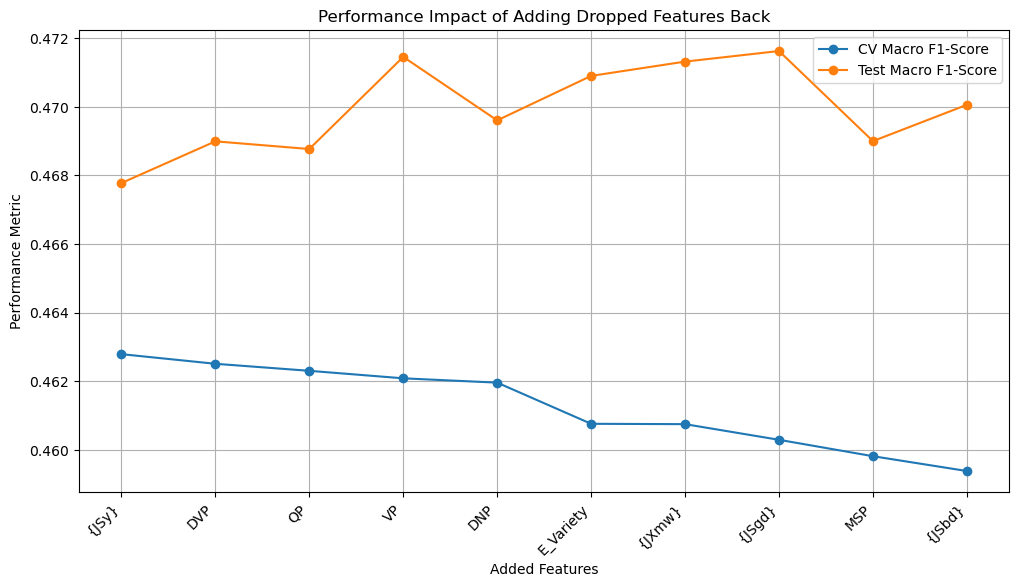

In [118]:
print(results_df)

# Sort by performance improvements
results_df.sort_values(by=['cv_mean_f1', 'test_macro_f1'], ascending=False, inplace=True)

# Print the features that improved performance the most
print("Features that improved performance:")
print(results_df.head())

# Plot performance changes for better visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results_df['added_feature'], results_df['cv_mean_f1'], label='CV Macro F1-Score', marker='o')
plt.plot(results_df['added_feature'], results_df['test_macro_f1'], label='Test Macro F1-Score', marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Added Features")
plt.ylabel("Performance Metric")
plt.title("Performance Impact of Adding Dropped Features Back")
plt.legend()
plt.grid()
plt.show()


In [122]:
# Select features that improved CV or test F1-score significantly
features_to_keep = results_df.loc[
    (results_df['cv_mean_f1'] > 0.4686) | 
    (results_df['test_macro_f1'] > 0.4718),
    'added_feature'
].tolist()

print(f"Features to keep: {features_to_keep}")

Features to keep: []


-------------------------------------------------------------------------------

## 3.3 XGBoost (2nd)

Start from the Tuned model 2.6.1, with all 51 features

Step 1: Obtain Feature Importance from the Model

XGBoost Performance with Tuned Parameters:
Accuracy: 0.4864
Macro F1-Score: 0.4761

Classification Report:
              precision    recall  f1-score   support

    Advanced       0.51      0.61      0.55      2287
    Beginner       0.49      0.49      0.49      1592
Intermediate       0.45      0.34      0.38      1986

    accuracy                           0.49      5865
   macro avg       0.48      0.48      0.48      5865
weighted avg       0.48      0.49      0.48      5865



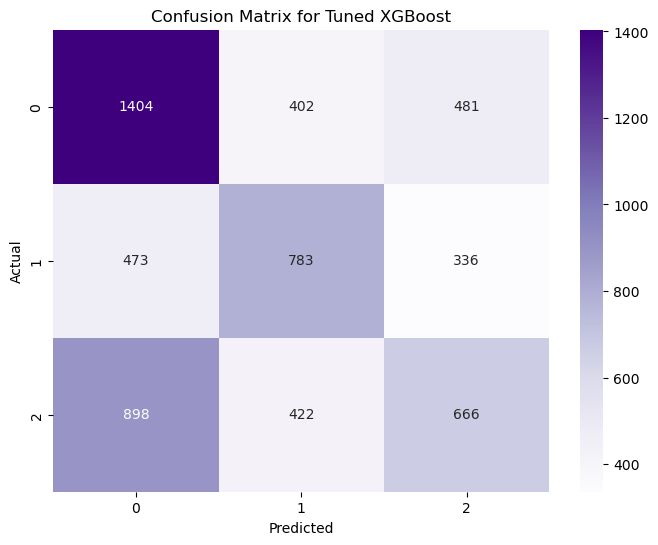

In [318]:
# Instantiate the XGBoost model with the best parameters
xgb_model_tuned = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=1,
    n_estimators=400,
    subsample=0.8,
    use_label_encoder=False,  # To prevent the deprecation warning
    eval_metric='mlogloss',   # To specify the evaluation metric
    random_state=42           # Ensures reproducibility
)

# Train the model with the training set
xgb_model_tuned.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred_xgb_tuned = xgb_model_tuned.predict(X_test)

# Decode the predictions back to original labels for reporting
y_pred_xgb_tuned_decoded = label_encoder.inverse_transform(y_pred_xgb_tuned)

# Evaluate the tuned model
print("XGBoost Performance with Tuned Parameters:")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_xgb_tuned):.4f}")

# Calculate and print Macro F1-Score
macro_f1 = f1_score(y_test_encoded, y_pred_xgb_tuned, average='macro')
print(f"Macro F1-Score: {macro_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_tuned_decoded))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_tuned_decoded), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix for Tuned XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [319]:
# Get feature importance scores
xgb_importances = xgb_model_tuned.feature_importances_

# Map feature names to their importance scores
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)


Feature Importance:
                 Feature  Importance
0        Sentence_Length    0.044104
39                    CP    0.036986
26               {JXfzw}    0.035424
25                 {JSy}    0.032413
12                {JSbz}    0.032242
24                 {JSs}    0.029831
31            S_VarietyW    0.024890
35                    VP    0.023225
4                 {JLfw}    0.022317
3              S_Variety    0.021624
10                {JSbi}    0.021472
7                {JLshf}    0.021187
6                 {JLqs}    0.021054
28                {JXxw}    0.020975
19                {JSlz}    0.020873
18                {JSld}    0.020777
13               {JSchd}    0.020669
41                   DVP    0.020567
8                 {JSba}    0.020171
21               {JSsd2}    0.020113
27                {JXmw}    0.019887
32             P_Variety    0.019687
22               {JSshb}    0.018758
5                 {JLgt}    0.018654
14                {JScx}    0.018618
36                

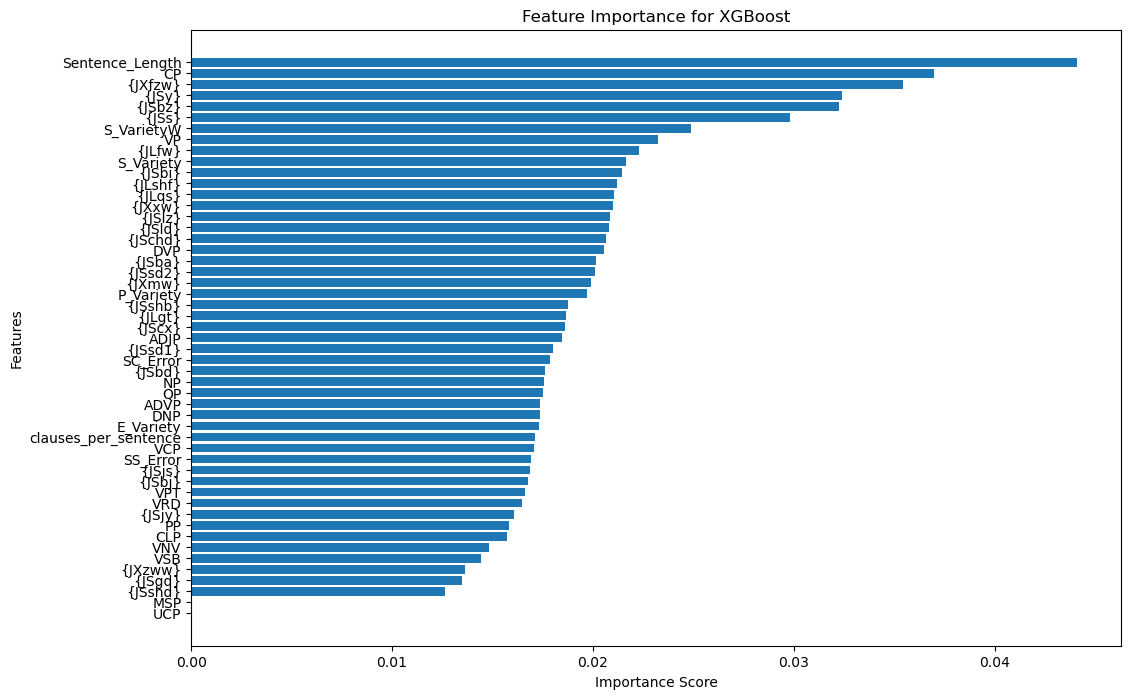

In [320]:
# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.gca().invert_yaxis()  # Highest importance at the top
plt.title("Feature Importance for XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [321]:
# Set a threshold for importance (e.g., 0.01)
threshold = 0.02
features_to_drop = feature_importance[feature_importance['Importance'] < threshold]['Feature'].tolist()

print(f"Features to drop (Importance < {threshold}): {features_to_drop}")


Features to drop (Importance < 0.02): ['{JXmw}', 'P_Variety', '{JSshb}', '{JLgt}', '{JScx}', 'ADJP', '{JSsd1}', 'SC_Error', '{JSbd}', 'NP', 'QP', 'ADVP', 'DNP', 'E_Variety', 'clauses_per_sentence', 'VCP', 'SS_Error', '{JSjs}', '{JSbj}', 'VPT', 'VRD', '{JSjy}', 'PP', 'CLP', 'VNV', 'VSB', '{JXzww}', '{JSgd}', '{JSshd}', 'MSP', 'UCP']


Step 4: Retrain the Model with Reduced Features

In [322]:
# Drop unimportant features
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

# Retrain the model with reduced features
xgb_model_reduced = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=1,
    n_estimators=400,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_model_reduced.fit(X_train_reduced, y_train_encoded)

# Predict and evaluate
y_pred_reduced = xgb_model_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test_encoded, y_pred_reduced)
macro_f1_reduced = f1_score(y_test_encoded, y_pred_reduced, average='macro')

print("Performance After Dropping Features:")
print(f"Accuracy: {accuracy_reduced:.4f}")
print(f"Macro F1-Score: {macro_f1_reduced:.4f}")


Performance After Dropping Features:
Accuracy: 0.4708
Macro F1-Score: 0.4573


Step 5: Incremental Feature Selection (Optional)

In [323]:
performance_results = []

# Start with the most important features
sorted_features = feature_importance['Feature'].tolist()

for i in range(1, len(sorted_features) + 1):
    # Select the top `i` features
    selected_features = sorted_features[:i]
    
    # Subset the dataset
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    
    # Train and evaluate the model
    xgb_model = XGBClassifier(
        colsample_bytree=0.8,
        learning_rate=0.05,
        max_depth=5,
        min_child_weight=1,
        n_estimators=400,
        subsample=0.8,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )
    xgb_model.fit(X_train_selected, y_train_encoded)
    y_pred = xgb_model.predict(X_test_selected)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test_encoded, y_pred)
    macro_f1 = f1_score(y_test_encoded, y_pred, average='macro')
    performance_results.append({'num_features': i, 'accuracy': accuracy, 'macro_f1': macro_f1})

# Convert to DataFrame for analysis
performance_df = pd.DataFrame(performance_results)
print(performance_df)


    num_features  accuracy  macro_f1
0              1  0.436147  0.411837
1              2  0.447400  0.422526
2              3  0.450469  0.429604
3              4  0.449787  0.430928
4              5  0.451321  0.431485
5              6  0.457289  0.442229
6              7  0.459335  0.445310
7              8  0.463086  0.449163
8              9  0.462404  0.449566
9             10  0.457118  0.443781
10            11  0.458142  0.444280
11            12  0.456777  0.442657
12            13  0.464450  0.451464
13            14  0.462916  0.448940
14            15  0.464280  0.450176
15            16  0.464280  0.450713
16            17  0.465132  0.451112
17            18  0.468201  0.453879
18            19  0.466326  0.453216
19            20  0.471611  0.458033
20            21  0.472123  0.457936
21            22  0.472805  0.460143
22            23  0.473657  0.460695
23            24  0.472975  0.460380
24            25  0.474851  0.462055
25            26  0.474851  0.461572
2

In [324]:
# Find the row with the best performance (highest macro F1-score)
best_row = performance_df.loc[performance_df['macro_f1'].idxmax()]
optimal_num_features = int(best_row['num_features'])

print(f"Optimal Number of Features: {optimal_num_features}")
print(best_row)


Optimal Number of Features: 46
num_features    46.000000
accuracy         0.486104
macro_f1         0.474906
Name: 45, dtype: float64


In [325]:
# Subset the dataset to the top features
final_features_xgb = sorted_features[:optimal_num_features]  # `sorted_features` is from Step 7

# Print the selected features
print(f"Top {optimal_num_features} Features: {final_features_xgb}")


Top 46 Features: ['Sentence_Length', 'CP', '{JXfzw}', '{JSy}', '{JSbz}', '{JSs}', 'S_VarietyW', 'VP', '{JLfw}', 'S_Variety', '{JSbi}', '{JLshf}', '{JLqs}', '{JXxw}', '{JSlz}', '{JSld}', '{JSchd}', 'DVP', '{JSba}', '{JSsd2}', '{JXmw}', 'P_Variety', '{JSshb}', '{JLgt}', '{JScx}', 'ADJP', '{JSsd1}', 'SC_Error', '{JSbd}', 'NP', 'QP', 'ADVP', 'DNP', 'E_Variety', 'clauses_per_sentence', 'VCP', 'SS_Error', '{JSjs}', '{JSbj}', 'VPT', 'VRD', '{JSjy}', 'PP', 'CLP', 'VNV', 'VSB']


In [326]:
# Subset the training and testing datasets
X_train_final = X_train[final_features_xgb]
X_test_final = X_test[final_features_xgb]

# Retrain the model
xgb_model_final = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=1,
    n_estimators=400,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_model_final.fit(X_train_final, y_train_encoded)

# Predict on the test set
y_pred_final = xgb_model_final.predict(X_test_final)

# Evaluate the final model
accuracy_final = accuracy_score(y_test_encoded, y_pred_final)
macro_f1_final = f1_score(y_test_encoded, y_pred_final, average='macro')

print(f"Final Model Performance with {optimal_num_features} Features:")
print(f"Accuracy: {accuracy_final:.4f}")
print(f"Macro F1-Score: {macro_f1_final:.4f}")


Final Model Performance with 46 Features:
Accuracy: 0.4861
Macro F1-Score: 0.4749


#### Optimal: drop feature indice 35, 36, 37

Dropping features: ['VCP', 'SS_Error', '{JSjs}']
Final selected features: ['Sentence_Length', 'CP', '{JXfzw}', '{JSy}', '{JSbz}', '{JSs}', 'S_VarietyW', 'VP', '{JLfw}', 'S_Variety', '{JSbi}', '{JLshf}', '{JLqs}', '{JXxw}', '{JSlz}', '{JSld}', '{JSchd}', 'DVP', '{JSba}', '{JSsd2}', '{JXmw}', 'P_Variety', '{JSshb}', '{JLgt}', '{JScx}', 'ADJP', '{JSsd1}', 'SC_Error', '{JSbd}', 'NP', 'QP', 'ADVP', 'DNP', 'E_Variety', 'clauses_per_sentence', '{JSbj}', 'VPT', 'VRD', '{JSjy}', 'PP', 'CLP', 'VNV', 'VSB', '{JXzww}', '{JSgd}', '{JSshd}', 'MSP', 'UCP']
Shape of reduced training set: (23456, 48)
Shape of reduced testing set: (5865, 48)
Performance of XGBoost with Selected Features:
Test Accuracy: 0.4882
Test Macro F1-Score: 0.4782

Classification Report:
              precision    recall  f1-score   support

    Advanced       0.51      0.61      0.56      2287
    Beginner       0.49      0.49      0.49      1592
Intermediate       0.45      0.34      0.39      1986

    accuracy                 

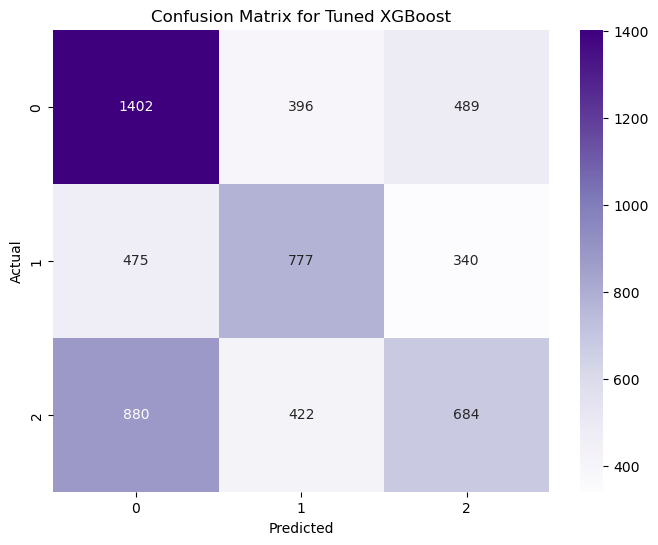

In [327]:
# Get final features excluding indices 35, 36, and 37
features_to_drop = [sorted_features[35], sorted_features[36], sorted_features[37]]
final_features_xgb = [feature for feature in sorted_features if feature not in features_to_drop]

print(f"Dropping features: {features_to_drop}")
print(f"Final selected features: {final_features_xgb}")

# Subset the training and testing datasets with the final features
X_train_final = X_train[final_features_xgb]
X_test_final = X_test[final_features_xgb]

# Print the shape of the reduced dataset
print(f"Shape of reduced training set: {X_train_final.shape}")
print(f"Shape of reduced testing set: {X_test_final.shape}")

# Instantiate the XGBoost model with the tuned hyperparameters
xgb_model_final = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=1,
    n_estimators=400,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Fit the model with the reduced feature set
xgb_model_final.fit(X_train_final, y_train_encoded)

# Predict on the test set
y_pred_final = xgb_model_final.predict(X_test_final)

# Decode the predictions back to original labels for reporting
y_pred_final_decoded = label_encoder.inverse_transform(y_pred_final)

# Evaluate the model
accuracy_final = accuracy_score(y_test_encoded, y_pred_final)
macro_f1_final = f1_score(y_test_encoded, y_pred_final, average='macro')

print("Performance of XGBoost with Selected Features:")
print(f"Test Accuracy: {accuracy_final:.4f}")
print(f"Test Macro F1-Score: {macro_f1_final:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_final_decoded))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_final_decoded), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix for Tuned XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Dropping features: ['VCP', 'SS_Error', '{JSjs}']
Final selected features: ['Sentence_Length', 'CP', '{JXfzw}', '{JSy}', '{JSbz}', '{JSs}', 'S_VarietyW', 'VP', '{JLfw}', 'S_Variety', '{JSbi}', '{JLshf}', '{JLqs}', '{JXxw}', '{JSlz}', '{JSld}', '{JSchd}', 'DVP', '{JSba}', '{JSsd2}', '{JXmw}', 'P_Variety', '{JSshb}', '{JLgt}', '{JScx}', 'ADJP', '{JSsd1}', 'SC_Error', '{JSbd}', 'NP', 'QP', 'ADVP', 'DNP', 'E_Variety', 'clauses_per_sentence', '{JSbj}', 'VPT', 'VRD', '{JSjy}', 'PP', 'CLP', 'VNV', 'VSB', '{JXzww}', '{JSgd}', '{JSshd}', 'MSP', 'UCP']
Shape of reduced training set: (23456, 48)
Shape of reduced testing set: (5865, 48)
Performance of XGBoost with Selected Features:
Test Accuracy: 0.4882
Test Macro F1-Score: 0.4782

Classification Report:
              precision    recall  f1-score   support

    Advanced       0.51      0.61      0.56      2287
    Beginner       0.49      0.49      0.49      1592
Intermediate       0.45      0.34      0.39      1986

    accuracy                 

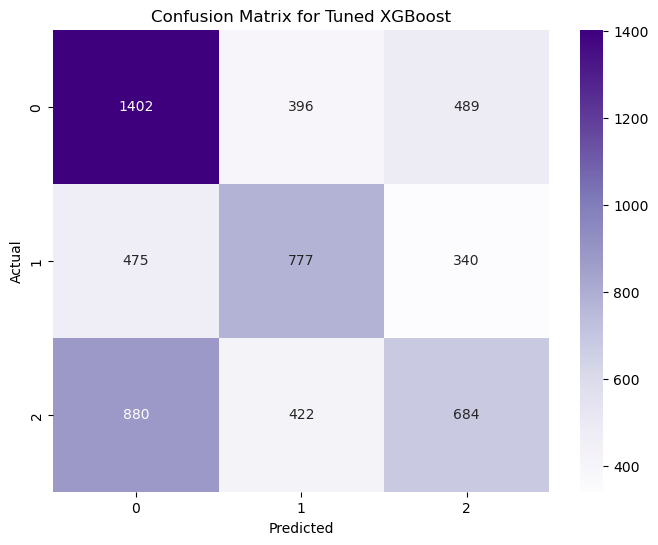

In [336]:
# Get final features excluding indices 35, 36, and 37
features_to_drop = [sorted_features[35], sorted_features[36], sorted_features[37]]
final_features_xgb = [feature for feature in sorted_features if feature not in features_to_drop]

print(f"Dropping features: {features_to_drop}")
print(f"Final selected features: {final_features_xgb}")

# Subset the training and testing datasets with the final features
X_train_final = X_train[final_features_xgb]
X_test_final = X_test[final_features_xgb]

# Print the shape of the reduced dataset
print(f"Shape of reduced training set: {X_train_final.shape}")
print(f"Shape of reduced testing set: {X_test_final.shape}")

# Instantiate the XGBoost model with the tuned hyperparameters
xgb_model_final = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=1,
    n_estimators=400,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Fit the model with the reduced feature set
xgb_model_final.fit(X_train_final, y_train_encoded)

# Predict on the test set
y_pred_final = xgb_model_final.predict(X_test_final)

# Decode the predictions back to original labels for reporting
y_pred_final_decoded = label_encoder.inverse_transform(y_pred_final)

# Evaluate the model
accuracy_final = accuracy_score(y_test_encoded, y_pred_final)
macro_f1_final = f1_score(y_test_encoded, y_pred_final, average='macro')

print("Performance of XGBoost with Selected Features:")
print(f"Test Accuracy: {accuracy_final:.4f}")
print(f"Test Macro F1-Score: {macro_f1_final:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_final_decoded))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_final_decoded), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix for Tuned XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.savefig("Confusion Matric for XGBoost (After Feature Selection).png", dpi = 300)
plt.show()


Accuracy and F1-Score for each fold:
Fold 1: Accuracy = 0.4725, F1-Score (macro) = 0.4627
Fold 2: Accuracy = 0.4666, F1-Score (macro) = 0.4531
Fold 3: Accuracy = 0.4686, F1-Score (macro) = 0.4574
Fold 4: Accuracy = 0.4871, F1-Score (macro) = 0.4780
Fold 5: Accuracy = 0.4796, F1-Score (macro) = 0.4652

Mean Performance Across Folds:
Mean Accuracy: 0.4749 ± 0.0076
Mean F1-Score (macro): 0.4633 ± 0.0085


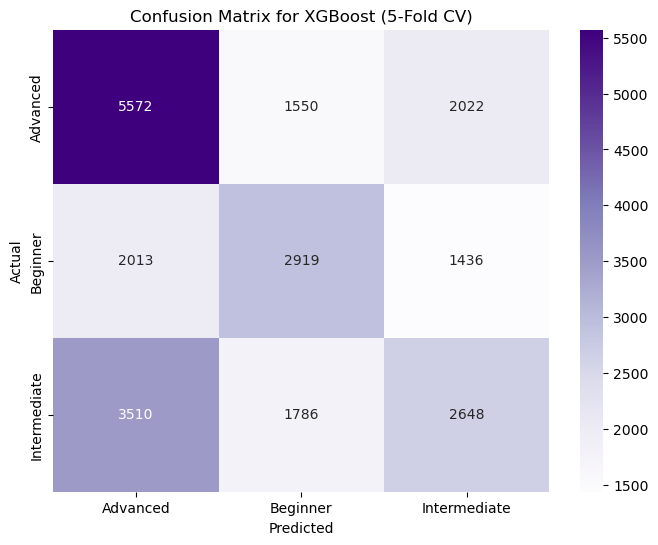


Classification Report (Aggregated from CV Predictions):
              precision    recall  f1-score   support

    Advanced       0.50      0.61      0.55      9144
    Beginner       0.47      0.46      0.46      6368
Intermediate       0.43      0.33      0.38      7944

    accuracy                           0.47     23456
   macro avg       0.47      0.47      0.46     23456
weighted avg       0.47      0.47      0.47     23456



In [328]:


# Define the 5-fold cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold cross-validation and calculate accuracy and macro F1-score
cv_results = cross_validate(
    xgb_model_final,  # The tuned XGBoost model
    X_train_final,    # Reduced training set with selected features
    y_train_encoded,  # Encoded target variable
    cv=cv_strategy,   # 5-fold cross-validation strategy
    scoring=['accuracy', 'f1_macro'],  # Metrics to compute
    return_train_score=False  # Only evaluate on test folds
)

# Print accuracy and F1-score for each fold
print("Accuracy and F1-Score for each fold:")
for fold_idx, (acc, f1) in enumerate(zip(cv_results['test_accuracy'], cv_results['test_f1_macro']), 1):
    print(f"Fold {fold_idx}: Accuracy = {acc:.4f}, F1-Score (macro) = {f1:.4f}")

# Print the mean and standard deviation of accuracy and F1-score
print("\nMean Performance Across Folds:")
print(f"Mean Accuracy: {np.mean(cv_results['test_accuracy']):.4f} ± {np.std(cv_results['test_accuracy']):.4f}")
print(f"Mean F1-Score (macro): {np.mean(cv_results['test_f1_macro']):.4f} ± {np.std(cv_results['test_f1_macro']):.4f}")

# Generate predictions for each fold using cross_val_predict
# This allows us to aggregate predictions across all folds
y_pred_cv = cross_val_predict(xgb_model_final, X_train_final, y_train_encoded, cv=cv_strategy)

# Decode predictions back to original class labels
y_pred_cv_decoded = label_encoder.inverse_transform(y_pred_cv)

# Create a confusion matrix from the aggregated predictions
conf_matrix = confusion_matrix(y_train, y_pred_cv_decoded)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for XGBoost (5-Fold CV)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print a detailed classification report from the aggregated predictions
print("\nClassification Report (Aggregated from CV Predictions):")
print(classification_report(y_train, y_pred_cv_decoded))


In [165]:
# Perform k-fold cross-validation on the reduced dataset
cv_results_final = cross_validate(
    xgb_model_final, X_train_final, y_train_encoded, cv=5, scoring=['accuracy', 'f1_macro'], n_jobs=-1
)

print("Cross-Validation Results with Final Features:")
print(f"Mean Accuracy: {cv_results_final['test_accuracy'].mean():.4f} ± {cv_results_final['test_accuracy'].std():.4f}")
print(f"Mean Macro F1-Score: {cv_results_final['test_f1_macro'].mean():.4f} ± {cv_results_final['test_f1_macro'].std():.4f}")


Cross-Validation Results with Final Features:
Mean Accuracy: 0.4786 ± 0.0069
Mean Macro F1-Score: 0.4674 ± 0.0070


#### Trial for droppinh more

In [158]:
# Features sorted by importance (assuming `sorted_features` contains the ranked feature names)
features_to_drop = [
    sorted_features[3], sorted_features[9], sorted_features[11], sorted_features[23],
    sorted_features[35], sorted_features[36], sorted_features[37],
    sorted_features[41], sorted_features[46], sorted_features[48]
]

# Create the final feature list by excluding the dropped features
final_features_xgb = [feature for feature in sorted_features if feature not in features_to_drop]

print(f"Dropping features: {features_to_drop}")
print(f"Final selected features: {final_features_xgb}")

# Subset the training and testing datasets
X_train_final = X_train[final_features_xgb]
X_test_final = X_test[final_features_xgb]

# Print the shape of the reduced dataset
print(f"Shape of reduced training set: {X_train_final.shape}")
print(f"Shape of reduced testing set: {X_test_final.shape}")

# Instantiate the XGBoost model with the tuned hyperparameters
xgb_model_final = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=1,
    n_estimators=400,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Fit the model with the reduced feature set
xgb_model_final.fit(X_train_final, y_train_encoded)

# Predict on the test set
y_pred_final = xgb_model_final.predict(X_test_final)

# Evaluate the model
accuracy_final = accuracy_score(y_test_encoded, y_pred_final)
macro_f1_final = f1_score(y_test_encoded, y_pred_final, average='macro')

print("Performance of XGBoost with Selected Features:")
print(f"Test Accuracy: {accuracy_final:.4f}")
print(f"Test Macro F1-Score: {macro_f1_final:.4f}")


Dropping features: ['{JSy}', 'S_Variety', '{JLshf}', '{JLgt}', 'VCP', 'SS_Error', '{JSjs}', '{JSjy}', '{JXzww}', '{JSshd}']
Final selected features: ['Sentence_Length', 'CP', '{JXfzw}', '{JSbz}', '{JSs}', 'S_VarietyW', 'VP', '{JLfw}', '{JSbi}', '{JLqs}', '{JXxw}', '{JSlz}', '{JSld}', '{JSchd}', 'DVP', '{JSba}', '{JSsd2}', '{JXmw}', 'P_Variety', '{JSshb}', '{JScx}', 'ADJP', '{JSsd1}', 'SC_Error', '{JSbd}', 'NP', 'QP', 'ADVP', 'DNP', 'E_Variety', 'clauses_per_sentence', '{JSbj}', 'VPT', 'VRD', 'PP', 'CLP', 'VNV', 'VSB', '{JSgd}', 'MSP', 'UCP']
Shape of reduced training set: (23456, 41)
Shape of reduced testing set: (5865, 41)
Performance of XGBoost with Selected Features:
Test Accuracy: 0.4846
Test Macro F1-Score: 0.4728


In [159]:

# Perform k-fold cross-validation on the reduced dataset
cv_results_final = cross_validate(
    xgb_model_final, X_train_final, y_train_encoded, cv=5, scoring=['accuracy', 'f1_macro'], n_jobs=-1
)

print("Cross-Validation Results with Final Features:")
print(f"Mean Accuracy: {cv_results_final['test_accuracy'].mean():.4f} ± {cv_results_final['test_accuracy'].std():.4f}")
print(f"Mean Macro F1-Score: {cv_results_final['test_f1_macro'].mean():.4f} ± {cv_results_final['test_f1_macro'].std():.4f}")


Cross-Validation Results with Final Features:
Mean Accuracy: 0.4733 ± 0.0085
Mean Macro F1-Score: 0.4610 ± 0.0086


In [160]:
# Analyze incremental performance by adding features back
for feature in features_to_drop:
    # Add one feature back
    final_features_xgb.append(feature)
    
    # Subset the dataset
    X_train_temp = X_train[final_features_xgb]
    X_test_temp = X_test[final_features_xgb]
    
    # Retrain and evaluate the model
    xgb_model_temp = XGBClassifier(
        colsample_bytree=0.8,
        learning_rate=0.05,
        max_depth=5,
        min_child_weight=1,
        n_estimators=400,
        subsample=0.8,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )
    xgb_model_temp.fit(X_train_temp, y_train_encoded)
    y_pred_temp = xgb_model_temp.predict(X_test_temp)
    
    accuracy_temp = accuracy_score(y_test_encoded, y_pred_temp)
    macro_f1_temp = f1_score(y_test_encoded, y_pred_temp, average='macro')
    
    print(f"Adding Feature: {feature}")
    print(f"Accuracy: {accuracy_temp:.4f}, Macro F1-Score: {macro_f1_temp:.4f}")


Adding Feature: {JSy}
Accuracy: 0.4866, Macro F1-Score: 0.4756
Adding Feature: S_Variety
Accuracy: 0.4859, Macro F1-Score: 0.4744
Adding Feature: {JLshf}
Accuracy: 0.4851, Macro F1-Score: 0.4747
Adding Feature: {JLgt}
Accuracy: 0.4873, Macro F1-Score: 0.4768
Adding Feature: VCP
Accuracy: 0.4873, Macro F1-Score: 0.4768
Adding Feature: SS_Error
Accuracy: 0.4895, Macro F1-Score: 0.4794
Adding Feature: {JSjs}
Accuracy: 0.4839, Macro F1-Score: 0.4738
Adding Feature: {JSjy}
Accuracy: 0.4851, Macro F1-Score: 0.4748
Adding Feature: {JXzww}
Accuracy: 0.4851, Macro F1-Score: 0.4749
Adding Feature: {JSshd}
Accuracy: 0.4858, Macro F1-Score: 0.4758


In [161]:
# Update the final feature set
best_added_features = ['SS_Error', '{JLgt}', 'VCP']
final_features_xgb = [feature for feature in final_features_xgb if feature not in features_to_drop]
final_features_xgb.extend(best_added_features)

print(f"Final selected features: {final_features_xgb}")


Final selected features: ['Sentence_Length', 'CP', '{JXfzw}', '{JSbz}', '{JSs}', 'S_VarietyW', 'VP', '{JLfw}', '{JSbi}', '{JLqs}', '{JXxw}', '{JSlz}', '{JSld}', '{JSchd}', 'DVP', '{JSba}', '{JSsd2}', '{JXmw}', 'P_Variety', '{JSshb}', '{JScx}', 'ADJP', '{JSsd1}', 'SC_Error', '{JSbd}', 'NP', 'QP', 'ADVP', 'DNP', 'E_Variety', 'clauses_per_sentence', '{JSbj}', 'VPT', 'VRD', 'PP', 'CLP', 'VNV', 'VSB', '{JSgd}', 'MSP', 'UCP', 'SS_Error', '{JLgt}', 'VCP']


In [162]:
# Subset the datasets with the updated feature set
X_train_final = X_train[final_features_xgb]
X_test_final = X_test[final_features_xgb]

# Retrain the XGBoost model
xgb_model_final = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=1,
    n_estimators=400,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_model_final.fit(X_train_final, y_train_encoded)

# Predict and evaluate on the test set
y_pred_final = xgb_model_final.predict(X_test_final)

accuracy_final = accuracy_score(y_test_encoded, y_pred_final)
macro_f1_final = f1_score(y_test_encoded, y_pred_final, average='macro')

print("Final Model Performance with Updated Features:")
print(f"Test Accuracy: {accuracy_final:.4f}")
print(f"Test Macro F1-Score: {macro_f1_final:.4f}")


Final Model Performance with Updated Features:
Test Accuracy: 0.4858
Test Macro F1-Score: 0.4743


In [163]:
from sklearn.model_selection import cross_validate

# Perform k-fold cross-validation on the updated dataset
cv_results_final = cross_validate(
    xgb_model_final, X_train_final, y_train_encoded, cv=5, scoring=['accuracy', 'f1_macro'], n_jobs=-1
)

print("Cross-Validation Results with Updated Features:")
print(f"Mean Accuracy: {cv_results_final['test_accuracy'].mean():.4f} ± {cv_results_final['test_accuracy'].std():.4f}")
print(f"Mean Macro F1-Score: {cv_results_final['test_f1_macro'].mean():.4f} ± {cv_results_final['test_f1_macro'].std():.4f}")


Cross-Validation Results with Updated Features:
Mean Accuracy: 0.4750 ± 0.0062
Mean Macro F1-Score: 0.4626 ± 0.0063


-------------------------------------------------------------------------------

# IV. RQ2: Syntactic Structure Usage

## 4.1 Random Forest

In [198]:
# Features to drop
features_to_drop = [
    'SS_Error', 'SC_Error', 'S_Variety', '{JLfw}', '{JLgt}', '{JLqs}', '{JLshf}', '{JSba}', '{JSbd}', '{JSbi}', 
    '{JSbj}', '{JSbz}', '{JSchd}', '{JScx}', '{JSgd}', '{JSjs}', '{JSjy}', '{JSld}', 
    '{JSlz}', '{JSsd1}', '{JSsd2}', '{JSshb}', '{JSshd}', '{JSs}', '{JSy}', '{JXfzw}', 
    '{JXmw}', '{JXxw}', '{JXzww}', 'S_VarietyW'
]


In [199]:
# Delete Features
X_train_reduced = X_train.drop(columns=features_to_drop, errors='ignore')  # 防止特征缺失时报错
X_test_reduced = X_test.drop(columns=features_to_drop, errors='ignore')

# Check the new shape
print(f"Reduced training set shape: {X_train_reduced.shape}")
print(f"Reduced testing set shape: {X_test_reduced.shape}")


Reduced training set shape: (23456, 21)
Reduced testing set shape: (5865, 21)


In [200]:
# Retrain the model
rf_model_tuned2 = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    bootstrap=False,
    random_state=42
)
rf_model_tuned2.fit(X_train_reduced, y_train)

# Evaluate final model on the test set
y_pred_final = rf_model_tuned2.predict(X_test_reduced)
final_test_accuracy = accuracy_score(y_test, y_pred_final)
final_test_macro_f1 = f1_score(y_test, y_pred_final, average='macro')

print(f"Final Model Performance:")
print(f"Test Accuracy: {final_test_accuracy:.4f}")
print(f"Test Macro F1-Score: {final_test_macro_f1:.4f}")


Final Model Performance:
Test Accuracy: 0.4641
Test Macro F1-Score: 0.4474


## 4.2 XGBoost

In [ ]:
# Features to drop
features_to_drop = [
    'SS_Error', 'SC_Error', 'S_Variety', '{JLfw}', '{JLgt}', '{JLqs}', '{JLshf}', '{JSba}', '{JSbd}', '{JSbi}', 
    '{JSbj}', '{JSbz}', '{JSchd}', '{JScx}', '{JSgd}', '{JSjs}', '{JSjy}', '{JSld}', 
    '{JSlz}', '{JSsd1}', '{JSsd2}', '{JSshb}', '{JSshd}', '{JSs}', '{JSy}', '{JXfzw}', 
    '{JXmw}', '{JXxw}', '{JXzww}', 'S_VarietyW'
]



In [201]:
# 删除特征
X_train_reduced = X_train.drop(columns=features_to_drop, errors='ignore')  # 防止特征缺失时报错
X_test_reduced = X_test.drop(columns=features_to_drop, errors='ignore')

# 检查新的数据集形状
print(f"Reduced training set shape: {X_train_reduced.shape}")
print(f"Reduced testing set shape: {X_test_reduced.shape}")


Reduced training set shape: (23456, 21)
Reduced testing set shape: (5865, 21)


Performance of XGBoost with Reduced Features:
Test Accuracy: 0.4621
Test Macro F1-Score: 0.4490

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.61      0.54      2287
           1       0.46      0.44      0.45      1592
           2       0.42      0.31      0.36      1986

    accuracy                           0.46      5865
   macro avg       0.45      0.45      0.45      5865
weighted avg       0.46      0.46      0.45      5865



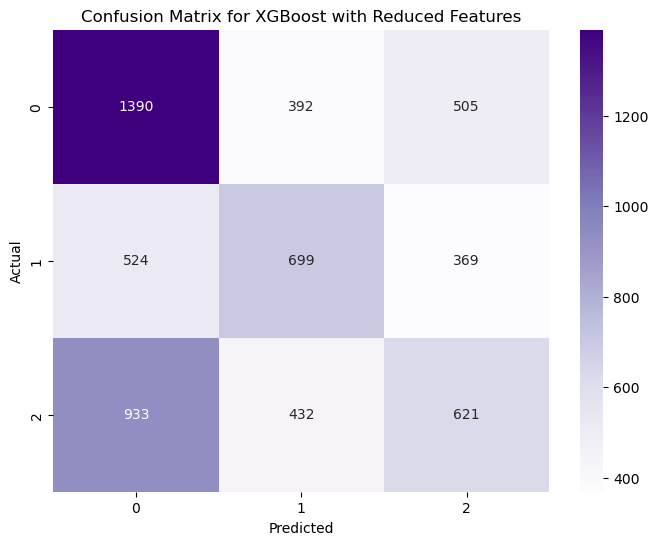

In [202]:

# 使用相同的调参模型
xgb_model_reduced = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=1,
    n_estimators=400,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# 训练模型
xgb_model_reduced.fit(X_train_reduced, y_train_encoded)

# 在测试集上预测
y_pred_reduced = xgb_model_reduced.predict(X_test_reduced)

# 计算模型性能
accuracy_reduced = accuracy_score(y_test_encoded, y_pred_reduced)
macro_f1_reduced = f1_score(y_test_encoded, y_pred_reduced, average='macro')

print("Performance of XGBoost with Reduced Features:")
print(f"Test Accuracy: {accuracy_reduced:.4f}")
print(f"Test Macro F1-Score: {macro_f1_reduced:.4f}")

# 打印分类报告
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_reduced))

# 绘制混淆矩阵
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred_reduced), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix for XGBoost with Reduced Features")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# V. RQ3: SHAP Value Analysis

In [339]:
import shap

# Create a SHAP TreeExplainer for the trained XGBoost model
explainer = shap.TreeExplainer(xgb_model_final)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_final)

# SHAP values shape: (number of samples, number of features)
print(f"SHAP values shape: {shap_values.shape}")



SHAP values shape: (5865, 48, 3)


## 4.1 XGBoost SHAP

### 4.1.1 Plot 1 - Overall Feature Importance (Absolute Sum)

In [168]:

# Ensure X_test_final is a Pandas DataFrame
if not isinstance(X_test_final, pd.DataFrame):
    X_test_final = pd.DataFrame(X_test_final, columns=final_features_xgb)


In [169]:
print(f"SHAP values shape: {shap_values.shape}")
print(f"X_test_final shape: {X_test_final.shape}")


SHAP values shape: (5865, 48, 3)
X_test_final shape: (5865, 48)


In [170]:

# Aggregate SHAP values across classes (mean absolute SHAP values)
shap_values_mean = np.abs(shap_values).mean(axis=2)  # Take mean across class dimension

# Check the new shape (should match X_test_final shape)
print(f"Aggregated SHAP values shape: {shap_values_mean.shape}")


Aggregated SHAP values shape: (5865, 48)


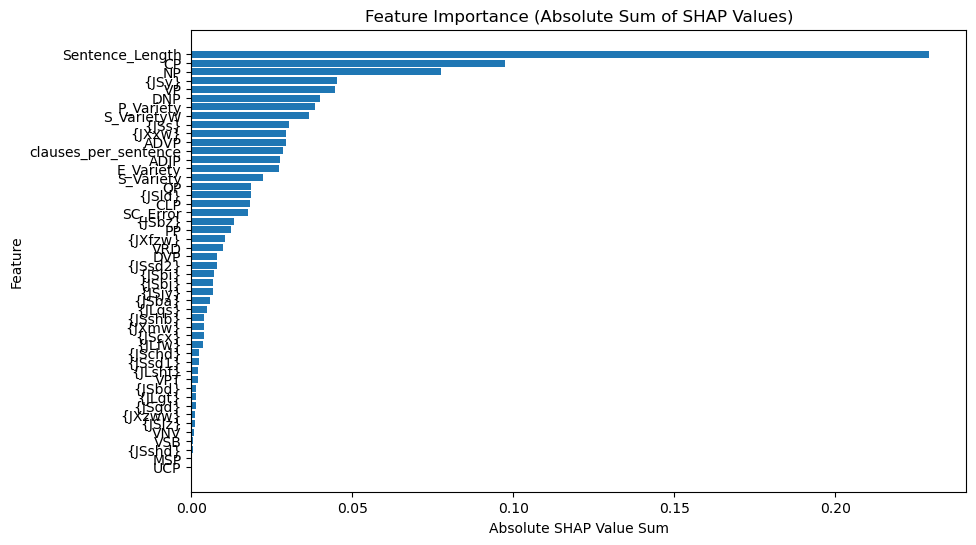

In [171]:
# Compute absolute mean of SHAP values for each feature
feature_importance_absolute = np.abs(shap_values_mean).mean(axis=0)

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X_test_final.columns,
    'Absolute_Sum_SHAP': feature_importance_absolute
}).sort_values(by='Absolute_Sum_SHAP', ascending=False)

# Plot the overall feature importance (absolute sum)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Absolute_Sum_SHAP'])
plt.gca().invert_yaxis()  # Reverse order for readability
plt.title("Feature Importance (Absolute Sum of SHAP Values)")
plt.xlabel("Absolute SHAP Value Sum")
plt.ylabel("Feature")
plt.show()


### 4.1.2 Plot 2- Directional Importance (Signed Mean)

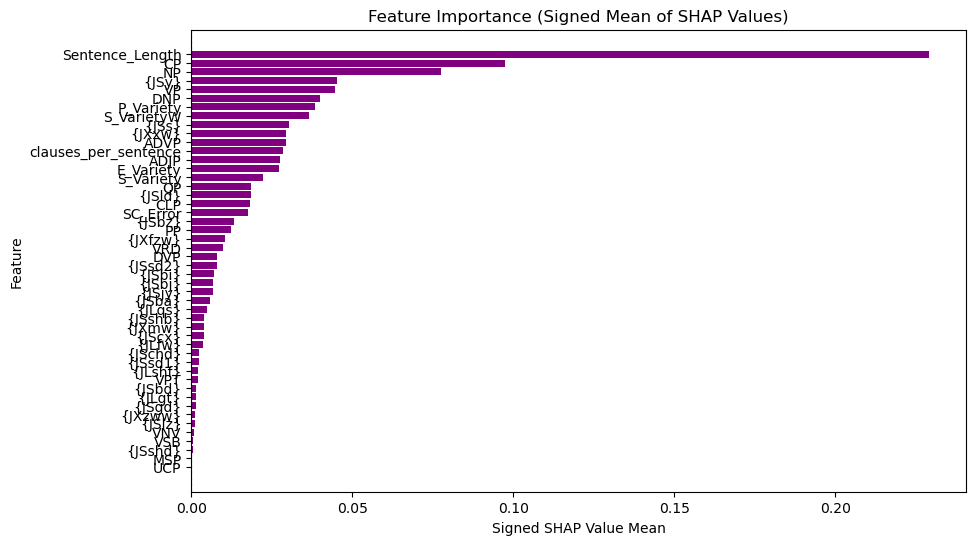

In [172]:
# Compute signed mean of SHAP values for each feature
feature_importance_signed = shap_values_mean.mean(axis=0)

# Create a DataFrame for visualization
importance_signed_df = pd.DataFrame({
    'Feature': X_test_final.columns,
    'Signed_Mean_SHAP': feature_importance_signed
}).sort_values(by='Signed_Mean_SHAP', ascending=False)

# Plot the directional feature importance (signed mean)
plt.figure(figsize=(10, 6))
plt.barh(importance_signed_df['Feature'], importance_signed_df['Signed_Mean_SHAP'], color='purple')
plt.gca().invert_yaxis()  # Reverse order for readability
plt.title("Feature Importance (Signed Mean of SHAP Values)")
plt.xlabel("Signed SHAP Value Mean")
plt.ylabel("Feature")
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Add a vertical line at 0
plt.show()


### 4.1.3 Class-specific SHAP Value - Advanced

In [337]:
# Confirm the class mapping
print("Class Mapping:")
for idx, label in enumerate(label_encoder.classes_):
    print(f"Class {idx}: {label}")


Class Mapping:
Class 0: Advanced
Class 1: Beginner
Class 2: Intermediate


In [340]:
# Extract SHAP values for each class
shap_values_class_0 = shap_values[:, :, 0]  # Class 0
shap_values_class_1 = shap_values[:, :, 1]  # Class 1
shap_values_class_2 = shap_values[:, :, 2]  # Class 2


In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Compute absolute importance for Class 0
feature_importance_class_0_absolute = np.abs(shap_values_class_0).mean(axis=0)

# Compute signed importance for Class 0
feature_importance_class_0_signed = shap_values_class_0.mean(axis=0)

# Create a DataFrame for Class 0 feature importance
importance_class_0_df = pd.DataFrame({
    'Feature': X_test_final.columns,
    'Absolute_Sum_SHAP': feature_importance_class_0_absolute,
    'Signed_Mean_SHAP': feature_importance_class_0_signed
}).sort_values(by='Absolute_Sum_SHAP', ascending=False)


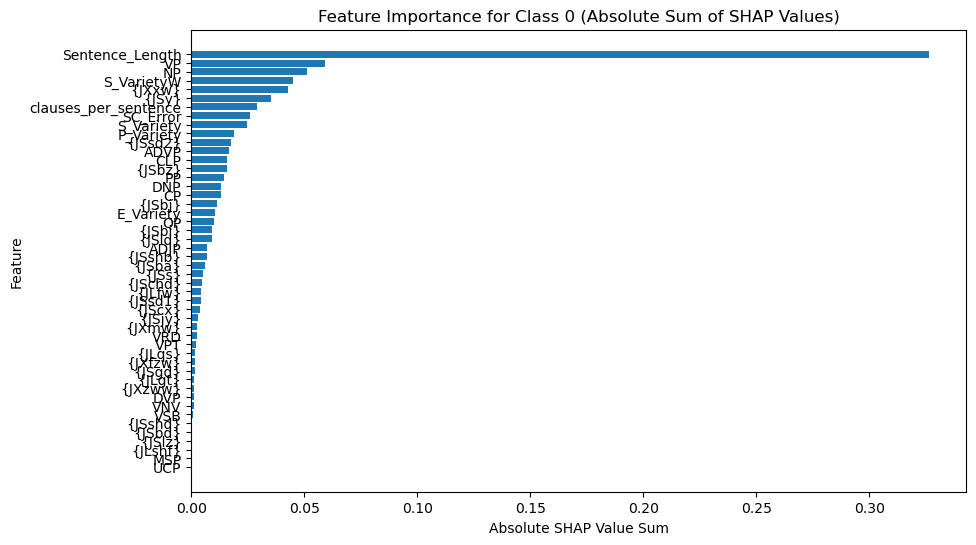

In [342]:
# Plot absolute importance for Class 0
plt.figure(figsize=(10, 6))
plt.barh(importance_class_0_df['Feature'], importance_class_0_df['Absolute_Sum_SHAP'])
plt.gca().invert_yaxis()
plt.title("Feature Importance for Class 0 (Absolute Sum of SHAP Values)")
plt.xlabel("Absolute SHAP Value Sum")
plt.ylabel("Feature")
plt.show()


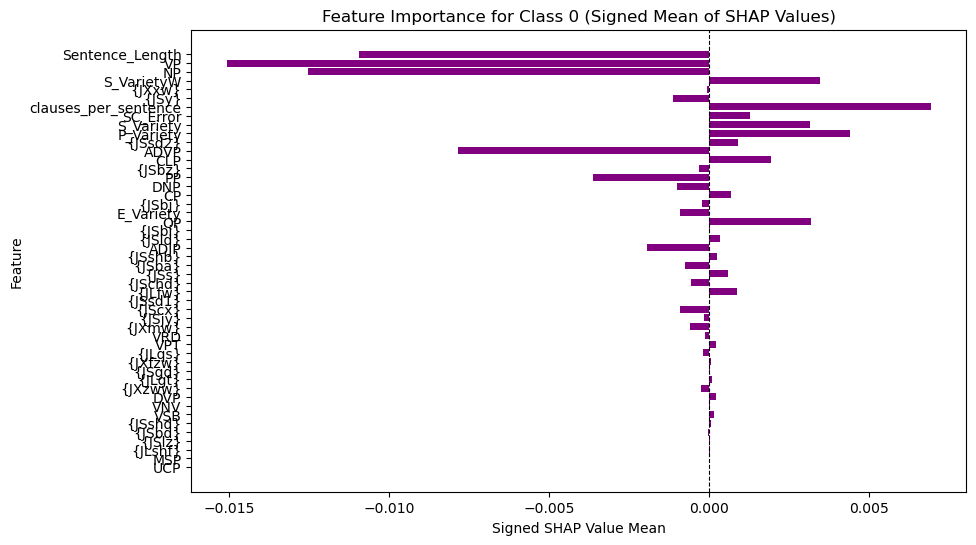

In [343]:
# Plot directional importance for Class 0
plt.figure(figsize=(10, 6))
plt.barh(importance_class_0_df['Feature'], importance_class_0_df['Signed_Mean_SHAP'], color='purple')
plt.gca().invert_yaxis()
plt.title("Feature Importance for Class 0 (Signed Mean of SHAP Values)")
plt.xlabel("Signed SHAP Value Mean")
plt.ylabel("Feature")
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Vertical line at 0

plt.savefig("XGBoost Signed SHAP for Advanced Level.png", dpi=300)
plt.show()


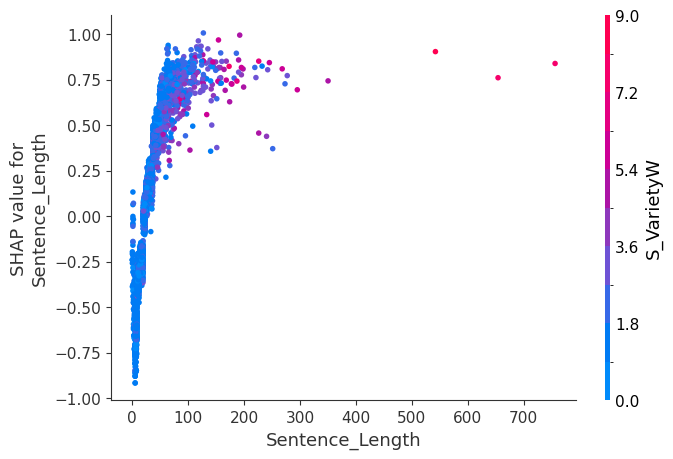

In [184]:
shap.dependence_plot(
    'Sentence_Length',  # x-axis
    shap_values_class_0,  # class-specific SHAP value
    X_test_final,  # test set
    interaction_index='S_VarietyW'
)


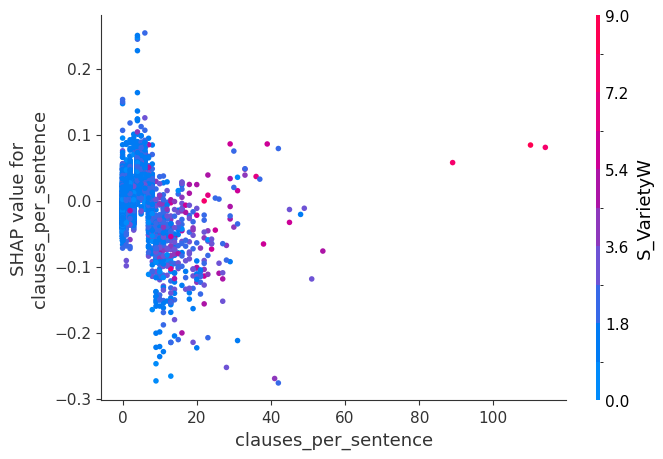

In [185]:
shap.dependence_plot(
    'clauses_per_sentence',  # x-axis
    shap_values_class_0,  # class-specific SHAP value
    X_test_final,  # test set
    interaction_index='S_VarietyW'  
)


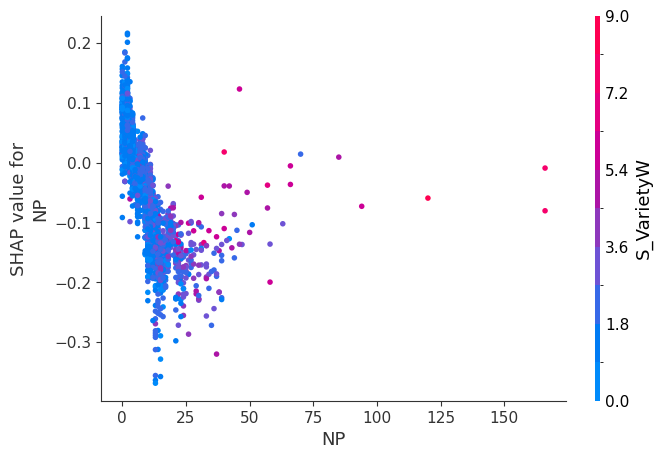

In [186]:
shap.dependence_plot(
    'NP',  # x-axis
    shap_values_class_0,  # class-specific SHAP value
    X_test_final,  # test set
    interaction_index='S_VarietyW'  
)


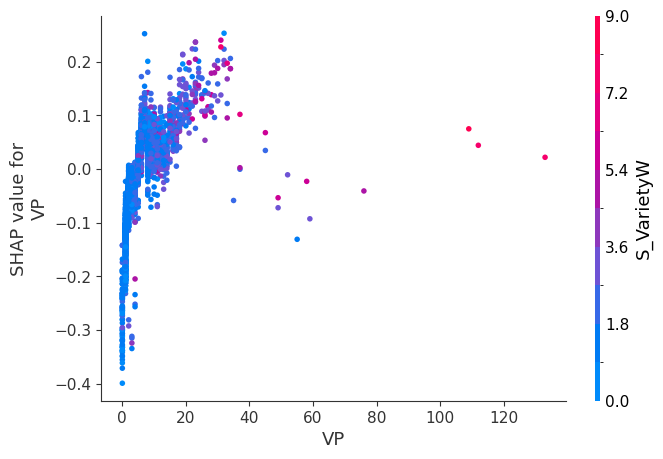

In [187]:
shap.dependence_plot(
    'VP',  # x-axis
    shap_values_class_0,  # class-specific SHAP value
    X_test_final,  # test set
    interaction_index='S_VarietyW'  
)


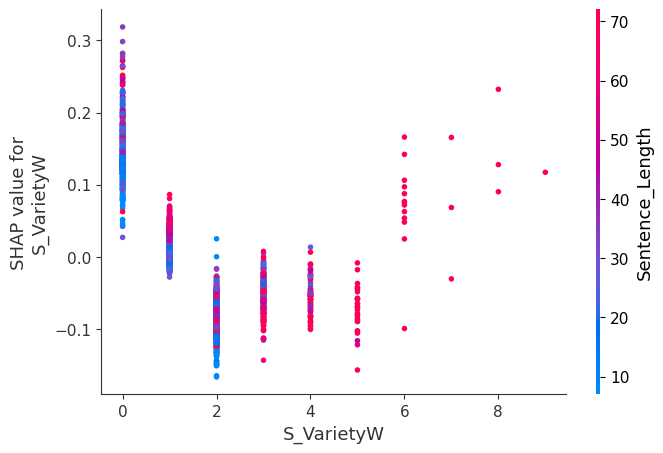

In [190]:
shap.dependence_plot(
    'S_VarietyW',  # x-axis
    shap_values_class_0,  # class-specific SHAP value
    X_test_final,  # test set
    interaction_index='Sentence_Length'  
)


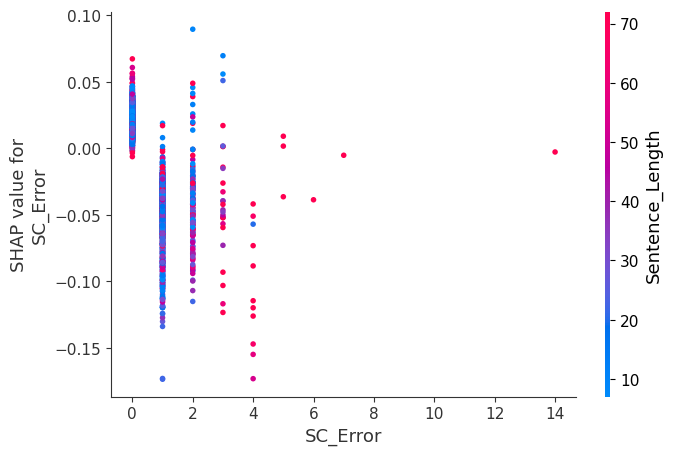

In [191]:

shap.dependence_plot(
    'SC_Error',  # x-axis
    shap_values_class_0,  # class-specific SHAP value
    X_test_final,  # test set
    interaction_index='Sentence_Length'
)


### 4.1.4 Class-specific SHAP Value - Intermediate

In [344]:

# Compute absolute importance for Class 2
feature_importance_class_2_absolute = np.abs(shap_values_class_2).mean(axis=0)

# Compute signed importance for Class 2
feature_importance_class_2_signed = shap_values_class_2.mean(axis=0)

# Create a DataFrame for Class 2 feature importance
importance_class_2_df = pd.DataFrame({
    'Feature': X_test_final.columns,
    'Absolute_Sum_SHAP': feature_importance_class_2_absolute,
    'Signed_Mean_SHAP': feature_importance_class_2_signed
}).sort_values(by='Absolute_Sum_SHAP', ascending=False)


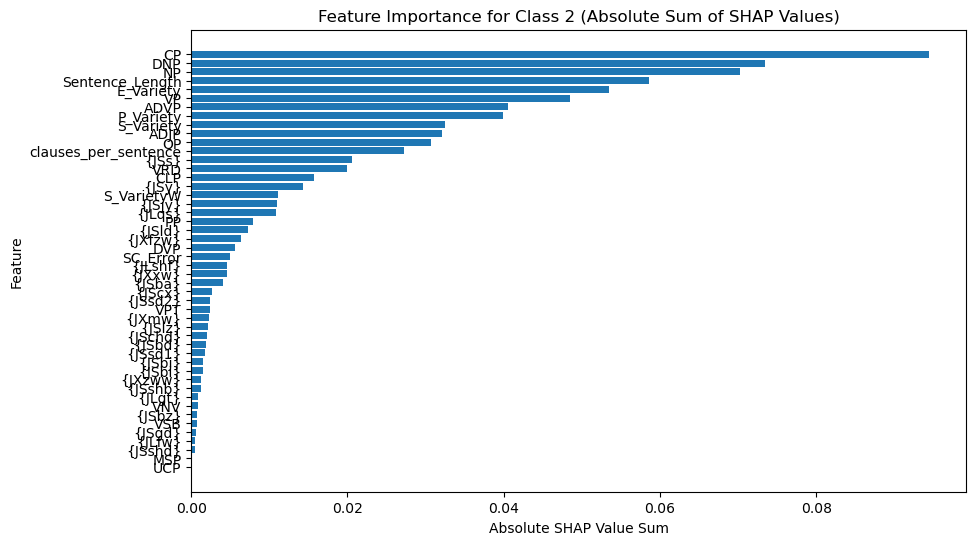

In [346]:
# Plot absolute importance for Class 2
plt.figure(figsize=(10, 6))
plt.barh(importance_class_2_df['Feature'], importance_class_2_df['Absolute_Sum_SHAP'])
plt.gca().invert_yaxis()
plt.title("Feature Importance for Class 2 (Absolute Sum of SHAP Values)")
plt.xlabel("Absolute SHAP Value Sum")
plt.ylabel("Feature")
plt.show()

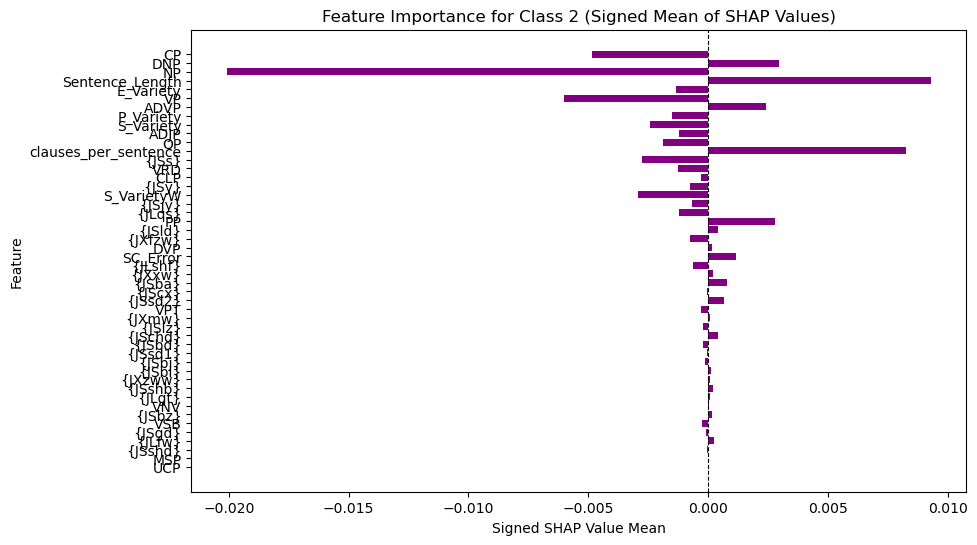

In [348]:
# Plot directional importance for Class 2
plt.figure(figsize=(10, 6))
plt.barh(importance_class_2_df['Feature'], importance_class_2_df['Signed_Mean_SHAP'], color='purple')
plt.gca().invert_yaxis()
plt.title("Feature Importance for Class 2 (Signed Mean of SHAP Values)")
plt.xlabel("Signed SHAP Value Mean")
plt.ylabel("Feature")
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Vertical line at 0

plt.savefig("XGBoost Signed SHAP for Intermediate Level.png", dpi=300)
plt.show()


### 4.1.5 Class-specific SHAP Value - Beginner

In [349]:

# Compute absolute importance for Class 1
feature_importance_class_1_absolute = np.abs(shap_values_class_1).mean(axis=0)

# Compute signed importance for Class 1
feature_importance_class_1_signed = shap_values_class_1.mean(axis=0)

# Create a DataFrame for Class 1 feature importance
importance_class_1_df = pd.DataFrame({
    'Feature': X_test_final.columns,
    'Absolute_Sum_SHAP': feature_importance_class_1_absolute,
    'Signed_Mean_SHAP': feature_importance_class_1_signed
}).sort_values(by='Absolute_Sum_SHAP', ascending=False)


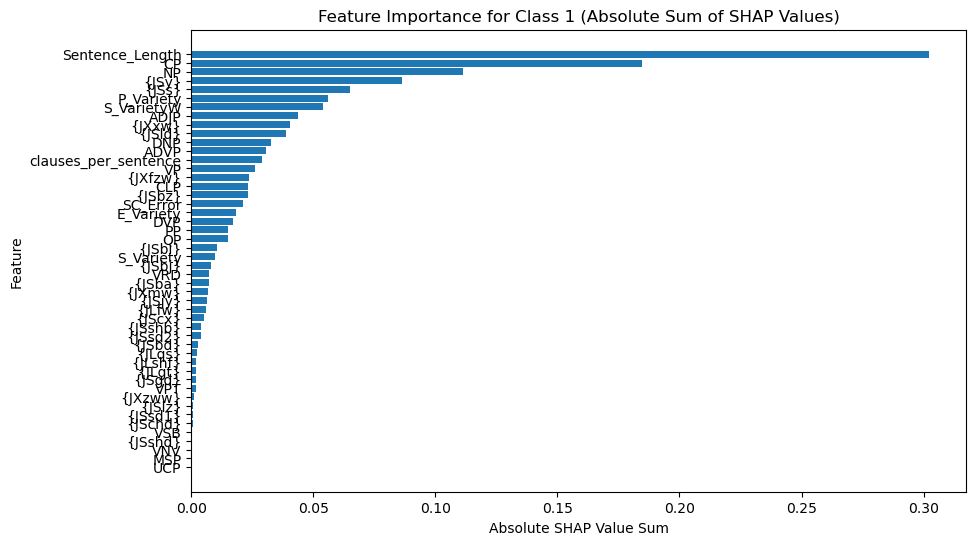

In [350]:
# Plot absolute importance for Class 1
plt.figure(figsize=(10, 6))
plt.barh(importance_class_1_df['Feature'], importance_class_1_df['Absolute_Sum_SHAP'])
plt.gca().invert_yaxis()
plt.title("Feature Importance for Class 1 (Absolute Sum of SHAP Values)")
plt.xlabel("Absolute SHAP Value Sum")
plt.ylabel("Feature")
plt.show()

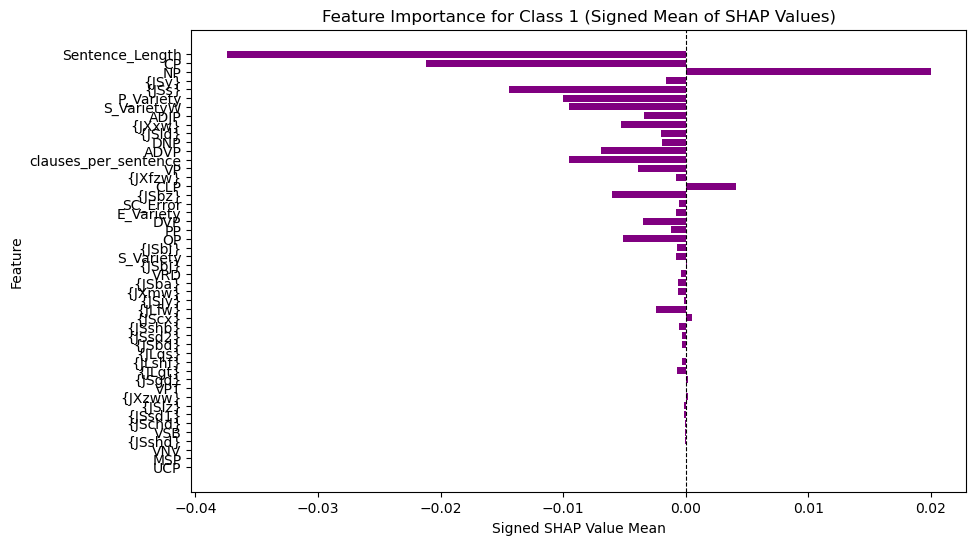

In [351]:
# Plot directional importance for Class 1
plt.figure(figsize=(10, 6))
plt.barh(importance_class_1_df['Feature'], importance_class_1_df['Signed_Mean_SHAP'], color='purple')
plt.gca().invert_yaxis()
plt.title("Feature Importance for Class 1 (Signed Mean of SHAP Values)")
plt.xlabel("Signed SHAP Value Mean")
plt.ylabel("Feature")
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Vertical line at 0

plt.savefig("XGBoost Signed SHAP for Beginner Level.png", dpi=300)
plt.show()


## 4.2 Random Forest SHAP

In [352]:
# Retrain the model
rf_model_tuned2 = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    bootstrap=False,
    random_state=42
)
rf_model_tuned2.fit(X_train_reduced_rf_final, y_train)

# Evaluate final model on the test set
y_pred_reduced_rf_final = rf_model_tuned2.predict(X_test_reduced_rf_final)
final_test_accuracy = accuracy_score(y_test, y_pred_reduced_rf_final)
final_test_macro_f1 = f1_score(y_test, y_pred_reduced_rf_final, average='macro')

print(f"Final Model Performance:")
print(f"Test Accuracy: {final_test_accuracy:.4f}")
print(f"Test Macro F1-Score: {final_test_macro_f1:.4f}")

Final Model Performance:
Test Accuracy: 0.4820
Test Macro F1-Score: 0.4659


In [353]:

# Create SHAP explainer
explainer_rf = shap.TreeExplainer(rf_model_tuned2)


In [354]:
# Compute SHAP values for the test set
shap_values_rf = explainer_rf.shap_values(X_test_reduced_rf_final)

# Print the shape of SHAP values to verify
print(f"SHAP values shape: {len(shap_values_rf)} (classes), {shap_values_rf[0].shape} (samples, features)")


SHAP values shape: 5865 (classes), (42, 3) (samples, features)


In [355]:
print("Class Mapping:")
for idx, label in enumerate(label_encoder.classes_):
    print(f"Class {idx}: {label}")


Class Mapping:
Class 0: Advanced
Class 1: Beginner
Class 2: Intermediate


In [356]:
# Extract SHAP values for each class
shap_values_class_0_rf = shap_values_rf[:, :, 0]  # Class 0
shap_values_class_1_rf = shap_values_rf[:, :, 1]  # Class 1
shap_values_class_2_rf = shap_values_rf[:, :, 2]  # Class 2

### 4.2.1 Class-specific SHAP Value - Advanced

In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Compute absolute importance for Class 0
feature_importance_class_0_absolute = np.abs(shap_values_class_0_rf).mean(axis=0)

# Compute signed importance for Class 0
feature_importance_class_0_signed = shap_values_class_0_rf.mean(axis=0)

# Create a DataFrame for Class 0 feature importance
importance_class_0_df = pd.DataFrame({
    'Feature': X_test_reduced_rf_final.columns,
    'Absolute_Sum_SHAP': feature_importance_class_0_absolute,
    'Signed_Mean_SHAP': feature_importance_class_0_signed
}).sort_values(by='Absolute_Sum_SHAP', ascending=False)

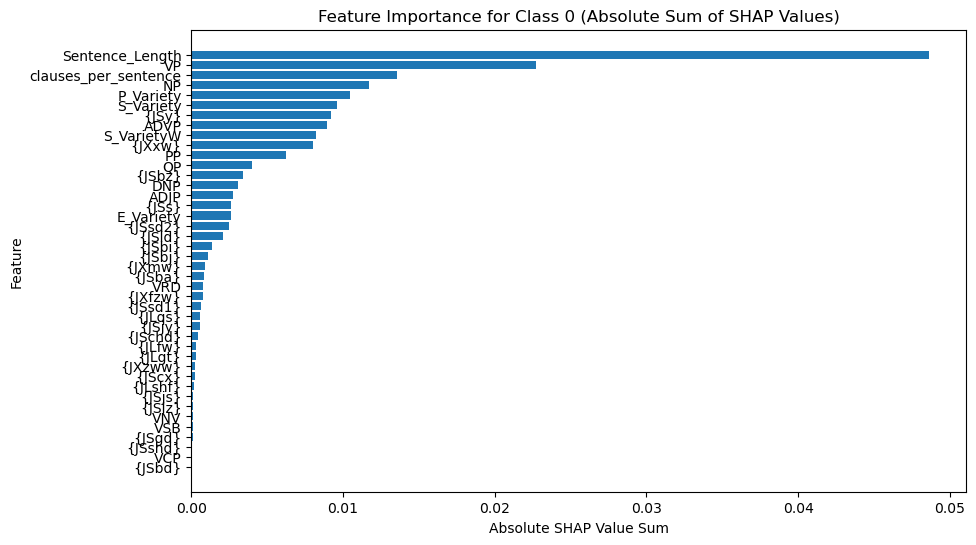

In [358]:
# Plot absolute importance for Class 0
plt.figure(figsize=(10, 6))
plt.barh(importance_class_0_df['Feature'], importance_class_0_df['Absolute_Sum_SHAP'])
plt.gca().invert_yaxis()
plt.title("Feature Importance for Class 0 (Absolute Sum of SHAP Values)")
plt.xlabel("Absolute SHAP Value Sum")
plt.ylabel("Feature")
plt.show()

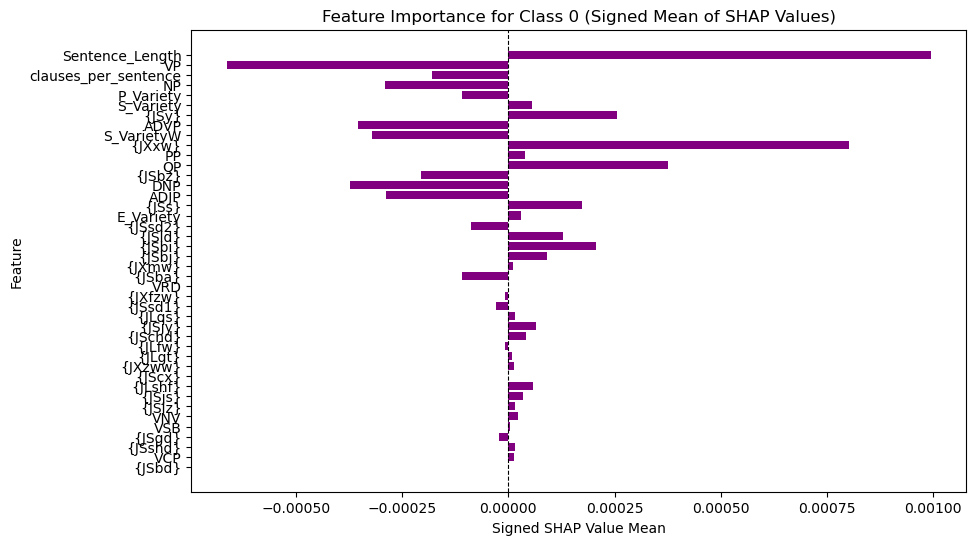

In [360]:
# Plot directional importance for Class 0
plt.figure(figsize=(10, 6))
plt.barh(importance_class_0_df['Feature'], importance_class_0_df['Signed_Mean_SHAP'], color='purple')
plt.gca().invert_yaxis()
plt.title("Feature Importance for Class 0 (Signed Mean of SHAP Values)")
plt.xlabel("Signed SHAP Value Mean")
plt.ylabel("Feature")
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Vertical line at 0

plt.savefig("RF Signed SHAP for Advanced Level.png", dpi=300)
plt.show()

### 4.2.2 Class-specific SHAP Value - Intermediate

In [361]:
# Compute absolute importance for Class 2
feature_importance_class_2_absolute = np.abs(shap_values_class_2_rf).mean(axis=0)

# Compute signed importance for Class 2
feature_importance_class_2_signed = shap_values_class_2_rf.mean(axis=0)

# Create a DataFrame for Class 2 feature importance
importance_class_2_df = pd.DataFrame({
    'Feature': X_test_reduced_rf_final.columns,
    'Absolute_Sum_SHAP': feature_importance_class_2_absolute,
    'Signed_Mean_SHAP': feature_importance_class_2_signed
}).sort_values(by='Absolute_Sum_SHAP', ascending=False)

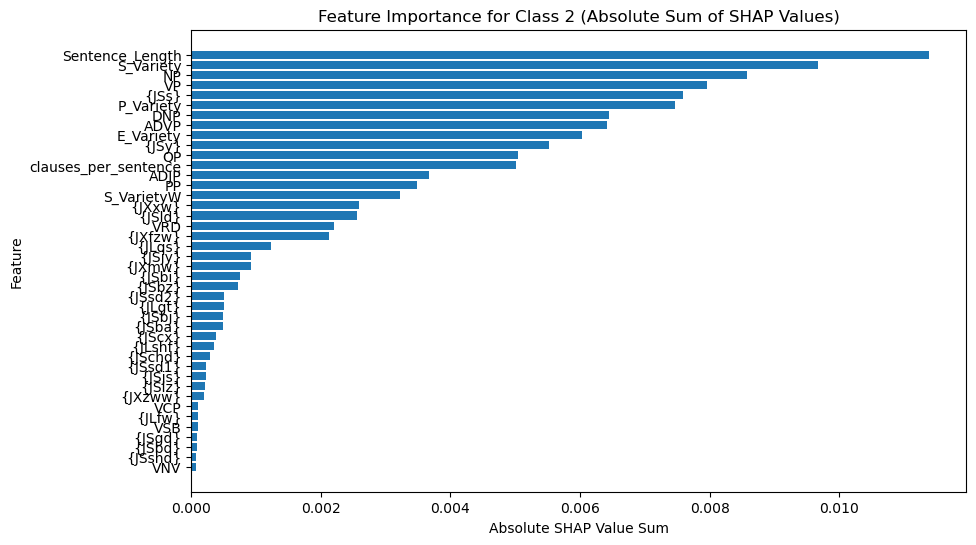

In [362]:
# Plot absolute importance for Class 2
plt.figure(figsize=(10, 6))
plt.barh(importance_class_2_df['Feature'], importance_class_2_df['Absolute_Sum_SHAP'])
plt.gca().invert_yaxis()
plt.title("Feature Importance for Class 2 (Absolute Sum of SHAP Values)")
plt.xlabel("Absolute SHAP Value Sum")
plt.ylabel("Feature")
plt.show()

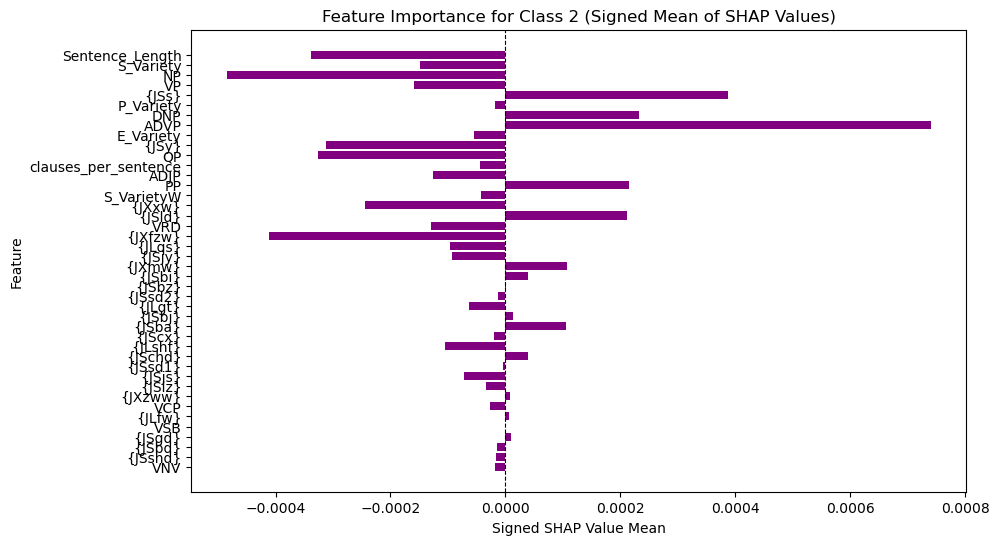

In [363]:
# Plot directional importance for Class 2
plt.figure(figsize=(10, 6))
plt.barh(importance_class_2_df['Feature'], importance_class_2_df['Signed_Mean_SHAP'], color='purple')
plt.gca().invert_yaxis()
plt.title("Feature Importance for Class 2 (Signed Mean of SHAP Values)")
plt.xlabel("Signed SHAP Value Mean")
plt.ylabel("Feature")
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Vertical line at 0

plt.savefig("RF Signed SHAP for Intermediate Level.png", dpi=300)
plt.show()

### 4.2.3 Class-specific SHAP Value - Beginner

In [364]:
# Compute absolute importance for Class 1
feature_importance_class_1_absolute = np.abs(shap_values_class_1_rf).mean(axis=0)

# Compute signed importance for Class 1
feature_importance_class_1_signed = shap_values_class_1_rf.mean(axis=0)

# Create a DataFrame for Class 1 feature importance
importance_class_1_df = pd.DataFrame({
    'Feature': X_test_reduced_rf_final.columns,
    'Absolute_Sum_SHAP': feature_importance_class_1_absolute,
    'Signed_Mean_SHAP': feature_importance_class_1_signed
}).sort_values(by='Absolute_Sum_SHAP', ascending=False)

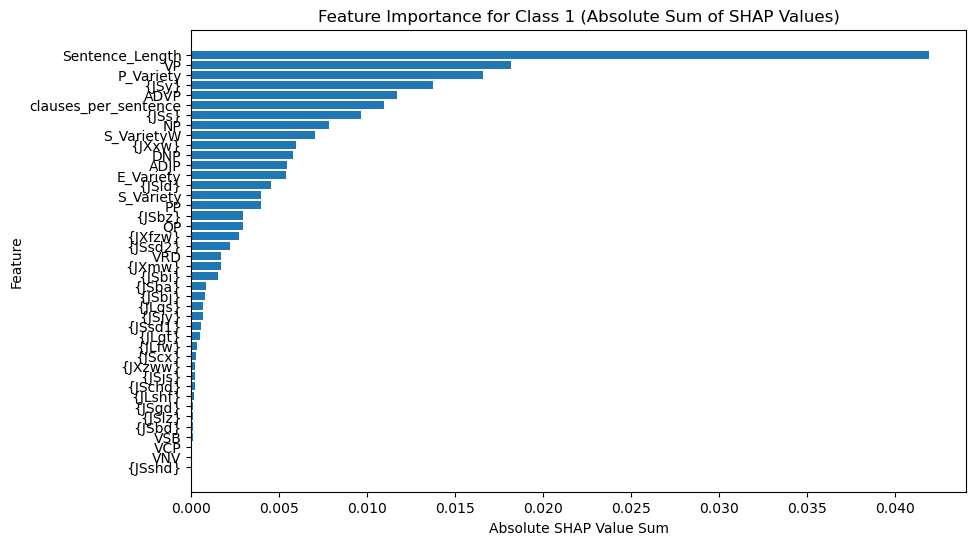

In [365]:
# Plot absolute importance for Class 1
plt.figure(figsize=(10, 6))
plt.barh(importance_class_1_df['Feature'], importance_class_1_df['Absolute_Sum_SHAP'])
plt.gca().invert_yaxis()
plt.title("Feature Importance for Class 1 (Absolute Sum of SHAP Values)")
plt.xlabel("Absolute SHAP Value Sum")
plt.ylabel("Feature")
plt.show()

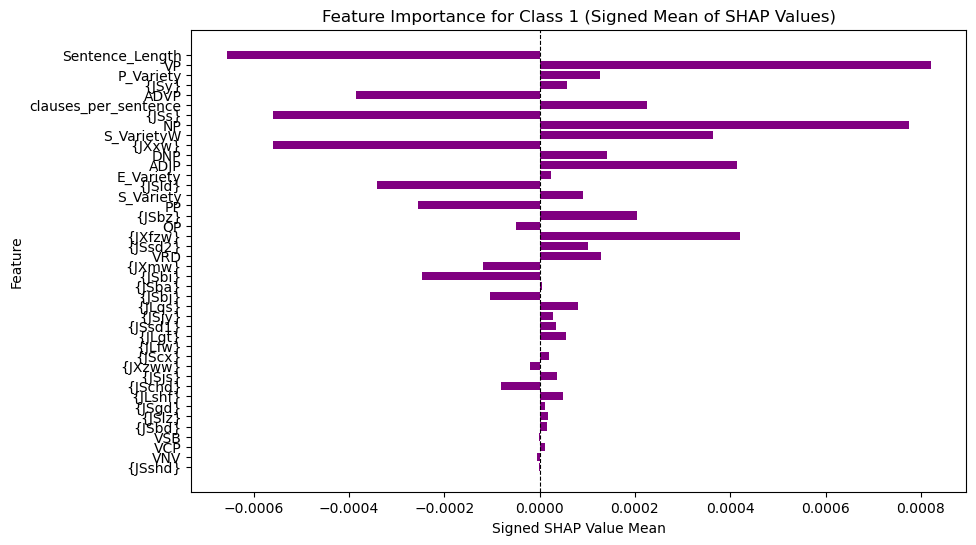

In [367]:
# Plot directional importance for Class 1
plt.figure(figsize=(10, 6))
plt.barh(importance_class_1_df['Feature'], importance_class_1_df['Signed_Mean_SHAP'], color='purple')
plt.gca().invert_yaxis()
plt.title("Feature Importance for Class 1 (Signed Mean of SHAP Values)")
plt.xlabel("Signed SHAP Value Mean")
plt.ylabel("Feature")
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Vertical line at 0

plt.savefig("RF Signed SHAP for Beginner Level.png", dpi=300)
plt.show()


# VI. Significant Test

In [329]:
from scipy.stats import ttest_rel

accuracy_lr = [0.4512, 0.4669, 0.4577, 0.4698, 0.4726]
accuracy_svm = [0.4676, 0.4673, 0.4622, 0.4645, 0.4786]
accuracy_rf = [0.4653, 0.4758, 0.4709, 0.4822, 0.4811]
accuracy_xgb = [0.4725, 0.4666, 0.4686, 0.4871, 0.4796]

f1_lr = [0.4384, 0.4503, 0.4447, 0.4584, 0.4569]
f1_svm = [0.4482, 0.4496, 0.4455, 0.4464, 0.4556]
f1_rf = [0.4510, 0.4594, 0.4558, 0.4682, 0.4608]
f1_xgb = [0.4627, 0.4531, 0.4574, 0.4780, 0.4652]

# Accuracy comparison
t_stat_acc_svm, p_val_acc_svm = ttest_rel(accuracy_lr, accuracy_svm)
t_stat_acc_rf, p_val_acc_rf = ttest_rel(accuracy_lr, accuracy_rf)
t_stat_acc_xgb, p_val_acc_xgb = ttest_rel(accuracy_lr, accuracy_xgb)

# Macro F1-score comparison
t_stat_f1_svm, p_val_f1_svm = ttest_rel(f1_lr, f1_svm)
t_stat_f1_rf, p_val_f1_rf = ttest_rel(f1_lr, f1_rf)
t_stat_f1_xgb, p_val_f1_xgb = ttest_rel(f1_lr, f1_xgb)

# Print results
print("Paired t-test Results:")
print(f"SVM vs LR - Accuracy: t-stat={t_stat_acc_svm:.4f}, p-value={p_val_acc_svm:.4f}")
print(f"RF vs LR - Accuracy: t-stat={t_stat_acc_rf:.4f}, p-value={p_val_acc_rf:.4f}")
print(f"XGB vs LR - Accuracy: t-stat={t_stat_acc_xgb:.4f}, p-value={p_val_acc_xgb:.4f}")
print(f"SVM vs LR - Macro F1: t-stat={t_stat_f1_svm:.4f}, p-value={p_val_f1_svm:.4f}")
print(f"RF vs LR - Macro F1: t-stat={t_stat_f1_rf:.4f}, p-value={p_val_f1_rf:.4f}")
print(f"XGB vs LR - Macro F1: t-stat={t_stat_f1_xgb:.4f}, p-value={p_val_f1_xgb:.4f}")

Paired t-test Results:
SVM vs LR - Accuracy: t-stat=-1.2283, p-value=0.2867
RF vs LR - Accuracy: t-stat=-9.9800, p-value=0.0006
XGB vs LR - Accuracy: t-stat=-2.9559, p-value=0.0417
SVM vs LR - Macro F1: t-stat=0.1961, p-value=0.8541
RF vs LR - Macro F1: t-stat=-6.3002, p-value=0.0032
XGB vs LR - Macro F1: t-stat=-3.5195, p-value=0.0245
